In [28]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [29]:
import numpy as np
import pandas as pd
import tensorflow as tf

df = pd.read_csv('samples_nylonGuitar_1024_Mm7_R03.csv')

X = np.array(df.iloc[:,:-1], dtype=np.float)
y = np.array(df.iloc[:,-1], dtype=np.float)

In [4]:
import os

processedData_path = "preprocessedSamples.data"

if os.path.isfile(processedData_path): #if already preprocessed
    df_new = pd.read_pickle(processedData_path)
else:
    for i in range(len(X)):
        sample = np.array(X[i], dtype=np.float)
        sample = sample*np.hamming(1024)
        sample = np.abs(np.fft.rfft(sample))[1:]
        sample = np.append(sample, y[i])
        try:
            df_new = np.vstack([df_new, sample])
        except:
            df_new = np.array(sample, dtype=np.float)
        if i % 200 == 0:
            print(i)
            df_new[i]
    
    df_new = pd.DataFrame(df_new)
    
    df_new.to_pickle(processedData_path)

1.0
0.0
28.0


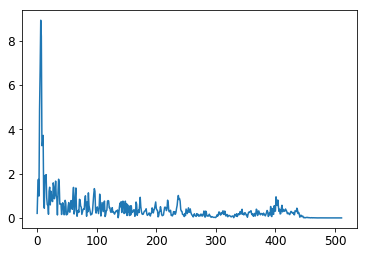

In [5]:
import matplotlib.pyplot as plt

npArrayDF = np.array(df_new.iloc[:,:], dtype=np.float) #shuffle randomly all samples

print(npArrayDF[0,-1])

for i in range(len(npArrayDF)):
    npArrayDF[i,-1] = (npArrayDF[i, -1]) - 1

print(npArrayDF[0,-1])
    
np.random.shuffle(npArrayDF)

X_train = np.array(npArrayDF[:-2000,:-1], dtype=np.float)
y_train = np.array(npArrayDF[:-2000,-1], dtype=np.float)

X_valid = np.array(npArrayDF[-2000:-1000,:-1], dtype=np.float)
y_valid = np.array(npArrayDF[-2000:-1000,-1], dtype=np.float)

X_test = np.array(npArrayDF[-1000:,:-1], dtype=np.float)
y_test = np.array(npArrayDF[-1000:,-1], dtype=np.float)
print(y_test[1])

plt.plot(X_train[1])
plt.show()

ImportError: No module named 'tfr'

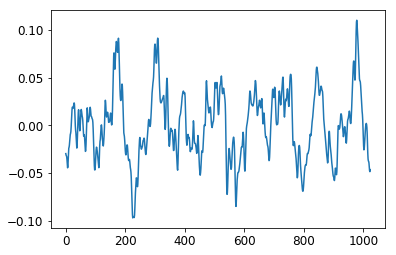

In [7]:
plt.plot(X[0])
plt.show()

[-0.06995721 -0.10837345 -0.10564649 ...,  0.09544712  0.09530358
  0.09550307]


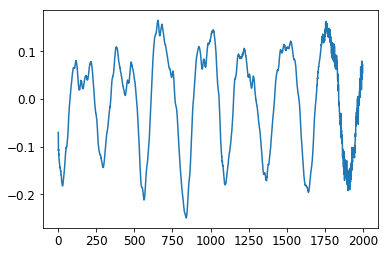

In [8]:
import librosa

y, sr = librosa.load(librosa.util.example_audio_file(),offset=10, duration=15)
print(y)
plt.plot(y[:2000])
plt.show()

In [20]:
# chroma_stft = librosa.feature.chroma_stft(y=X[1], sr=44100,n_chroma=12, n_fft=1024)
# print(chroma_stft)
# print(type(chroma_stft))
# print(chroma_stft.shape)

specgram = librosa.feature.melspectrogram(y=X[1], sr=44100)
print(specgram.shape)
print(specgram)

import librosa.display

(128, 3)
[[  1.62411511e-01   1.84349809e-01   5.61518968e-01]
 [  2.18694851e-01   2.85292633e-01   7.62448058e-01]
 [  3.93319450e-01   3.00797875e-01   7.09370439e-01]
 [  2.19004157e+00   7.86664744e-01   1.05640874e+00]
 [  3.83122867e+00   2.27064676e+00   2.19990974e+00]
 [  1.18970745e+00   7.74732239e-01   1.69151990e+00]
 [  6.84855503e-01   2.64272476e+00   8.36583896e+00]
 [  2.66721505e+00   7.85287957e+00   7.76925724e+00]
 [  1.30693657e+01   1.00418168e+01   3.74823679e+00]
 [  1.75970457e+00   1.58745564e+00   9.96739139e-01]
 [  2.12873622e-01   6.62090274e-01   8.82837020e-01]
 [  6.80330438e-01   1.51448090e+00   1.59239481e+00]
 [  6.26292431e-01   8.77303637e-01   3.48130477e-01]
 [  4.35821416e-01   2.14151568e-01   1.41434202e-01]
 [  2.29367813e-02   2.34173429e-02   4.39253670e-03]
 [  2.69118720e-02   3.60549360e-02   6.83601657e-02]
 [  3.63231194e-02   5.93649116e-02   1.58393333e-01]
 [  5.33666633e-02   1.38764330e-01   4.81736016e-01]
 [  9.30939193e-02 

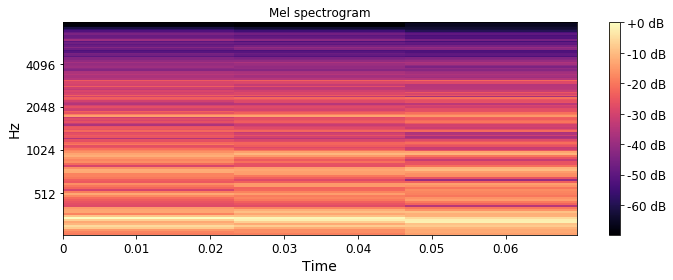

In [18]:
>>> import matplotlib.pyplot as plt
>>> plt.figure(figsize=(10, 4))
>>> librosa.display.specshow(librosa.power_to_db(specgram,
...                                              ref=np.max),
...                          y_axis='mel', fmax=8000,
...                          x_axis='time')
>>> plt.colorbar(format='%+2.0f dB')
>>> plt.title('Mel spectrogram')
>>> plt.tight_layout()

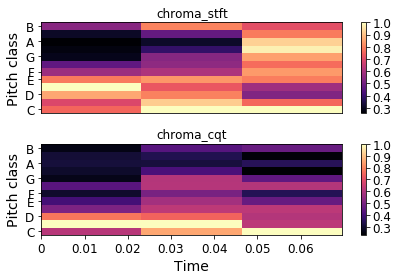

In [9]:
>>> import matplotlib.pyplot as plt
import librosa.display
>>> plt.figure()
>>> plt.subplot(2,1,1)
>>> librosa.display.specshow(chroma_stft, y_axis='chroma')
>>> plt.title('chroma_stft')
>>> plt.colorbar()
>>> plt.subplot(2,1,2)
>>> librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time')
>>> plt.title('chroma_cqt')
>>> plt.colorbar()
>>> plt.tight_layout()

In [ ]:
sample = librosa.feature.chroma_stft(y=X[500], sr=44100,n_chroma=12, n_fft=1024)
print(y[500])
print(sample)
librosa.display.specshow(sample, y_axis='chroma')
plt.show()
sample = np.append(sample, y[500])
print(sample)

In [31]:
#preprocess to chroma
import os

df_new = None

processedData_path = "preprocessedSamples_spec.data"

if os.path.isfile(processedData_path): #if already preprocessed
    df_new = pd.read_pickle(processedData_path)
else:
    for i in range(len(X)):
        sample = librosa.feature.melspectrogram(y=X[i], sr=44100)
        sample = np.append(sample, y[i])
        try:
            df_new = np.vstack([df_new, sample])
        except:
            df_new = np.array(sample, dtype=np.float)
            print('here')
            print(df_new)
        if i % 2000 == 0:
            print(i)
            print(sample)
            print(df_new[i])
    
    df_new = pd.DataFrame(df_new)
    
    df_new.to_pickle(processedData_path)

here
[  1.74061699e-02   2.97966001e-02   1.04510216e-01   5.78985724e-02
   5.13123567e-02   9.79127027e-02   6.26266709e-02   1.08053328e-01
   2.16651492e-01   8.53165415e-02   6.07527560e-01   1.31297583e+00
   3.29645344e-01   6.35775016e-01   8.30570458e-01   8.35494557e-01
   2.26866891e-01   1.24925832e-01   1.47164263e+00   1.41302304e+00
   5.71382163e-01   2.62667475e+00   2.95087011e+00   1.05652008e+00
   5.71489916e+00   2.69849348e+00   4.76378341e-01   7.31550997e-01
   5.09302281e-01   6.57215320e-02   9.79528001e-01   7.98975036e-01
   1.19063313e+00   5.91802735e+00   5.25557303e+00   8.03592584e+00
   4.24407327e+00   6.49683622e+00   8.19836628e+00   3.51221626e-01
   5.92339388e-01   7.64835288e-01   5.83574491e-02   2.23256286e-02
   1.13141428e-02   3.91085006e-02   2.44775241e-02   2.21494649e-02
   1.58954792e-01   1.38742716e-01   1.13440416e-01   2.22697589e-01
   1.40360553e-01   3.63768257e-01   2.18444911e-01   6.37183884e-01
   1.07806397e+00   6.3683834

2000
[  2.36865683e-02   6.52210882e-01   2.48139213e+00   4.13499224e-01
   1.02444004e+00   3.70927925e+00   1.28033823e+00   1.57891470e+00
   2.18916898e+00   4.55203527e-01   4.28440136e-01   4.67731901e-01
   2.32672890e+00   1.12159022e+00   1.77464248e+00   5.18524750e+00
   1.79616041e+01   2.99653522e+01   6.19790595e+01   7.64437932e+01
   4.16619804e+01   4.39359144e+01   7.46028603e+01   1.94711446e+01
   9.00623669e+01   8.52031587e+01   4.65750555e+01   9.55661760e+00
   1.31871701e+01   2.82478634e+01   6.84412148e+00   5.34918714e+00
   1.97576331e+00   2.08087375e+00   9.01624517e-01   1.22351007e+00
   1.16550615e+00   5.42243659e-01   1.02537410e+00   1.05777473e+00
   3.35707314e+00   5.19733807e+00   1.48223489e+00   1.99970870e+00
   2.35858860e+00   5.40033124e-01   2.43601841e-01   1.02686894e-01
   6.98995003e-02   5.69477171e-02   1.03122928e-01   1.35593014e-01
   6.39751431e-02   2.21244202e-02   4.69003391e-02   2.97268459e-02
   3.88708747e-02   4.6837840

4000
[  1.91480484e-02   2.86934884e-02   1.01706887e-01   5.00131136e-02
   5.40190302e-02   1.11868872e-01   7.62126635e-02   1.29640479e-01
   2.55441898e-01   1.20752772e-01   1.20175463e+00   2.74600931e+00
   1.87266783e-01   1.65326122e+00   3.87028579e+00   6.47137496e-01
   6.36387518e-01   1.37850039e+00   7.20810672e-01   6.22677065e+00
   1.33857085e+01   2.05983977e+00   1.09495741e+01   1.80520415e+01
   6.15512858e+00   6.10896503e+00   3.68144329e+00   1.76480829e+00
   1.75610344e+00   5.21182477e+00   1.13387813e+00   3.32344267e+00
   5.27462887e+00   3.04794900e+00   1.48853673e+00   2.17251483e+00
   8.71374063e-01   1.67653769e+00   3.38233082e+00   3.04722858e-02
   5.02009068e-01   1.29311758e+00   2.51611832e-01   1.79728123e-01
   4.92366638e-02   6.01675352e-01   3.91533583e-01   2.33928720e-01
   6.96361108e-02   5.15497041e-02   7.08519914e-02   1.05774221e-02
   9.32959806e-03   1.42077146e-02   3.34147132e-02   7.10369107e-02
   8.62344049e-02   1.0688293

6000
[  5.14995424e-01   4.10200465e-01   9.98164800e-01   8.00033409e-01
   5.47553735e-01   1.28326381e+00   2.71799229e+00   1.78096947e+00
   2.76535719e+00   2.34701372e+00   2.75618784e+00   2.08442145e+00
   1.02901855e+01   8.31324850e+00   6.30102718e+00   2.15031043e+01
   1.72106026e+01   5.83951143e+00   1.32915371e+01   1.13589539e+01
   1.90091268e+01   1.08556742e+02   3.69240786e+01   9.22878131e+00
   1.86568406e+02   2.15107219e+02   1.86679619e+02   7.98183176e+01
   1.06085222e+02   6.24589226e+01   1.60441193e+02   4.66340392e+01
   6.28328361e-01   5.56289136e+01   2.57921699e+01   2.04647487e+00
   2.32837563e+00   3.37951211e+00   1.89306019e+00   5.02546504e-01
   5.14682997e-01   6.48252706e-01   2.71015802e+00   1.14984790e+00
   4.54933309e-01   2.41961204e+00   1.50324488e+00   3.40159295e-01
   6.20578273e-02   1.18463127e-01   4.05546207e-01   8.14875632e-02
   3.94944552e-01   1.06232375e+00   1.65352884e-01   8.03490275e-01
   1.58909761e+00   1.6441073

8000
[  2.23962964e-01   2.23248795e-01   6.49974784e-01   2.62907025e-01
   3.46725529e-01   7.79810220e-01   7.28937786e-02   1.23655482e-01
   4.64871871e-01   8.00605491e-02   3.29051660e-01   7.96360110e-01
   9.79842030e-02   2.23242096e-01   6.75810912e-01   1.17137587e+00
   2.63674647e+00   4.77432691e+00   9.53333093e+00   1.20935089e+01
   1.14425674e+01   2.04461001e+00   4.28094053e+00   1.55216763e+00
   8.76489912e-01   1.01735184e+00   1.12890851e+00   1.33110972e+00
   1.24613335e+00   1.06254937e+00   2.10138423e+00   8.94064100e-01
   1.11910243e+00   7.41236009e-01   3.70091612e-01   5.42854452e-01
   6.89858707e-01   3.34248935e-01   3.67241785e-01   8.68075277e-01
   3.24211213e-01   6.71811003e-02   1.21520824e-01   1.74826484e-01
   2.38192842e-01   4.25421552e-02   1.52899117e-01   5.43180267e-01
   5.66907829e-02   2.09380067e-01   4.19241517e-01   3.58618419e-02
   4.22933639e-02   1.15142972e-01   2.08286159e-02   3.61499204e-02
   8.57430570e-02   1.5099593

10000
[  4.90468137e+00   1.47893086e+00   1.17889325e+00   4.99983386e+00
   2.75843956e+00   2.60599624e+00   3.44777922e+00   2.09170323e+00
   1.83311007e+00   1.82157970e+01   1.07478603e+01   6.01251388e+00
   3.15971207e+01   8.35948941e+00   4.31738132e+00   3.36725668e+01
   6.26654438e+01   6.82200146e+01   1.38258718e+02   1.48789216e+02
   7.47849750e+01   1.36531750e+02   7.20397875e+01   3.79361040e+00
   3.49436491e+01   4.99655790e+01   1.37031608e+01   2.21429729e+01
   2.97264978e+01   1.28659169e+01   1.07017555e+01   1.51515524e+01
   9.78775449e+00   6.05305803e+00   5.85811753e+00   1.97546282e+01
   6.99217288e+00   1.67315735e+01   1.15745035e+01   2.22925606e+01
   1.51884609e+01   7.79809107e+00   4.43835987e+00   2.15108554e+00
   4.17244167e+00   3.57381248e-01   2.21388923e+00   3.02858730e+00
   2.07759741e+00   3.03472228e+00   1.75335485e+00   1.98468527e+00
   1.80835988e+00   1.61387605e+00   8.34325556e-01   1.03818308e+00
   1.22975810e+00   1.009593

12000
[  4.13991970e+00   1.01838368e+00   2.22976652e-02   6.00216108e+00
   1.43299970e+00   2.38801937e-02   8.69943457e+00   2.23939940e+00
   2.90847405e-03   7.98381718e+00   4.31135986e+00   2.56504212e+00
   5.26788932e+00   6.82279454e+00   1.89640357e+01   3.66563163e+00
   1.53885654e+01   2.38840614e+01   1.29707910e+01   5.77793207e+00
   5.01077954e+00   1.59273261e+01   1.70701460e+01   1.95895185e+01
   1.93237976e+01   3.02893202e+01   8.64611394e+01   4.29387560e+01
   5.07546324e+01   3.20830936e+01   1.81713343e+01   2.02891988e+01
   1.39154490e+01   6.23717315e+01   4.38098408e+01   5.38961920e+01
   4.16934811e+01   5.46290785e+01   5.48064668e+01   2.33274809e+00
   6.99288424e+00   6.87814902e+00   2.30267293e-01   1.48815503e+00
   2.79029133e+00   6.42437704e+00   3.09248147e+00   1.97608228e+00
   1.35789034e+01   7.54645200e+00   1.52215830e+00   4.58805791e+00
   2.55740069e+00   2.83149755e+00   4.30250175e-01   1.10830046e+00
   8.31435557e-01   2.321217

14000
[  1.14793372e-03   2.40502420e-01   9.15300492e-01   3.38812492e-02
   3.54718820e-01   1.44321491e+00   1.06538104e-01   6.92696494e-01
   1.39038735e+00   5.55810391e-01   3.83850724e-01   2.25350247e-01
   1.23281889e+00   4.70870930e-01   3.96930600e-01   1.35916049e+01
   5.78956693e+00   6.79408226e-01   4.99693660e+01   2.45552288e+01
   1.01407688e+01   1.35844935e+01   3.65841714e+01   4.71277316e+01
   3.13471219e+00   2.14830274e+01   1.81960430e+01   7.12322784e+00
   8.94811096e+00   7.61285116e+00   9.55252242e-01   1.81822890e+00
   1.24141498e+00   3.86358226e-01   4.95261801e-01   1.08661825e+00
   4.45315600e+00   3.98174152e+00   1.90187152e+00   5.31077247e+00
   4.96876641e+00   2.66148169e+00   2.80163411e-01   6.89280307e-01
   2.55221313e+00   3.76627583e-01   1.05172025e+00   2.50798661e+00
   7.84190542e-02   3.21435641e-01   1.21476721e+00   2.67210367e-01
   3.61103587e-01   1.07275265e+00   1.12230622e+00   8.44069059e-01
   1.48560121e+00   1.273487

ParameterError: Invalid shape for monophonic audio: ndim=2, shape=(14377, 1024)

In [32]:
print(len(X))
df_new

14377


,0,1,2,3,4,5,6,7,8,9,...,375,376,377,378,379,380,381,382,383,384
0,0.017406,0.029797,0.104510,0.057899,0.051312,0.097913,0.062627,0.108053,0.216651,0.085317,...,9.090588e-08,8.007271e-08,1.469040e-07,5.716087e-08,4.747241e-08,1.260094e-07,5.535224e-08,4.626970e-08,1.286249e-07,1.0
1,0.162412,0.184350,0.561519,0.218695,0.285293,0.762448,0.393319,0.300798,0.709370,2.190042,...,2.283377e-06,1.698236e-06,4.119831e-06,1.952830e-06,1.430251e-06,3.696928e-06,1.813380e-06,1.374210e-06,3.656530e-06,1.0
2,0.471432,0.163872,0.179869,0.643785,0.264899,0.256060,0.701053,0.259163,0.345608,1.374581,...,4.981423e-07,1.252670e-07,1.241049e-09,4.750047e-07,1.188897e-07,2.952262e-10,4.667286e-07,1.167180e-07,1.123269e-10,1.0
3,0.123224,0.031634,0.005364,0.170966,0.048312,0.010352,0.258969,0.068184,0.014651,0.599416,...,2.005835e-08,6.414345e-09,3.142349e-09,1.838761e-08,5.118136e-09,1.856533e-09,1.861613e-08,5.165185e-09,2.022390e-09,1.0
4,0.016514,0.006514,0.006784,0.019121,0.008559,0.011583,0.056832,0.025389,0.018565,0.216447,...,2.860876e-07,1.275527e-07,2.207807e-07,2.799938e-07,1.247090e-07,2.171458e-07,2.698613e-07,1.224099e-07,2.184646e-07,1.0
5,0.587635,0.324092,0.669588,0.765839,0.495274,0.881200,0.823326,0.412649,0.945610,1.219535,...,2.704927e-07,9.553067e-08,1.080255e-07,2.877697e-07,1.000525e-07,1.113688e-07,2.800855e-07,9.736914e-08,1.087308e-07,1.0
6,0.017017,0.006185,0.008417,0.016628,0.006847,0.009572,0.002758,0.021091,0.057325,0.144512,...,1.880430e-07,8.306559e-08,1.399660e-07,1.844949e-07,8.061540e-08,1.367141e-07,1.859606e-07,8.087657e-08,1.366626e-07,1.0
7,0.073514,0.019053,0.003197,0.135824,0.041863,0.025275,0.496028,0.230953,0.153861,0.662475,...,7.613927e-07,4.421186e-07,9.562601e-07,7.586623e-07,4.333982e-07,9.592334e-07,7.495555e-07,4.280706e-07,9.566685e-07,1.0
8,0.275240,0.172654,0.397972,0.416796,0.267883,0.489636,0.735562,0.304667,0.448268,2.937819,...,2.481534e-07,6.659273e-08,1.477993e-08,2.351923e-07,6.167125e-08,1.103307e-08,2.340248e-07,6.129494e-08,1.105369e-08,1.0
9,0.146581,0.050681,0.042476,0.164493,0.062433,0.051069,0.147687,0.047606,0.059082,0.066963,...,1.149026e-07,6.032416e-08,8.157226e-08,1.054747e-07,3.268232e-08,2.015993e-08,1.058438e-07,2.738747e-08,3.479259e-09,1.0


In [33]:
import matplotlib.pyplot as plt

npArrayDF = np.array(df_new.iloc[:,:], dtype=np.float) #shuffle randomly all samples

print(npArrayDF[0,-1])

for i in range(len(npArrayDF)):
    npArrayDF[i,-1] = (npArrayDF[i, -1]) - 1

print(npArrayDF[0,-1])
    
np.random.shuffle(npArrayDF)

X_train = np.array(npArrayDF[:-2000,:-1], dtype=np.float)
y_train = np.array(npArrayDF[:-2000,-1], dtype=np.float)

X_valid = np.array(npArrayDF[-2000:-1000,:-1], dtype=np.float)
y_valid = np.array(npArrayDF[-2000:-1000,-1], dtype=np.float)

X_test = np.array(npArrayDF[-1000:,:-1], dtype=np.float)
y_test = np.array(npArrayDF[-1000:,-1], dtype=np.float)
print(y_test[1])


sample = np.array(df_new.iloc[500,:], dtype=np.float)
print(sample)
print(X_train[1000])
print(y_train[1000])

1.0
0.0
2.0
[  8.20324068e-01   2.03040857e-01   2.30183462e-02   1.25008425e+00
   2.94113841e-01   2.53973015e-02   1.75860181e+00   4.87797526e-01
   6.10606806e-03   2.30900567e+00   5.81829912e-01   7.02938976e-03
   4.08001072e+00   1.27814657e+00   1.07514899e+00   2.26279054e+01
   1.24576408e+01   4.45831680e+00   1.80384436e+01   6.39611429e+01
   6.61479133e+01   4.77462019e+01   4.10621207e+01   1.27331607e+02
   1.21117851e+02   8.72578251e+01   8.37616252e+01   4.74825337e+01
   3.04717516e+01   8.32852565e+00   1.48409316e+00   3.17969838e+00
   1.12583813e+01   1.62357756e+00   2.66690325e+00   4.80824708e+00
   2.40509575e+00   7.64794573e-01   5.79418898e-01   1.80517803e+00
   1.08695976e+00   2.40209102e-01   1.04842490e-01   2.74640424e-01
   1.35056492e-01   3.25606969e-02   5.07117700e-02   1.21111903e-01
   5.00440351e-02   4.84870541e-02   5.87795762e-02   1.68248200e-01
   7.60421876e-02   5.24329230e-02   4.09679497e-02   1.89334117e-01
   2.99664742e-01   6.

In [34]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.exceptions import NotFittedError
import tensorflow as tf
import numpy as np

he_init = tf.contrib.layers.variance_scaling_initializer()

class DNNClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, n_hidden_layers=5, n_neurons=100, optimizer_class=tf.train.AdamOptimizer,
                 learning_rate=0.01, batch_size=20, activation=tf.nn.elu, initializer=he_init,
                 batch_norm_momentum=None, dropout_rate=None, random_state=None):
        """Initialize the DNNClassifier by simply storing all the hyperparameters."""
        self.n_hidden_layers = n_hidden_layers
        self.n_neurons = n_neurons
        self.optimizer_class = optimizer_class
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.activation = activation
        self.initializer = initializer
        self.batch_norm_momentum = batch_norm_momentum
        self.dropout_rate = dropout_rate
        self.random_state = random_state
        self._session = None

    def _dnn(self, inputs):
        """Build the hidden layers, with support for batch normalization and dropout."""
        for layer in range(self.n_hidden_layers):
            if self.dropout_rate:
                inputs = tf.layers.dropout(inputs, self.dropout_rate, training=self._training)
            inputs = tf.layers.dense(inputs, self.n_neurons,
                                     kernel_initializer=self.initializer,
                                     name="hidden%d" % (layer + 1))
            if self.batch_norm_momentum:
                inputs = tf.layers.batch_normalization(inputs, momentum=self.batch_norm_momentum,
                                                       training=self._training)
            inputs = self.activation(inputs, name="hidden%d_out" % (layer + 1))
        return inputs

    def _build_graph(self, n_inputs, n_outputs):
        """Build the same model as earlier"""
        if self.random_state is not None:
            tf.set_random_seed(self.random_state)
            np.random.seed(self.random_state)

        X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
        y = tf.placeholder(tf.int32, shape=(None), name="y")

        if self.batch_norm_momentum or self.dropout_rate:
            self._training = tf.placeholder_with_default(False, shape=(), name='training')
        else:
            self._training = None

        dnn_outputs = self._dnn(X)

        logits = tf.layers.dense(dnn_outputs, n_outputs, kernel_initializer=he_init, name="logits")
        Y_proba = tf.nn.softmax(logits, name="Y_proba")

        xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                                  logits=logits)
        loss = tf.reduce_mean(xentropy, name="loss")

        optimizer = self.optimizer_class(learning_rate=self.learning_rate)
        training_op = optimizer.minimize(loss)

        correct = tf.nn.in_top_k(logits, y, 1)
        accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

        init = tf.global_variables_initializer()
        saver = tf.train.Saver()

        # Make the important operations available easily through instance variables
        self._X, self._y = X, y
        self._Y_proba, self._loss = Y_proba, loss
        self._training_op, self._accuracy = training_op, accuracy
        self._init, self._saver = init, saver

    def close_session(self):
        if self._session:
            self._session.close()

    def _get_model_params(self):
        """Get all variable values (used for early stopping, faster than saving to disk)"""
        with self._graph.as_default():
            gvars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)
        return {gvar.op.name: value for gvar, value in zip(gvars, self._session.run(gvars))}

    def _restore_model_params(self, model_params):
        """Set all variables to the given values (for early stopping, faster than loading from disk)"""
        gvar_names = list(model_params.keys())
        assign_ops = {gvar_name: self._graph.get_operation_by_name(gvar_name + "/Assign")
                      for gvar_name in gvar_names}
        init_values = {gvar_name: assign_op.inputs[1] for gvar_name, assign_op in assign_ops.items()}
        feed_dict = {init_values[gvar_name]: model_params[gvar_name] for gvar_name in gvar_names}
        self._session.run(assign_ops, feed_dict=feed_dict)

    def fit(self, X, y, n_epochs=100, X_valid=None, y_valid=None):
        """Fit the model to the training set. If X_valid and y_valid are provided, use early stopping."""
        self.close_session()

        # infer n_inputs and n_outputs from the training set.
        n_inputs = X.shape[1]
        self.classes_ = np.unique(y)
        n_outputs = len(self.classes_)
        
        # Translate the labels vector to a vector of sorted class indices, containing
        # integers from 0 to n_outputs - 1.
        # For example, if y is equal to [8, 8, 9, 5, 7, 6, 6, 6], then the sorted class
        # labels (self.classes_) will be equal to [5, 6, 7, 8, 9], and the labels vector
        # will be translated to [3, 3, 4, 0, 2, 1, 1, 1]
        self.class_to_index_ = {label: index
                                for index, label in enumerate(self.classes_)}
        y = np.array([self.class_to_index_[label]
                      for label in y], dtype=np.int32)
        
        self._graph = tf.Graph()
        with self._graph.as_default():
            self._build_graph(n_inputs, n_outputs)

        # needed in case of early stopping
        max_checks_without_progress = 20
        checks_without_progress = 0
        best_loss = np.infty
        best_params = None

        # extra ops for batch normalization
        extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
        
        # Now train the model!
        self._session = tf.Session(graph=self._graph)
        with self._session.as_default() as sess:
            self._init.run()
            for epoch in range(n_epochs):
                rnd_idx = np.random.permutation(len(X))
                for rnd_indices in np.array_split(rnd_idx, len(X) // self.batch_size):
                    X_batch, y_batch = X[rnd_indices], y[rnd_indices]
                    feed_dict = {self._X: X_batch, self._y: y_batch}
                    if self._training is not None:
                        feed_dict[self._training] = True
                    sess.run(self._training_op, feed_dict=feed_dict)
                    if extra_update_ops:
                        sess.run(extra_update_ops, feed_dict=feed_dict)
                if X_valid is not None and y_valid is not None:
                    loss_val, acc_val = sess.run([self._loss, self._accuracy],
                                                 feed_dict={self._X: X_valid,
                                                            self._y: y_valid})
                    if loss_val < best_loss:
                        best_params = self._get_model_params()
                        best_loss = loss_val
                        checks_without_progress = 0
                    else:
                        checks_without_progress += 1
                    print("{}\tValidation loss: {:.6f}\tBest loss: {:.6f}\tAccuracy: {:.2f}%".format(
                        epoch, loss_val, best_loss, acc_val * 100))
                    if checks_without_progress > max_checks_without_progress:
                        print("Early stopping!")
                        break
                else:
                    loss_train, acc_train = sess.run([self._loss, self._accuracy],
                                                     feed_dict={self._X: X_batch,
                                                                self._y: y_batch})
                    print("{}\tLast training batch loss: {:.6f}\tAccuracy: {:.2f}%".format(
                        epoch, loss_train, acc_train * 100))
            # If we used early stopping then rollback to the best model found
            if best_params:
                self._restore_model_params(best_params)
            return self

    def predict_proba(self, X):
        if not self._session:
            raise NotFittedError("This %s instance is not fitted yet" % self.__class__.__name__)
        with self._session.as_default() as sess:
            return self._Y_proba.eval(feed_dict={self._X: X})

    def predict(self, X):
        print(self.predict_proba(X))
        class_indices = np.argmax(self.predict_proba(X), axis=1)
        print(class_indices)
        return np.array([[self.classes_[class_index]]
                         for class_index in class_indices], np.int32)

    def save(self, path):
        self._saver.save(self._session, path)

    def restore(self, path, X, y):
        self.close_session()

        # infer n_inputs and n_outputs from the training set.
        n_inputs = X.shape[1]
        self.classes_ = np.unique(y)
        n_outputs = len(self.classes_)

        self._graph = tf.Graph()
        with self._graph.as_default():
            self._build_graph(n_inputs, n_outputs)

        self._session = tf.Session(graph=self._graph)
        
        self._saver.restore(self._session, path)

In [36]:
dnn = DNNClassifier(batch_size=30, learning_rate=0.1, 
                    n_hidden_layers=0, n_neurons=50, 
                    optimizer_class=tf.train.AdagradOptimizer)

dnn.fit(X=X_train, y=y_train, X_valid=X_valid, y_valid=y_valid)
#dnn.save("final_model_test/final_model.ckpt")

0	Validation loss: 3.897435	Best loss: 3.897435	Accuracy: 42.70%
1	Validation loss: 2.624314	Best loss: 2.624314	Accuracy: 57.60%
2	Validation loss: 2.055875	Best loss: 2.055875	Accuracy: 61.50%
3	Validation loss: 1.919876	Best loss: 1.919876	Accuracy: 62.70%
4	Validation loss: 1.748545	Best loss: 1.748545	Accuracy: 64.50%
5	Validation loss: 1.795230	Best loss: 1.748545	Accuracy: 64.50%
6	Validation loss: 1.447611	Best loss: 1.447611	Accuracy: 69.20%
7	Validation loss: 1.657186	Best loss: 1.447611	Accuracy: 65.30%
8	Validation loss: 1.499415	Best loss: 1.447611	Accuracy: 69.60%
9	Validation loss: 1.452429	Best loss: 1.447611	Accuracy: 68.40%
10	Validation loss: 1.323780	Best loss: 1.323780	Accuracy: 70.70%
11	Validation loss: 1.370003	Best loss: 1.323780	Accuracy: 69.20%
12	Validation loss: 1.335146	Best loss: 1.323780	Accuracy: 70.20%
13	Validation loss: 1.315700	Best loss: 1.315700	Accuracy: 71.20%
14	Validation loss: 1.279361	Best loss: 1.279361	Accuracy: 72.00%
15	Validation loss: 

DNNClassifier(activation=<function elu at 0x000002EE6B234268>,
       batch_norm_momentum=None, batch_size=30, dropout_rate=None,
       initializer=<function variance_scaling_initializer.<locals>._initializer at 0x000002EE0F424400>,
       learning_rate=0.1, n_hidden_layers=0, n_neurons=50,
       optimizer_class=<class 'tensorflow.python.training.adagrad.AdagradOptimizer'>,
       random_state=None)

In [37]:
y_pred = dnn.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

[[  3.37152051e-12   1.43376019e-10   9.64112991e-12 ...,   5.39863781e-13
    1.30707130e-20   3.86426224e-10]
 [  1.26474928e-02   4.92718609e-05   3.18927497e-01 ...,   4.80713481e-07
    6.85301318e-04   5.04521222e-06]
 [  1.70156751e-02   2.02009697e-02   5.17719164e-02 ...,   2.83633926e-06
    5.63017329e-06   7.27319775e-06]
 ..., 
 [  1.07038592e-03   1.69957168e-02   5.57763095e-04 ...,   1.47690075e-02
    5.93942377e-06   3.31580755e-03]
 [  2.43170932e-02   2.76044803e-03   2.62973215e-02 ...,   2.27387785e-03
    8.26777832e-04   6.40894214e-05]
 [  2.52600133e-12   1.22823571e-10   1.32048794e-09 ...,   1.84391829e-04
    5.56361338e-04   2.04795724e-04]]
[38 39 11 34  1 19 16 40 11 16  1  8 35  9  9 17 16 12 45 19 16 16 27 28 19
 44 38  2 39 18 40 29 35 38  6 24 45 10 18 19  1 20 22  0  5 12 30 39  3 13
 29 16 23 25 16 34 39  8 11 29 17  4 38 11  8  3  3 22 39  3 15 47 18  0 20
  5 17 16 38 19 18 11 26 23  5 28 45 28 29 47 24  0 13 39  4 38  6 23 37  6
 16  8 18  8 37 

In [39]:
from sklearn.model_selection import RandomizedSearchCV

def leaky_relu(alpha=0.01):
    def parametrized_leaky_relu(z, name=None):
        return tf.maximum(alpha * z, z, name=name)
    return parametrized_leaky_relu

param_distribs = {
    "n_neurons": [50, 100, 120, 150, 200],
    "batch_size": [10, 50, 100, 500],
    "learning_rate": [0.01, 0.02, 0.05, 0.1],
    "activation": [tf.nn.relu, tf.nn.elu, leaky_relu(alpha=0.01), leaky_relu(alpha=0.1)],
    # you could also try exploring different numbers of hidden layers, different optimizers, etc.
    "n_hidden_layers": [0, 1, 2, 3, 4],
    "optimizer_class": [tf.train.AdamOptimizer, tf.train.GradientDescentOptimizer, 
                        tf.train.RMSPropOptimizer, tf.train.AdagradOptimizer],
    "dropout_rate": [0.6, 0.4, 0.2, None]
}

rnd_search = RandomizedSearchCV(DNNClassifier(random_state=42), param_distribs, n_iter=50,
                                fit_params={"X_valid": X_valid, "y_valid": y_valid, "n_epochs": 1000},
                                random_state=42, verbose=2)
rnd_search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] optimizer_class=<class 'tensorflow.python.training.rmsprop.RMSPropOptimizer'>, batch_size=100, dropout_rate=None, n_hidden_layers=2, n_neurons=150, learning_rate=0.01, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x000002EE141E7488> 
0	Validation loss: 3.635360	Best loss: 3.635360	Accuracy: 16.00%
1	Validation loss: 5.435406	Best loss: 3.635360	Accuracy: 16.50%
2	Validation loss: 3.075383	Best loss: 3.075383	Accuracy: 30.20%
3	Validation loss: 2.911063	Best loss: 2.911063	Accuracy: 35.30%
4	Validation loss: 3.193672	Best loss: 2.911063	Accuracy: 34.80%
5	Validation loss: 2.695427	Best loss: 2.695427	Accuracy: 43.30%
6	Validation loss: 2.197079	Best loss: 2.197079	Accuracy: 51.90%
7	Validation loss: 3.221321	Best loss: 2.197079	Accuracy: 45.40%
8	Validation loss: 6.935084	Best loss: 2.197079	Accuracy: 36.90%
9	Validation loss: 3.801899	Best loss: 2.197079	Accuracy: 39.30%
10	Validation loss: 2.8396

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s


0	Validation loss: 9.465643	Best loss: 9.465643	Accuracy: 9.80%
1	Validation loss: 4.108774	Best loss: 4.108774	Accuracy: 17.00%
2	Validation loss: 6.787231	Best loss: 4.108774	Accuracy: 17.00%
3	Validation loss: 3.095853	Best loss: 3.095853	Accuracy: 29.60%
4	Validation loss: 2.725876	Best loss: 2.725876	Accuracy: 40.80%
5	Validation loss: 2.976552	Best loss: 2.725876	Accuracy: 41.30%
6	Validation loss: 2.548136	Best loss: 2.548136	Accuracy: 49.20%
7	Validation loss: 4.104527	Best loss: 2.548136	Accuracy: 42.30%
8	Validation loss: 4.549697	Best loss: 2.548136	Accuracy: 37.20%
9	Validation loss: 2.450650	Best loss: 2.450650	Accuracy: 51.50%
10	Validation loss: 4.307481	Best loss: 2.450650	Accuracy: 45.10%
11	Validation loss: 3.922428	Best loss: 2.450650	Accuracy: 49.00%
12	Validation loss: 10.344541	Best loss: 2.450650	Accuracy: 37.80%
13	Validation loss: 3.801137	Best loss: 2.450650	Accuracy: 49.30%
14	Validation loss: 3.378881	Best loss: 2.450650	Accuracy: 54.70%
15	Validation loss: 

1	Validation loss: 3.046364	Best loss: 3.046364	Accuracy: 22.60%
2	Validation loss: 2.890699	Best loss: 2.890699	Accuracy: 27.30%
3	Validation loss: 2.575024	Best loss: 2.575024	Accuracy: 33.50%
4	Validation loss: 2.466355	Best loss: 2.466355	Accuracy: 35.10%
5	Validation loss: 2.326384	Best loss: 2.326384	Accuracy: 39.00%
6	Validation loss: 2.210100	Best loss: 2.210100	Accuracy: 43.50%
7	Validation loss: 2.128885	Best loss: 2.128885	Accuracy: 46.20%
8	Validation loss: 2.020548	Best loss: 2.020548	Accuracy: 48.30%
9	Validation loss: 2.045604	Best loss: 2.020548	Accuracy: 48.40%
10	Validation loss: 2.034439	Best loss: 2.020548	Accuracy: 52.20%
11	Validation loss: 1.992589	Best loss: 1.992589	Accuracy: 51.70%
12	Validation loss: 1.992888	Best loss: 1.992589	Accuracy: 52.40%
13	Validation loss: 1.933245	Best loss: 1.933245	Accuracy: 56.10%
14	Validation loss: 1.914140	Best loss: 1.914140	Accuracy: 56.40%
15	Validation loss: 2.059462	Best loss: 1.914140	Accuracy: 53.70%
16	Validation loss:

0	Validation loss: 3.385618	Best loss: 3.385618	Accuracy: 15.30%
1	Validation loss: 3.091038	Best loss: 3.091038	Accuracy: 21.00%
2	Validation loss: 2.732974	Best loss: 2.732974	Accuracy: 29.00%
3	Validation loss: 2.553649	Best loss: 2.553649	Accuracy: 33.00%
4	Validation loss: 2.450541	Best loss: 2.450541	Accuracy: 35.00%
5	Validation loss: 2.293101	Best loss: 2.293101	Accuracy: 40.10%
6	Validation loss: 2.269703	Best loss: 2.269703	Accuracy: 39.20%
7	Validation loss: 2.287076	Best loss: 2.269703	Accuracy: 42.50%
8	Validation loss: 2.153940	Best loss: 2.153940	Accuracy: 45.30%
9	Validation loss: 2.086171	Best loss: 2.086171	Accuracy: 48.10%
10	Validation loss: 2.049423	Best loss: 2.049423	Accuracy: 49.50%
11	Validation loss: 2.009988	Best loss: 2.009988	Accuracy: 51.90%
12	Validation loss: 1.970631	Best loss: 1.970631	Accuracy: 51.70%
13	Validation loss: 1.914629	Best loss: 1.914629	Accuracy: 54.30%
14	Validation loss: 1.876364	Best loss: 1.876364	Accuracy: 54.30%
15	Validation loss: 

0	Validation loss: 3.720402	Best loss: 3.720402	Accuracy: 3.80%
1	Validation loss: 3.590921	Best loss: 3.590921	Accuracy: 5.80%
2	Validation loss: 3.575783	Best loss: 3.575783	Accuracy: 5.20%
3	Validation loss: 3.606312	Best loss: 3.575783	Accuracy: 4.60%
4	Validation loss: 3.704811	Best loss: 3.575783	Accuracy: 7.30%
5	Validation loss: 3.689110	Best loss: 3.575783	Accuracy: 5.60%
6	Validation loss: 3.627495	Best loss: 3.575783	Accuracy: 5.30%
7	Validation loss: 3.612684	Best loss: 3.575783	Accuracy: 5.30%
8	Validation loss: 3.639931	Best loss: 3.575783	Accuracy: 6.30%
9	Validation loss: 3.597142	Best loss: 3.575783	Accuracy: 7.20%
10	Validation loss: 3.681284	Best loss: 3.575783	Accuracy: 6.70%
11	Validation loss: 3.644991	Best loss: 3.575783	Accuracy: 5.20%
12	Validation loss: 3.614935	Best loss: 3.575783	Accuracy: 6.80%
13	Validation loss: 3.616948	Best loss: 3.575783	Accuracy: 7.30%
14	Validation loss: 3.608014	Best loss: 3.575783	Accuracy: 7.20%
15	Validation loss: 3.583009	Best l

0	Validation loss: 3.877964	Best loss: 3.877964	Accuracy: 3.60%
1	Validation loss: 3.865806	Best loss: 3.865806	Accuracy: 3.60%
2	Validation loss: 3.848991	Best loss: 3.848991	Accuracy: 3.70%
3	Validation loss: 3.822156	Best loss: 3.822156	Accuracy: 4.10%
4	Validation loss: 3.803626	Best loss: 3.803626	Accuracy: 3.60%
5	Validation loss: 3.795381	Best loss: 3.795381	Accuracy: 3.40%
6	Validation loss: 3.799178	Best loss: 3.795381	Accuracy: 3.20%
7	Validation loss: 3.786433	Best loss: 3.786433	Accuracy: 4.10%
8	Validation loss: 3.782707	Best loss: 3.782707	Accuracy: 4.10%
9	Validation loss: 3.786994	Best loss: 3.782707	Accuracy: 3.70%
10	Validation loss: 3.751961	Best loss: 3.751961	Accuracy: 5.80%
11	Validation loss: 3.726319	Best loss: 3.726319	Accuracy: 6.30%
12	Validation loss: 3.686656	Best loss: 3.686656	Accuracy: 6.60%
13	Validation loss: 3.646189	Best loss: 3.646189	Accuracy: 7.60%
14	Validation loss: 3.707499	Best loss: 3.646189	Accuracy: 5.30%
15	Validation loss: 3.778256	Best l

6	Validation loss: 3.777524	Best loss: 3.777524	Accuracy: 4.70%
7	Validation loss: 3.794108	Best loss: 3.777524	Accuracy: 3.60%
8	Validation loss: 3.801579	Best loss: 3.777524	Accuracy: 3.20%
9	Validation loss: 3.793108	Best loss: 3.777524	Accuracy: 3.30%
10	Validation loss: 3.789934	Best loss: 3.777524	Accuracy: 3.70%
11	Validation loss: 3.757931	Best loss: 3.757931	Accuracy: 3.90%
12	Validation loss: 3.767739	Best loss: 3.757931	Accuracy: 3.70%
13	Validation loss: 3.710712	Best loss: 3.710712	Accuracy: 4.90%
14	Validation loss: 3.681789	Best loss: 3.681789	Accuracy: 6.20%
15	Validation loss: 3.674313	Best loss: 3.674313	Accuracy: 5.10%
16	Validation loss: 3.639849	Best loss: 3.639849	Accuracy: 5.30%
17	Validation loss: 3.651425	Best loss: 3.639849	Accuracy: 7.10%
18	Validation loss: 3.626245	Best loss: 3.626245	Accuracy: 7.40%
19	Validation loss: 3.621063	Best loss: 3.621063	Accuracy: 7.10%
20	Validation loss: 3.600175	Best loss: 3.600175	Accuracy: 6.20%
21	Validation loss: 3.718393	

0	Validation loss: 3.887135	Best loss: 3.887135	Accuracy: 3.20%
1	Validation loss: 3.869406	Best loss: 3.869406	Accuracy: 3.80%
2	Validation loss: 3.852119	Best loss: 3.852119	Accuracy: 3.80%
3	Validation loss: 3.827560	Best loss: 3.827560	Accuracy: 4.40%
4	Validation loss: 3.803695	Best loss: 3.803695	Accuracy: 3.90%
5	Validation loss: 3.790221	Best loss: 3.790221	Accuracy: 4.00%
6	Validation loss: 3.779857	Best loss: 3.779857	Accuracy: 4.10%
7	Validation loss: 3.798512	Best loss: 3.779857	Accuracy: 3.40%
8	Validation loss: 3.796156	Best loss: 3.779857	Accuracy: 3.40%
9	Validation loss: 3.792816	Best loss: 3.779857	Accuracy: 4.00%
10	Validation loss: 3.791209	Best loss: 3.779857	Accuracy: 3.20%
11	Validation loss: 3.791276	Best loss: 3.779857	Accuracy: 3.50%
12	Validation loss: 3.793107	Best loss: 3.779857	Accuracy: 3.70%
13	Validation loss: 3.795765	Best loss: 3.779857	Accuracy: 3.20%
14	Validation loss: 3.771938	Best loss: 3.771938	Accuracy: 3.70%
15	Validation loss: 3.728977	Best l

3	Validation loss: 3.660600	Best loss: 3.660600	Accuracy: 6.70%
4	Validation loss: 3.640182	Best loss: 3.640182	Accuracy: 7.30%
5	Validation loss: 3.603460	Best loss: 3.603460	Accuracy: 8.50%
6	Validation loss: 3.556797	Best loss: 3.556797	Accuracy: 9.40%
7	Validation loss: 3.603650	Best loss: 3.556797	Accuracy: 6.30%
8	Validation loss: 3.560251	Best loss: 3.556797	Accuracy: 6.40%
9	Validation loss: 3.536266	Best loss: 3.536266	Accuracy: 6.60%
10	Validation loss: 3.531629	Best loss: 3.531629	Accuracy: 6.90%
11	Validation loss: 3.493387	Best loss: 3.493387	Accuracy: 11.10%
12	Validation loss: 3.462551	Best loss: 3.462551	Accuracy: 8.20%
13	Validation loss: 3.431289	Best loss: 3.431289	Accuracy: 12.30%
14	Validation loss: 3.425356	Best loss: 3.425356	Accuracy: 13.80%
15	Validation loss: 3.377425	Best loss: 3.377425	Accuracy: 11.90%
16	Validation loss: 3.383329	Best loss: 3.377425	Accuracy: 14.70%
17	Validation loss: 3.331446	Best loss: 3.331446	Accuracy: 13.60%
18	Validation loss: 3.3350

127	Validation loss: 1.631515	Best loss: 1.631515	Accuracy: 53.80%
128	Validation loss: 1.612535	Best loss: 1.612535	Accuracy: 56.60%
129	Validation loss: 1.630519	Best loss: 1.612535	Accuracy: 56.40%
130	Validation loss: 1.592516	Best loss: 1.592516	Accuracy: 57.10%
131	Validation loss: 1.584136	Best loss: 1.584136	Accuracy: 57.00%
132	Validation loss: 1.579131	Best loss: 1.579131	Accuracy: 57.40%
133	Validation loss: 1.573358	Best loss: 1.573358	Accuracy: 56.00%
134	Validation loss: 1.573103	Best loss: 1.573103	Accuracy: 57.00%
135	Validation loss: 1.559229	Best loss: 1.559229	Accuracy: 58.00%
136	Validation loss: 1.571367	Best loss: 1.559229	Accuracy: 54.80%
137	Validation loss: 1.548169	Best loss: 1.548169	Accuracy: 58.90%
138	Validation loss: 1.571357	Best loss: 1.548169	Accuracy: 57.00%
139	Validation loss: 1.629850	Best loss: 1.548169	Accuracy: 53.80%
140	Validation loss: 1.552406	Best loss: 1.548169	Accuracy: 56.40%
141	Validation loss: 1.557236	Best loss: 1.548169	Accuracy: 58

250	Validation loss: 1.221060	Best loss: 1.208047	Accuracy: 67.00%
251	Validation loss: 1.225251	Best loss: 1.208047	Accuracy: 67.20%
252	Validation loss: 1.241462	Best loss: 1.208047	Accuracy: 67.10%
253	Validation loss: 1.210899	Best loss: 1.208047	Accuracy: 66.00%
254	Validation loss: 1.205659	Best loss: 1.205659	Accuracy: 67.90%
255	Validation loss: 1.224700	Best loss: 1.205659	Accuracy: 68.80%
256	Validation loss: 1.200818	Best loss: 1.200818	Accuracy: 66.50%
257	Validation loss: 1.204464	Best loss: 1.200818	Accuracy: 67.80%
258	Validation loss: 1.224192	Best loss: 1.200818	Accuracy: 67.00%
259	Validation loss: 1.225494	Best loss: 1.200818	Accuracy: 67.00%
260	Validation loss: 1.202590	Best loss: 1.200818	Accuracy: 67.80%
261	Validation loss: 1.194122	Best loss: 1.194122	Accuracy: 67.10%
262	Validation loss: 1.195514	Best loss: 1.194122	Accuracy: 66.10%
263	Validation loss: 1.221363	Best loss: 1.194122	Accuracy: 66.50%
264	Validation loss: 1.192160	Best loss: 1.192160	Accuracy: 66

373	Validation loss: 1.069609	Best loss: 1.069609	Accuracy: 70.30%
374	Validation loss: 1.057626	Best loss: 1.057626	Accuracy: 70.70%
375	Validation loss: 1.088296	Best loss: 1.057626	Accuracy: 70.70%
376	Validation loss: 1.075336	Best loss: 1.057626	Accuracy: 71.10%
377	Validation loss: 1.060017	Best loss: 1.057626	Accuracy: 71.50%
378	Validation loss: 1.056960	Best loss: 1.056960	Accuracy: 71.00%
379	Validation loss: 1.105199	Best loss: 1.056960	Accuracy: 70.80%
380	Validation loss: 1.065145	Best loss: 1.056960	Accuracy: 72.30%
381	Validation loss: 1.076280	Best loss: 1.056960	Accuracy: 71.50%
382	Validation loss: 1.085016	Best loss: 1.056960	Accuracy: 71.50%
383	Validation loss: 1.073528	Best loss: 1.056960	Accuracy: 70.60%
384	Validation loss: 1.060073	Best loss: 1.056960	Accuracy: 71.20%
385	Validation loss: 1.065393	Best loss: 1.056960	Accuracy: 70.60%
386	Validation loss: 1.058733	Best loss: 1.056960	Accuracy: 71.80%
387	Validation loss: 1.073012	Best loss: 1.056960	Accuracy: 70

22	Validation loss: 3.149193	Best loss: 3.149193	Accuracy: 17.90%
23	Validation loss: 3.155370	Best loss: 3.149193	Accuracy: 19.10%
24	Validation loss: 3.105756	Best loss: 3.105756	Accuracy: 20.10%
25	Validation loss: 3.008154	Best loss: 3.008154	Accuracy: 20.50%
26	Validation loss: 3.043290	Best loss: 3.008154	Accuracy: 18.60%
27	Validation loss: 3.021156	Best loss: 3.008154	Accuracy: 19.40%
28	Validation loss: 2.969272	Best loss: 2.969272	Accuracy: 22.70%
29	Validation loss: 2.922048	Best loss: 2.922048	Accuracy: 24.10%
30	Validation loss: 2.873455	Best loss: 2.873455	Accuracy: 25.20%
31	Validation loss: 2.871318	Best loss: 2.871318	Accuracy: 23.10%
32	Validation loss: 2.828800	Best loss: 2.828800	Accuracy: 24.90%
33	Validation loss: 2.824637	Best loss: 2.824637	Accuracy: 25.80%
34	Validation loss: 2.796337	Best loss: 2.796337	Accuracy: 26.40%
35	Validation loss: 2.771095	Best loss: 2.771095	Accuracy: 26.60%
36	Validation loss: 2.748113	Best loss: 2.748113	Accuracy: 25.00%
37	Validat

146	Validation loss: 1.470817	Best loss: 1.409043	Accuracy: 60.70%
147	Validation loss: 1.378703	Best loss: 1.378703	Accuracy: 61.60%
148	Validation loss: 1.396397	Best loss: 1.378703	Accuracy: 62.60%
149	Validation loss: 1.399173	Best loss: 1.378703	Accuracy: 61.70%
150	Validation loss: 1.422064	Best loss: 1.378703	Accuracy: 63.10%
151	Validation loss: 1.400100	Best loss: 1.378703	Accuracy: 63.80%
152	Validation loss: 1.346916	Best loss: 1.346916	Accuracy: 64.70%
153	Validation loss: 1.387931	Best loss: 1.346916	Accuracy: 62.30%
154	Validation loss: 1.372554	Best loss: 1.346916	Accuracy: 62.10%
155	Validation loss: 1.395594	Best loss: 1.346916	Accuracy: 63.60%
156	Validation loss: 1.367433	Best loss: 1.346916	Accuracy: 63.20%
157	Validation loss: 1.354774	Best loss: 1.346916	Accuracy: 62.90%
158	Validation loss: 1.348124	Best loss: 1.346916	Accuracy: 64.10%
159	Validation loss: 1.357112	Best loss: 1.346916	Accuracy: 62.20%
160	Validation loss: 1.374872	Best loss: 1.346916	Accuracy: 62

269	Validation loss: 1.132337	Best loss: 1.102722	Accuracy: 68.00%
270	Validation loss: 1.098544	Best loss: 1.098544	Accuracy: 68.00%
271	Validation loss: 1.116083	Best loss: 1.098544	Accuracy: 69.70%
272	Validation loss: 1.113500	Best loss: 1.098544	Accuracy: 68.40%
273	Validation loss: 1.109371	Best loss: 1.098544	Accuracy: 69.40%
274	Validation loss: 1.095225	Best loss: 1.095225	Accuracy: 70.00%
275	Validation loss: 1.089278	Best loss: 1.089278	Accuracy: 69.80%
276	Validation loss: 1.093589	Best loss: 1.089278	Accuracy: 69.00%
277	Validation loss: 1.119709	Best loss: 1.089278	Accuracy: 68.00%
278	Validation loss: 1.119089	Best loss: 1.089278	Accuracy: 68.80%
279	Validation loss: 1.135586	Best loss: 1.089278	Accuracy: 68.00%
280	Validation loss: 1.119567	Best loss: 1.089278	Accuracy: 69.70%
281	Validation loss: 1.090440	Best loss: 1.089278	Accuracy: 70.90%
282	Validation loss: 1.120155	Best loss: 1.089278	Accuracy: 68.40%
283	Validation loss: 1.113422	Best loss: 1.089278	Accuracy: 68

0	Validation loss: 3.942559	Best loss: 3.942559	Accuracy: 4.10%
1	Validation loss: 3.781525	Best loss: 3.781525	Accuracy: 4.40%
2	Validation loss: 3.648438	Best loss: 3.648438	Accuracy: 8.60%
3	Validation loss: 3.651055	Best loss: 3.648438	Accuracy: 7.60%
4	Validation loss: 3.640229	Best loss: 3.640229	Accuracy: 5.30%
5	Validation loss: 3.582793	Best loss: 3.582793	Accuracy: 5.60%
6	Validation loss: 3.549215	Best loss: 3.549215	Accuracy: 10.70%
7	Validation loss: 3.548339	Best loss: 3.548339	Accuracy: 9.10%
8	Validation loss: 3.492910	Best loss: 3.492910	Accuracy: 10.90%
9	Validation loss: 3.491223	Best loss: 3.491223	Accuracy: 11.40%
10	Validation loss: 3.481479	Best loss: 3.481479	Accuracy: 10.90%
11	Validation loss: 3.414992	Best loss: 3.414992	Accuracy: 12.90%
12	Validation loss: 3.428147	Best loss: 3.414992	Accuracy: 13.00%
13	Validation loss: 3.371804	Best loss: 3.371804	Accuracy: 14.70%
14	Validation loss: 3.372139	Best loss: 3.371804	Accuracy: 14.30%
15	Validation loss: 3.28930

125	Validation loss: 1.577082	Best loss: 1.512544	Accuracy: 57.30%
126	Validation loss: 1.517370	Best loss: 1.512544	Accuracy: 58.30%
127	Validation loss: 1.510564	Best loss: 1.510564	Accuracy: 59.30%
128	Validation loss: 1.544732	Best loss: 1.510564	Accuracy: 57.50%
129	Validation loss: 1.560134	Best loss: 1.510564	Accuracy: 56.80%
130	Validation loss: 1.500023	Best loss: 1.500023	Accuracy: 58.70%
131	Validation loss: 1.475388	Best loss: 1.475388	Accuracy: 60.80%
132	Validation loss: 1.496587	Best loss: 1.475388	Accuracy: 58.00%
133	Validation loss: 1.454498	Best loss: 1.454498	Accuracy: 62.20%
134	Validation loss: 1.466251	Best loss: 1.454498	Accuracy: 60.10%
135	Validation loss: 1.456843	Best loss: 1.454498	Accuracy: 61.10%
136	Validation loss: 1.439872	Best loss: 1.439872	Accuracy: 60.30%
137	Validation loss: 1.422824	Best loss: 1.422824	Accuracy: 62.40%
138	Validation loss: 1.479587	Best loss: 1.422824	Accuracy: 60.90%
139	Validation loss: 1.404217	Best loss: 1.404217	Accuracy: 60

248	Validation loss: 1.177550	Best loss: 1.156120	Accuracy: 69.10%
249	Validation loss: 1.153751	Best loss: 1.153751	Accuracy: 69.20%
250	Validation loss: 1.175349	Best loss: 1.153751	Accuracy: 68.40%
251	Validation loss: 1.160679	Best loss: 1.153751	Accuracy: 68.80%
252	Validation loss: 1.170505	Best loss: 1.153751	Accuracy: 67.60%
253	Validation loss: 1.164926	Best loss: 1.153751	Accuracy: 68.30%
254	Validation loss: 1.147190	Best loss: 1.147190	Accuracy: 69.30%
255	Validation loss: 1.113699	Best loss: 1.113699	Accuracy: 69.30%
256	Validation loss: 1.149527	Best loss: 1.113699	Accuracy: 68.40%
257	Validation loss: 1.147762	Best loss: 1.113699	Accuracy: 69.60%
258	Validation loss: 1.164314	Best loss: 1.113699	Accuracy: 70.90%
259	Validation loss: 1.160999	Best loss: 1.113699	Accuracy: 68.30%
260	Validation loss: 1.125222	Best loss: 1.113699	Accuracy: 69.20%
261	Validation loss: 1.128058	Best loss: 1.113699	Accuracy: 69.80%
262	Validation loss: 1.154875	Best loss: 1.113699	Accuracy: 68

371	Validation loss: 1.041829	Best loss: 1.018294	Accuracy: 71.70%
372	Validation loss: 1.033180	Best loss: 1.018294	Accuracy: 71.50%
373	Validation loss: 1.019945	Best loss: 1.018294	Accuracy: 72.30%
374	Validation loss: 1.004325	Best loss: 1.004325	Accuracy: 72.60%
375	Validation loss: 1.028124	Best loss: 1.004325	Accuracy: 70.80%
376	Validation loss: 1.032691	Best loss: 1.004325	Accuracy: 72.40%
377	Validation loss: 1.002701	Best loss: 1.002701	Accuracy: 71.20%
378	Validation loss: 1.023015	Best loss: 1.002701	Accuracy: 71.90%
379	Validation loss: 1.008662	Best loss: 1.002701	Accuracy: 73.60%
380	Validation loss: 1.059523	Best loss: 1.002701	Accuracy: 71.40%
381	Validation loss: 1.005565	Best loss: 1.002701	Accuracy: 73.00%
382	Validation loss: 1.008921	Best loss: 1.002701	Accuracy: 71.70%
383	Validation loss: 1.006552	Best loss: 1.002701	Accuracy: 72.20%
384	Validation loss: 1.027625	Best loss: 1.002701	Accuracy: 70.70%
385	Validation loss: 1.029036	Best loss: 1.002701	Accuracy: 72

0	Validation loss: 10.022703	Best loss: 10.022703	Accuracy: 1.80%
1	Validation loss: 6.150612	Best loss: 6.150612	Accuracy: 2.20%
2	Validation loss: 4.323010	Best loss: 4.323010	Accuracy: 1.80%
3	Validation loss: 3.986566	Best loss: 3.986566	Accuracy: 3.20%
4	Validation loss: 3.982142	Best loss: 3.982142	Accuracy: 3.70%
5	Validation loss: 3.986630	Best loss: 3.982142	Accuracy: 3.70%
6	Validation loss: 3.944937	Best loss: 3.944937	Accuracy: 2.30%
7	Validation loss: 3.933224	Best loss: 3.933224	Accuracy: 3.00%
8	Validation loss: 3.899641	Best loss: 3.899641	Accuracy: 2.20%
9	Validation loss: 3.943661	Best loss: 3.899641	Accuracy: 3.70%
10	Validation loss: 3.954900	Best loss: 3.899641	Accuracy: 2.30%
11	Validation loss: 4.019789	Best loss: 3.899641	Accuracy: 2.30%
12	Validation loss: 4.158895	Best loss: 3.899641	Accuracy: 3.80%
13	Validation loss: 4.064096	Best loss: 3.899641	Accuracy: 3.70%
14	Validation loss: 4.002132	Best loss: 3.899641	Accuracy: 3.70%
15	Validation loss: 3.979136	Best

26	Validation loss: 3.807836	Best loss: 3.794902	Accuracy: 3.30%
27	Validation loss: 3.809253	Best loss: 3.794902	Accuracy: 3.80%
28	Validation loss: 3.800436	Best loss: 3.794902	Accuracy: 3.70%
29	Validation loss: 3.807799	Best loss: 3.794902	Accuracy: 3.20%
30	Validation loss: 3.799398	Best loss: 3.794902	Accuracy: 3.20%
Early stopping!
[[ 0.02176675  0.03685543  0.02310441 ...,  0.02769572  0.0156169
   0.01612533]
 [ 0.02176673  0.03685544  0.0231044  ...,  0.02769572  0.0156169
   0.01612534]
 [ 0.02176675  0.03685543  0.02310441 ...,  0.02769572  0.0156169
   0.01612533]
 ..., 
 [ 0.02176675  0.03685543  0.02310441 ...,  0.02769572  0.0156169
   0.01612533]
 [ 0.02176675  0.03685543  0.02310441 ...,  0.02769572  0.0156169
   0.01612533]
 [ 0.02176675  0.03685543  0.02310441 ...,  0.02769572  0.0156169
   0.01612533]]
[18 18 18 ..., 18 18 18]
[[ 0.02176675  0.03685543  0.02310441 ...,  0.02769572  0.0156169
   0.01612533]
 [ 0.02176675  0.03685543  0.02310441 ...,  0.02769572  0.0

0	Validation loss: 7.608202	Best loss: 7.608202	Accuracy: 37.50%
1	Validation loss: 9.216641	Best loss: 7.608202	Accuracy: 39.40%
2	Validation loss: 6.319709	Best loss: 6.319709	Accuracy: 49.90%
3	Validation loss: 6.787862	Best loss: 6.319709	Accuracy: 51.70%
4	Validation loss: 6.807263	Best loss: 6.319709	Accuracy: 53.80%
5	Validation loss: 8.155212	Best loss: 6.319709	Accuracy: 55.00%
6	Validation loss: 6.440064	Best loss: 6.319709	Accuracy: 58.50%
7	Validation loss: 8.411229	Best loss: 6.319709	Accuracy: 56.20%
8	Validation loss: 8.194443	Best loss: 6.319709	Accuracy: 58.70%
9	Validation loss: 7.422209	Best loss: 6.319709	Accuracy: 55.40%
10	Validation loss: 8.159418	Best loss: 6.319709	Accuracy: 60.30%
11	Validation loss: 7.041246	Best loss: 6.319709	Accuracy: 62.30%
12	Validation loss: 6.374191	Best loss: 6.319709	Accuracy: 62.20%
13	Validation loss: 6.458417	Best loss: 6.319709	Accuracy: 61.00%
14	Validation loss: 6.818721	Best loss: 6.319709	Accuracy: 62.30%
15	Validation loss: 

0	Validation loss: 10.934595	Best loss: 10.934595	Accuracy: 32.40%
1	Validation loss: 7.993239	Best loss: 7.993239	Accuracy: 41.30%
2	Validation loss: 5.829128	Best loss: 5.829128	Accuracy: 52.90%
3	Validation loss: 6.236550	Best loss: 5.829128	Accuracy: 57.00%
4	Validation loss: 8.138210	Best loss: 5.829128	Accuracy: 52.30%
5	Validation loss: 6.489376	Best loss: 5.829128	Accuracy: 56.10%
6	Validation loss: 6.494259	Best loss: 5.829128	Accuracy: 57.40%
7	Validation loss: 5.724302	Best loss: 5.724302	Accuracy: 62.60%
8	Validation loss: 5.656920	Best loss: 5.656920	Accuracy: 62.70%
9	Validation loss: 5.570551	Best loss: 5.570551	Accuracy: 61.50%
10	Validation loss: 6.760767	Best loss: 5.570551	Accuracy: 62.80%
11	Validation loss: 6.137824	Best loss: 5.570551	Accuracy: 61.60%
12	Validation loss: 7.694798	Best loss: 5.570551	Accuracy: 59.40%
13	Validation loss: 6.518472	Best loss: 5.570551	Accuracy: 66.70%
14	Validation loss: 6.559605	Best loss: 5.570551	Accuracy: 63.90%
15	Validation loss

58	Validation loss: 3.091913	Best loss: 3.020026	Accuracy: 19.80%
59	Validation loss: 2.959481	Best loss: 2.959481	Accuracy: 21.80%
60	Validation loss: 2.993105	Best loss: 2.959481	Accuracy: 21.30%
61	Validation loss: 2.918145	Best loss: 2.918145	Accuracy: 24.00%
62	Validation loss: 3.038512	Best loss: 2.918145	Accuracy: 23.50%
63	Validation loss: 3.109996	Best loss: 2.918145	Accuracy: 21.40%
64	Validation loss: 3.000621	Best loss: 2.918145	Accuracy: 20.60%
65	Validation loss: 3.014029	Best loss: 2.918145	Accuracy: 21.00%
66	Validation loss: 3.018016	Best loss: 2.918145	Accuracy: 21.90%
67	Validation loss: 3.209045	Best loss: 2.918145	Accuracy: 18.90%
68	Validation loss: 3.362504	Best loss: 2.918145	Accuracy: 17.90%
69	Validation loss: 2.923776	Best loss: 2.918145	Accuracy: 23.40%
70	Validation loss: 3.351793	Best loss: 2.918145	Accuracy: 17.40%
71	Validation loss: 2.841682	Best loss: 2.841682	Accuracy: 25.10%
72	Validation loss: 2.863205	Best loss: 2.841682	Accuracy: 23.90%
73	Validat

25	Validation loss: 3.601595	Best loss: 3.551497	Accuracy: 7.40%
26	Validation loss: 3.546199	Best loss: 3.546199	Accuracy: 8.50%
27	Validation loss: 3.540743	Best loss: 3.540743	Accuracy: 7.80%
28	Validation loss: 3.552437	Best loss: 3.540743	Accuracy: 8.50%
29	Validation loss: 3.507412	Best loss: 3.507412	Accuracy: 8.70%
30	Validation loss: 3.519839	Best loss: 3.507412	Accuracy: 8.70%
31	Validation loss: 3.505959	Best loss: 3.505959	Accuracy: 8.70%
32	Validation loss: 3.502521	Best loss: 3.502521	Accuracy: 9.10%
33	Validation loss: 3.488310	Best loss: 3.488310	Accuracy: 9.00%
34	Validation loss: 3.504163	Best loss: 3.488310	Accuracy: 8.90%
35	Validation loss: 3.562860	Best loss: 3.488310	Accuracy: 8.90%
36	Validation loss: 3.523303	Best loss: 3.488310	Accuracy: 9.00%
37	Validation loss: 3.479817	Best loss: 3.479817	Accuracy: 9.50%
38	Validation loss: 3.550725	Best loss: 3.479817	Accuracy: 7.90%
39	Validation loss: 3.451296	Best loss: 3.451296	Accuracy: 9.70%
40	Validation loss: 3.452

149	Validation loss: 2.913321	Best loss: 2.751006	Accuracy: 22.00%
150	Validation loss: 2.735920	Best loss: 2.735920	Accuracy: 25.30%
151	Validation loss: 2.974759	Best loss: 2.735920	Accuracy: 20.50%
152	Validation loss: 2.749776	Best loss: 2.735920	Accuracy: 23.40%
153	Validation loss: 2.687648	Best loss: 2.687648	Accuracy: 25.20%
154	Validation loss: 2.644704	Best loss: 2.644704	Accuracy: 27.80%
155	Validation loss: 2.709474	Best loss: 2.644704	Accuracy: 25.10%
156	Validation loss: 2.745165	Best loss: 2.644704	Accuracy: 22.50%
157	Validation loss: 3.327768	Best loss: 2.644704	Accuracy: 19.20%
158	Validation loss: 2.660486	Best loss: 2.644704	Accuracy: 24.90%
159	Validation loss: 2.928400	Best loss: 2.644704	Accuracy: 22.80%
160	Validation loss: 2.808355	Best loss: 2.644704	Accuracy: 21.10%
161	Validation loss: 3.305490	Best loss: 2.644704	Accuracy: 17.80%
162	Validation loss: 2.717833	Best loss: 2.644704	Accuracy: 22.90%
163	Validation loss: 2.600071	Best loss: 2.600071	Accuracy: 27

C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\ipykernel_launcher.py:146: RuntimeWarning: invalid value encountered in less


0	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
1	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
2	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
3	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
4	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
5	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
6	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
7	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
8	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
9	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
10	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
11	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
12	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
13	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
14	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
15	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
16	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
17	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
18	Validation loss: 

0	Validation loss: 3.706716	Best loss: 3.706716	Accuracy: 9.40%
1	Validation loss: 3.365235	Best loss: 3.365235	Accuracy: 12.30%
2	Validation loss: 3.088665	Best loss: 3.088665	Accuracy: 21.50%
3	Validation loss: 2.792145	Best loss: 2.792145	Accuracy: 25.70%
4	Validation loss: 2.748029	Best loss: 2.748029	Accuracy: 27.40%
5	Validation loss: 2.849299	Best loss: 2.748029	Accuracy: 29.80%
6	Validation loss: 2.477999	Best loss: 2.477999	Accuracy: 34.10%
7	Validation loss: 2.605258	Best loss: 2.477999	Accuracy: 31.00%
8	Validation loss: 2.958072	Best loss: 2.477999	Accuracy: 35.20%
9	Validation loss: 2.706470	Best loss: 2.477999	Accuracy: 34.20%
10	Validation loss: 2.698748	Best loss: 2.477999	Accuracy: 33.40%
11	Validation loss: 2.586998	Best loss: 2.477999	Accuracy: 37.30%
12	Validation loss: 2.438937	Best loss: 2.438937	Accuracy: 37.50%
13	Validation loss: 2.735197	Best loss: 2.438937	Accuracy: 36.50%
14	Validation loss: 2.761774	Best loss: 2.438937	Accuracy: 36.50%
15	Validation loss: 2

48	Validation loss: 2.088046	Best loss: 1.917667	Accuracy: 50.00%
49	Validation loss: 1.967606	Best loss: 1.917667	Accuracy: 49.10%
50	Validation loss: 2.095462	Best loss: 1.917667	Accuracy: 52.30%
51	Validation loss: 1.912688	Best loss: 1.912688	Accuracy: 54.20%
52	Validation loss: 1.985652	Best loss: 1.912688	Accuracy: 49.80%
53	Validation loss: 2.021718	Best loss: 1.912688	Accuracy: 52.70%
54	Validation loss: 2.025815	Best loss: 1.912688	Accuracy: 54.10%
55	Validation loss: 2.038144	Best loss: 1.912688	Accuracy: 52.20%
56	Validation loss: 2.245222	Best loss: 1.912688	Accuracy: 51.90%
57	Validation loss: 1.826082	Best loss: 1.826082	Accuracy: 54.40%
58	Validation loss: 2.028825	Best loss: 1.826082	Accuracy: 51.40%
59	Validation loss: 2.230469	Best loss: 1.826082	Accuracy: 54.60%
60	Validation loss: 2.163534	Best loss: 1.826082	Accuracy: 53.00%
61	Validation loss: 2.206356	Best loss: 1.826082	Accuracy: 54.00%
62	Validation loss: 2.139207	Best loss: 1.826082	Accuracy: 53.40%
63	Validat

4	Validation loss: 2.321880	Best loss: 2.321880	Accuracy: 36.50%
5	Validation loss: 2.223086	Best loss: 2.223086	Accuracy: 42.00%
6	Validation loss: 2.552263	Best loss: 2.223086	Accuracy: 40.30%
7	Validation loss: 2.952947	Best loss: 2.223086	Accuracy: 37.00%
8	Validation loss: 4.348178	Best loss: 2.223086	Accuracy: 39.30%
9	Validation loss: 2.333709	Best loss: 2.223086	Accuracy: 46.80%
10	Validation loss: 2.470326	Best loss: 2.223086	Accuracy: 49.70%
11	Validation loss: 2.277677	Best loss: 2.223086	Accuracy: 51.80%
12	Validation loss: 2.416680	Best loss: 2.223086	Accuracy: 49.60%
13	Validation loss: 2.932655	Best loss: 2.223086	Accuracy: 47.70%
14	Validation loss: 2.969954	Best loss: 2.223086	Accuracy: 48.70%
15	Validation loss: 2.752537	Best loss: 2.223086	Accuracy: 51.40%
16	Validation loss: 2.561263	Best loss: 2.223086	Accuracy: 50.10%
17	Validation loss: 2.868868	Best loss: 2.223086	Accuracy: 52.50%
18	Validation loss: 2.743783	Best loss: 2.223086	Accuracy: 54.40%
19	Validation lo

13	Validation loss: 250.458527	Best loss: 75.273529	Accuracy: 1.80%
14	Validation loss: 230.002167	Best loss: 75.273529	Accuracy: 2.70%
15	Validation loss: 95.595627	Best loss: 75.273529	Accuracy: 4.10%
16	Validation loss: 422.648468	Best loss: 75.273529	Accuracy: 3.10%
17	Validation loss: 108.033211	Best loss: 75.273529	Accuracy: 4.50%
18	Validation loss: 124.205986	Best loss: 75.273529	Accuracy: 1.90%
19	Validation loss: 369.621521	Best loss: 75.273529	Accuracy: 3.10%
20	Validation loss: 113.679657	Best loss: 75.273529	Accuracy: 3.20%
21	Validation loss: 110.425758	Best loss: 75.273529	Accuracy: 2.40%
22	Validation loss: 607.758789	Best loss: 75.273529	Accuracy: 1.80%
23	Validation loss: 161.429459	Best loss: 75.273529	Accuracy: 1.80%
Early stopping!
[[  0.00000000e+00   2.55478928e-22   0.00000000e+00 ...,   0.00000000e+00
    3.32693255e-35   0.00000000e+00]
 [  7.61085772e-04   3.22444900e-03   3.47281370e-04 ...,   1.85847466e-06
    1.48149984e-05   4.55970167e-06]
 [  0.0000000

0	Validation loss: 4.150079	Best loss: 4.150079	Accuracy: 4.40%
1	Validation loss: 3.919967	Best loss: 3.919967	Accuracy: 4.90%
2	Validation loss: 3.875917	Best loss: 3.875917	Accuracy: 5.00%
3	Validation loss: 3.836572	Best loss: 3.836572	Accuracy: 5.00%
4	Validation loss: 3.807936	Best loss: 3.807936	Accuracy: 5.00%
5	Validation loss: 3.785131	Best loss: 3.785131	Accuracy: 5.90%
6	Validation loss: 3.765731	Best loss: 3.765731	Accuracy: 5.90%
7	Validation loss: 3.749190	Best loss: 3.749190	Accuracy: 6.20%
8	Validation loss: 3.736951	Best loss: 3.736951	Accuracy: 6.40%
9	Validation loss: 3.726622	Best loss: 3.726622	Accuracy: 7.00%
10	Validation loss: 3.717282	Best loss: 3.717282	Accuracy: 8.10%
11	Validation loss: 3.709368	Best loss: 3.709368	Accuracy: 8.20%
12	Validation loss: 3.701788	Best loss: 3.701788	Accuracy: 8.40%
13	Validation loss: 3.695649	Best loss: 3.695649	Accuracy: 8.20%
14	Validation loss: 3.689520	Best loss: 3.689520	Accuracy: 8.60%
15	Validation loss: 3.684067	Best l

125	Validation loss: 2.872461	Best loss: 2.872461	Accuracy: 26.80%
126	Validation loss: 2.871087	Best loss: 2.871087	Accuracy: 26.70%
127	Validation loss: 2.862269	Best loss: 2.862269	Accuracy: 27.10%
128	Validation loss: 2.846098	Best loss: 2.846098	Accuracy: 27.60%
129	Validation loss: 2.852078	Best loss: 2.846098	Accuracy: 26.70%
130	Validation loss: 2.831325	Best loss: 2.831325	Accuracy: 27.20%
131	Validation loss: 2.815493	Best loss: 2.815493	Accuracy: 27.90%
132	Validation loss: 2.804900	Best loss: 2.804900	Accuracy: 28.20%
133	Validation loss: 2.797428	Best loss: 2.797428	Accuracy: 28.80%
134	Validation loss: 2.781332	Best loss: 2.781332	Accuracy: 29.40%
135	Validation loss: 2.766963	Best loss: 2.766963	Accuracy: 30.20%
136	Validation loss: 2.747584	Best loss: 2.747584	Accuracy: 29.70%
137	Validation loss: 2.743916	Best loss: 2.743916	Accuracy: 28.60%
138	Validation loss: 2.728164	Best loss: 2.728164	Accuracy: 29.50%
139	Validation loss: 2.721351	Best loss: 2.721351	Accuracy: 29

248	Validation loss: 2.039862	Best loss: 2.039862	Accuracy: 48.60%
249	Validation loss: 2.038362	Best loss: 2.038362	Accuracy: 48.50%
250	Validation loss: 2.036057	Best loss: 2.036057	Accuracy: 48.20%
251	Validation loss: 2.031571	Best loss: 2.031571	Accuracy: 48.50%
252	Validation loss: 2.032480	Best loss: 2.031571	Accuracy: 49.00%
253	Validation loss: 2.028400	Best loss: 2.028400	Accuracy: 50.00%
254	Validation loss: 2.023946	Best loss: 2.023946	Accuracy: 49.60%
255	Validation loss: 2.025885	Best loss: 2.023946	Accuracy: 48.60%
256	Validation loss: 2.022007	Best loss: 2.022007	Accuracy: 48.70%
257	Validation loss: 2.019526	Best loss: 2.019526	Accuracy: 48.60%
258	Validation loss: 2.019069	Best loss: 2.019069	Accuracy: 48.60%
259	Validation loss: 2.021404	Best loss: 2.019069	Accuracy: 48.90%
260	Validation loss: 2.013808	Best loss: 2.013808	Accuracy: 48.60%
261	Validation loss: 2.006999	Best loss: 2.006999	Accuracy: 49.10%
262	Validation loss: 2.003441	Best loss: 2.003441	Accuracy: 49

371	Validation loss: 1.843625	Best loss: 1.843625	Accuracy: 53.30%
372	Validation loss: 1.847522	Best loss: 1.843625	Accuracy: 53.20%
373	Validation loss: 1.845780	Best loss: 1.843625	Accuracy: 53.30%
374	Validation loss: 1.842056	Best loss: 1.842056	Accuracy: 53.00%
375	Validation loss: 1.844023	Best loss: 1.842056	Accuracy: 53.10%
376	Validation loss: 1.839847	Best loss: 1.839847	Accuracy: 53.10%
377	Validation loss: 1.841179	Best loss: 1.839847	Accuracy: 53.30%
378	Validation loss: 1.839892	Best loss: 1.839847	Accuracy: 52.90%
379	Validation loss: 1.843727	Best loss: 1.839847	Accuracy: 53.90%
380	Validation loss: 1.837868	Best loss: 1.837868	Accuracy: 53.60%
381	Validation loss: 1.836758	Best loss: 1.836758	Accuracy: 53.10%
382	Validation loss: 1.840667	Best loss: 1.836758	Accuracy: 53.00%
383	Validation loss: 1.834331	Best loss: 1.834331	Accuracy: 53.20%
384	Validation loss: 1.835831	Best loss: 1.834331	Accuracy: 54.00%
385	Validation loss: 1.835049	Best loss: 1.834331	Accuracy: 53

494	Validation loss: 1.755756	Best loss: 1.755756	Accuracy: 55.80%
495	Validation loss: 1.752939	Best loss: 1.752939	Accuracy: 55.30%
496	Validation loss: 1.753537	Best loss: 1.752939	Accuracy: 55.30%
497	Validation loss: 1.754969	Best loss: 1.752939	Accuracy: 54.90%
498	Validation loss: 1.754188	Best loss: 1.752939	Accuracy: 56.20%
499	Validation loss: 1.752986	Best loss: 1.752939	Accuracy: 55.80%
500	Validation loss: 1.752205	Best loss: 1.752205	Accuracy: 55.40%
501	Validation loss: 1.749371	Best loss: 1.749371	Accuracy: 55.60%
502	Validation loss: 1.748517	Best loss: 1.748517	Accuracy: 55.10%
503	Validation loss: 1.747352	Best loss: 1.747352	Accuracy: 55.30%
504	Validation loss: 1.748079	Best loss: 1.747352	Accuracy: 55.40%
505	Validation loss: 1.747288	Best loss: 1.747288	Accuracy: 55.50%
506	Validation loss: 1.749194	Best loss: 1.747288	Accuracy: 55.10%
507	Validation loss: 1.747292	Best loss: 1.747288	Accuracy: 55.30%
508	Validation loss: 1.749147	Best loss: 1.747288	Accuracy: 55

617	Validation loss: 1.694716	Best loss: 1.694716	Accuracy: 57.10%
618	Validation loss: 1.700133	Best loss: 1.694716	Accuracy: 56.20%
619	Validation loss: 1.699477	Best loss: 1.694716	Accuracy: 56.30%
620	Validation loss: 1.696525	Best loss: 1.694716	Accuracy: 56.90%
621	Validation loss: 1.696264	Best loss: 1.694716	Accuracy: 56.40%
622	Validation loss: 1.698826	Best loss: 1.694716	Accuracy: 57.00%
623	Validation loss: 1.698484	Best loss: 1.694716	Accuracy: 56.20%
624	Validation loss: 1.699325	Best loss: 1.694716	Accuracy: 56.70%
625	Validation loss: 1.697582	Best loss: 1.694716	Accuracy: 56.40%
626	Validation loss: 1.696944	Best loss: 1.694716	Accuracy: 56.60%
627	Validation loss: 1.693564	Best loss: 1.693564	Accuracy: 56.70%
628	Validation loss: 1.692695	Best loss: 1.692695	Accuracy: 56.90%
629	Validation loss: 1.691917	Best loss: 1.691917	Accuracy: 56.80%
630	Validation loss: 1.694219	Best loss: 1.691917	Accuracy: 57.00%
631	Validation loss: 1.695919	Best loss: 1.691917	Accuracy: 56

740	Validation loss: 1.652430	Best loss: 1.652430	Accuracy: 58.70%
741	Validation loss: 1.652535	Best loss: 1.652430	Accuracy: 58.60%
742	Validation loss: 1.654370	Best loss: 1.652430	Accuracy: 58.20%
743	Validation loss: 1.651535	Best loss: 1.651535	Accuracy: 58.20%
744	Validation loss: 1.653572	Best loss: 1.651535	Accuracy: 57.70%
745	Validation loss: 1.650116	Best loss: 1.650116	Accuracy: 58.60%
746	Validation loss: 1.649119	Best loss: 1.649119	Accuracy: 58.50%
747	Validation loss: 1.651177	Best loss: 1.649119	Accuracy: 58.00%
748	Validation loss: 1.653024	Best loss: 1.649119	Accuracy: 58.10%
749	Validation loss: 1.652230	Best loss: 1.649119	Accuracy: 58.60%
750	Validation loss: 1.650143	Best loss: 1.649119	Accuracy: 58.10%
751	Validation loss: 1.649776	Best loss: 1.649119	Accuracy: 58.70%
752	Validation loss: 1.649206	Best loss: 1.649119	Accuracy: 58.10%
753	Validation loss: 1.650107	Best loss: 1.649119	Accuracy: 58.00%
754	Validation loss: 1.647825	Best loss: 1.647825	Accuracy: 58

44	Validation loss: 3.512515	Best loss: 3.512515	Accuracy: 12.00%
45	Validation loss: 3.506577	Best loss: 3.506577	Accuracy: 12.20%
46	Validation loss: 3.500295	Best loss: 3.500295	Accuracy: 12.30%
47	Validation loss: 3.497638	Best loss: 3.497638	Accuracy: 12.50%
48	Validation loss: 3.492039	Best loss: 3.492039	Accuracy: 12.50%
49	Validation loss: 3.489646	Best loss: 3.489646	Accuracy: 12.90%
50	Validation loss: 3.486148	Best loss: 3.486148	Accuracy: 12.60%
51	Validation loss: 3.475771	Best loss: 3.475771	Accuracy: 12.90%
52	Validation loss: 3.470877	Best loss: 3.470877	Accuracy: 13.20%
53	Validation loss: 3.463322	Best loss: 3.463322	Accuracy: 13.70%
54	Validation loss: 3.461937	Best loss: 3.461937	Accuracy: 13.40%
55	Validation loss: 3.455359	Best loss: 3.455359	Accuracy: 13.80%
56	Validation loss: 3.446048	Best loss: 3.446048	Accuracy: 14.10%
57	Validation loss: 3.439753	Best loss: 3.439753	Accuracy: 14.30%
58	Validation loss: 3.436460	Best loss: 3.436460	Accuracy: 14.60%
59	Validat

168	Validation loss: 2.391168	Best loss: 2.391168	Accuracy: 38.50%
169	Validation loss: 2.392096	Best loss: 2.391168	Accuracy: 38.30%
170	Validation loss: 2.388328	Best loss: 2.388328	Accuracy: 38.00%
171	Validation loss: 2.390931	Best loss: 2.388328	Accuracy: 37.70%
172	Validation loss: 2.383022	Best loss: 2.383022	Accuracy: 38.50%
173	Validation loss: 2.373599	Best loss: 2.373599	Accuracy: 39.30%
174	Validation loss: 2.371788	Best loss: 2.371788	Accuracy: 39.30%
175	Validation loss: 2.364589	Best loss: 2.364589	Accuracy: 39.60%
176	Validation loss: 2.363423	Best loss: 2.363423	Accuracy: 39.70%
177	Validation loss: 2.357270	Best loss: 2.357270	Accuracy: 39.70%
178	Validation loss: 2.349440	Best loss: 2.349440	Accuracy: 39.80%
179	Validation loss: 2.347253	Best loss: 2.347253	Accuracy: 39.70%
180	Validation loss: 2.344265	Best loss: 2.344265	Accuracy: 40.30%
181	Validation loss: 2.339665	Best loss: 2.339665	Accuracy: 39.70%
182	Validation loss: 2.333527	Best loss: 2.333527	Accuracy: 40

291	Validation loss: 2.058240	Best loss: 2.058240	Accuracy: 48.30%
292	Validation loss: 2.060002	Best loss: 2.058240	Accuracy: 49.60%
293	Validation loss: 2.054720	Best loss: 2.054720	Accuracy: 49.20%
294	Validation loss: 2.057537	Best loss: 2.054720	Accuracy: 49.10%
295	Validation loss: 2.059168	Best loss: 2.054720	Accuracy: 49.10%
296	Validation loss: 2.055129	Best loss: 2.054720	Accuracy: 48.90%
297	Validation loss: 2.053816	Best loss: 2.053816	Accuracy: 49.10%
298	Validation loss: 2.055200	Best loss: 2.053816	Accuracy: 49.00%
299	Validation loss: 2.051877	Best loss: 2.051877	Accuracy: 49.00%
300	Validation loss: 2.047935	Best loss: 2.047935	Accuracy: 49.00%
301	Validation loss: 2.045893	Best loss: 2.045893	Accuracy: 49.90%
302	Validation loss: 2.040946	Best loss: 2.040946	Accuracy: 49.70%
303	Validation loss: 2.041347	Best loss: 2.040946	Accuracy: 49.00%
304	Validation loss: 2.037320	Best loss: 2.037320	Accuracy: 49.80%
305	Validation loss: 2.038763	Best loss: 2.037320	Accuracy: 50

414	Validation loss: 1.909069	Best loss: 1.909069	Accuracy: 53.50%
415	Validation loss: 1.906184	Best loss: 1.906184	Accuracy: 53.80%
416	Validation loss: 1.904971	Best loss: 1.904971	Accuracy: 53.50%
417	Validation loss: 1.903580	Best loss: 1.903580	Accuracy: 53.90%
418	Validation loss: 1.905478	Best loss: 1.903580	Accuracy: 54.10%
419	Validation loss: 1.902373	Best loss: 1.902373	Accuracy: 53.70%
420	Validation loss: 1.901433	Best loss: 1.901433	Accuracy: 54.10%
421	Validation loss: 1.902020	Best loss: 1.901433	Accuracy: 54.00%
422	Validation loss: 1.901192	Best loss: 1.901192	Accuracy: 53.80%
423	Validation loss: 1.900240	Best loss: 1.900240	Accuracy: 53.20%
424	Validation loss: 1.898190	Best loss: 1.898190	Accuracy: 53.70%
425	Validation loss: 1.898091	Best loss: 1.898091	Accuracy: 53.50%
426	Validation loss: 1.897522	Best loss: 1.897522	Accuracy: 53.40%
427	Validation loss: 1.894596	Best loss: 1.894596	Accuracy: 54.00%
428	Validation loss: 1.897695	Best loss: 1.894596	Accuracy: 53

537	Validation loss: 1.819968	Best loss: 1.818084	Accuracy: 53.90%
538	Validation loss: 1.817257	Best loss: 1.817257	Accuracy: 54.40%
539	Validation loss: 1.817544	Best loss: 1.817257	Accuracy: 53.90%
540	Validation loss: 1.818144	Best loss: 1.817257	Accuracy: 54.00%
541	Validation loss: 1.818181	Best loss: 1.817257	Accuracy: 54.10%
542	Validation loss: 1.818988	Best loss: 1.817257	Accuracy: 54.30%
543	Validation loss: 1.815025	Best loss: 1.815025	Accuracy: 55.30%
544	Validation loss: 1.815562	Best loss: 1.815025	Accuracy: 54.20%
545	Validation loss: 1.816725	Best loss: 1.815025	Accuracy: 54.50%
546	Validation loss: 1.810720	Best loss: 1.810720	Accuracy: 54.20%
547	Validation loss: 1.810469	Best loss: 1.810469	Accuracy: 54.60%
548	Validation loss: 1.811666	Best loss: 1.810469	Accuracy: 54.60%
549	Validation loss: 1.813004	Best loss: 1.810469	Accuracy: 54.00%
550	Validation loss: 1.809068	Best loss: 1.809068	Accuracy: 54.10%
551	Validation loss: 1.810185	Best loss: 1.809068	Accuracy: 54

660	Validation loss: 1.752751	Best loss: 1.751369	Accuracy: 55.30%
661	Validation loss: 1.752946	Best loss: 1.751369	Accuracy: 55.50%
662	Validation loss: 1.752513	Best loss: 1.751369	Accuracy: 55.30%
663	Validation loss: 1.752636	Best loss: 1.751369	Accuracy: 55.80%
664	Validation loss: 1.751585	Best loss: 1.751369	Accuracy: 55.70%
665	Validation loss: 1.751388	Best loss: 1.751369	Accuracy: 56.10%
666	Validation loss: 1.751563	Best loss: 1.751369	Accuracy: 55.80%
667	Validation loss: 1.750729	Best loss: 1.750729	Accuracy: 56.50%
668	Validation loss: 1.750369	Best loss: 1.750369	Accuracy: 56.30%
669	Validation loss: 1.750891	Best loss: 1.750369	Accuracy: 56.40%
670	Validation loss: 1.750778	Best loss: 1.750369	Accuracy: 55.60%
671	Validation loss: 1.751178	Best loss: 1.750369	Accuracy: 55.80%
672	Validation loss: 1.751192	Best loss: 1.750369	Accuracy: 56.20%
673	Validation loss: 1.752267	Best loss: 1.750369	Accuracy: 55.60%
674	Validation loss: 1.748452	Best loss: 1.748452	Accuracy: 55

783	Validation loss: 1.712490	Best loss: 1.710353	Accuracy: 56.80%
784	Validation loss: 1.710217	Best loss: 1.710217	Accuracy: 56.60%
785	Validation loss: 1.710518	Best loss: 1.710217	Accuracy: 56.60%
786	Validation loss: 1.705916	Best loss: 1.705916	Accuracy: 56.90%
787	Validation loss: 1.707310	Best loss: 1.705916	Accuracy: 56.20%
788	Validation loss: 1.707401	Best loss: 1.705916	Accuracy: 56.70%
789	Validation loss: 1.706555	Best loss: 1.705916	Accuracy: 56.30%
790	Validation loss: 1.706736	Best loss: 1.705916	Accuracy: 56.90%
791	Validation loss: 1.703895	Best loss: 1.703895	Accuracy: 56.70%
792	Validation loss: 1.709094	Best loss: 1.703895	Accuracy: 56.60%
793	Validation loss: 1.708352	Best loss: 1.703895	Accuracy: 56.10%
794	Validation loss: 1.706065	Best loss: 1.703895	Accuracy: 56.80%
795	Validation loss: 1.704328	Best loss: 1.703895	Accuracy: 57.20%
796	Validation loss: 1.701940	Best loss: 1.701940	Accuracy: 56.40%
797	Validation loss: 1.707759	Best loss: 1.701940	Accuracy: 56

906	Validation loss: 1.675185	Best loss: 1.672194	Accuracy: 56.80%
907	Validation loss: 1.674768	Best loss: 1.672194	Accuracy: 56.90%
908	Validation loss: 1.675807	Best loss: 1.672194	Accuracy: 56.60%
909	Validation loss: 1.674197	Best loss: 1.672194	Accuracy: 56.70%
910	Validation loss: 1.673657	Best loss: 1.672194	Accuracy: 56.80%
911	Validation loss: 1.672859	Best loss: 1.672194	Accuracy: 57.10%
912	Validation loss: 1.672779	Best loss: 1.672194	Accuracy: 57.10%
913	Validation loss: 1.674221	Best loss: 1.672194	Accuracy: 56.70%
914	Validation loss: 1.673274	Best loss: 1.672194	Accuracy: 57.00%
915	Validation loss: 1.670455	Best loss: 1.670455	Accuracy: 57.10%
916	Validation loss: 1.672852	Best loss: 1.670455	Accuracy: 56.60%
917	Validation loss: 1.670204	Best loss: 1.670204	Accuracy: 56.80%
918	Validation loss: 1.668512	Best loss: 1.668512	Accuracy: 56.90%
919	Validation loss: 1.669984	Best loss: 1.668512	Accuracy: 57.20%
920	Validation loss: 1.669278	Best loss: 1.668512	Accuracy: 57

0	Validation loss: 4.160596	Best loss: 4.160596	Accuracy: 4.20%
1	Validation loss: 3.913897	Best loss: 3.913897	Accuracy: 3.60%
2	Validation loss: 3.869547	Best loss: 3.869547	Accuracy: 4.80%
3	Validation loss: 3.831150	Best loss: 3.831150	Accuracy: 5.60%
4	Validation loss: 3.805996	Best loss: 3.805996	Accuracy: 5.90%
5	Validation loss: 3.784214	Best loss: 3.784214	Accuracy: 6.30%
6	Validation loss: 3.766228	Best loss: 3.766228	Accuracy: 6.50%
7	Validation loss: 3.751014	Best loss: 3.751014	Accuracy: 6.40%
8	Validation loss: 3.738835	Best loss: 3.738835	Accuracy: 6.30%
9	Validation loss: 3.728207	Best loss: 3.728207	Accuracy: 7.70%
10	Validation loss: 3.718444	Best loss: 3.718444	Accuracy: 8.10%
11	Validation loss: 3.710156	Best loss: 3.710156	Accuracy: 8.20%
12	Validation loss: 3.702640	Best loss: 3.702640	Accuracy: 8.70%
13	Validation loss: 3.696198	Best loss: 3.696198	Accuracy: 8.90%
14	Validation loss: 3.690562	Best loss: 3.690562	Accuracy: 8.50%
15	Validation loss: 3.685142	Best l

125	Validation loss: 2.766644	Best loss: 2.766644	Accuracy: 28.50%
126	Validation loss: 2.756524	Best loss: 2.756524	Accuracy: 28.10%
127	Validation loss: 2.746769	Best loss: 2.746769	Accuracy: 29.40%
128	Validation loss: 2.740890	Best loss: 2.740890	Accuracy: 29.20%
129	Validation loss: 2.728840	Best loss: 2.728840	Accuracy: 28.70%
130	Validation loss: 2.714794	Best loss: 2.714794	Accuracy: 30.00%
131	Validation loss: 2.704983	Best loss: 2.704983	Accuracy: 30.10%
132	Validation loss: 2.694912	Best loss: 2.694912	Accuracy: 30.10%
133	Validation loss: 2.688280	Best loss: 2.688280	Accuracy: 30.00%
134	Validation loss: 2.672943	Best loss: 2.672943	Accuracy: 30.50%
135	Validation loss: 2.666027	Best loss: 2.666027	Accuracy: 30.50%
136	Validation loss: 2.661341	Best loss: 2.661341	Accuracy: 30.40%
137	Validation loss: 2.645341	Best loss: 2.645341	Accuracy: 31.40%
138	Validation loss: 2.641824	Best loss: 2.641824	Accuracy: 30.70%
139	Validation loss: 2.629977	Best loss: 2.629977	Accuracy: 31

248	Validation loss: 2.162939	Best loss: 2.162939	Accuracy: 44.90%
249	Validation loss: 2.156224	Best loss: 2.156224	Accuracy: 45.00%
250	Validation loss: 2.156891	Best loss: 2.156224	Accuracy: 45.60%
251	Validation loss: 2.156636	Best loss: 2.156224	Accuracy: 44.50%
252	Validation loss: 2.154382	Best loss: 2.154382	Accuracy: 45.00%
253	Validation loss: 2.149956	Best loss: 2.149956	Accuracy: 45.60%
254	Validation loss: 2.153681	Best loss: 2.149956	Accuracy: 45.50%
255	Validation loss: 2.149121	Best loss: 2.149121	Accuracy: 45.30%
256	Validation loss: 2.150889	Best loss: 2.149121	Accuracy: 45.30%
257	Validation loss: 2.147335	Best loss: 2.147335	Accuracy: 45.60%
258	Validation loss: 2.144555	Best loss: 2.144555	Accuracy: 45.10%
259	Validation loss: 2.138892	Best loss: 2.138892	Accuracy: 45.80%
260	Validation loss: 2.144018	Best loss: 2.138892	Accuracy: 45.50%
261	Validation loss: 2.133753	Best loss: 2.133753	Accuracy: 46.20%
262	Validation loss: 2.137527	Best loss: 2.133753	Accuracy: 46

371	Validation loss: 1.972274	Best loss: 1.971715	Accuracy: 50.50%
372	Validation loss: 1.973309	Best loss: 1.971715	Accuracy: 50.50%
373	Validation loss: 1.974940	Best loss: 1.971715	Accuracy: 50.50%
374	Validation loss: 1.969908	Best loss: 1.969908	Accuracy: 50.80%
375	Validation loss: 1.967115	Best loss: 1.967115	Accuracy: 50.90%
376	Validation loss: 1.969347	Best loss: 1.967115	Accuracy: 50.70%
377	Validation loss: 1.967544	Best loss: 1.967115	Accuracy: 50.60%
378	Validation loss: 1.964669	Best loss: 1.964669	Accuracy: 50.30%
379	Validation loss: 1.964013	Best loss: 1.964013	Accuracy: 50.10%
380	Validation loss: 1.963241	Best loss: 1.963241	Accuracy: 51.00%
381	Validation loss: 1.964078	Best loss: 1.963241	Accuracy: 51.00%
382	Validation loss: 1.963245	Best loss: 1.963241	Accuracy: 50.70%
383	Validation loss: 1.961776	Best loss: 1.961776	Accuracy: 50.90%
384	Validation loss: 1.962255	Best loss: 1.961776	Accuracy: 50.60%
385	Validation loss: 1.955880	Best loss: 1.955880	Accuracy: 50

494	Validation loss: 1.867281	Best loss: 1.867281	Accuracy: 53.60%
495	Validation loss: 1.868450	Best loss: 1.867281	Accuracy: 53.60%
496	Validation loss: 1.865493	Best loss: 1.865493	Accuracy: 53.80%
497	Validation loss: 1.865339	Best loss: 1.865339	Accuracy: 53.90%
498	Validation loss: 1.864346	Best loss: 1.864346	Accuracy: 53.50%
499	Validation loss: 1.865019	Best loss: 1.864346	Accuracy: 52.90%
500	Validation loss: 1.862124	Best loss: 1.862124	Accuracy: 53.70%
501	Validation loss: 1.864896	Best loss: 1.862124	Accuracy: 53.50%
502	Validation loss: 1.862319	Best loss: 1.862124	Accuracy: 53.20%
503	Validation loss: 1.857280	Best loss: 1.857280	Accuracy: 54.30%
504	Validation loss: 1.859005	Best loss: 1.857280	Accuracy: 54.00%
505	Validation loss: 1.860445	Best loss: 1.857280	Accuracy: 54.00%
506	Validation loss: 1.859176	Best loss: 1.857280	Accuracy: 53.90%
507	Validation loss: 1.856709	Best loss: 1.856709	Accuracy: 54.20%
508	Validation loss: 1.856825	Best loss: 1.856709	Accuracy: 54

617	Validation loss: 1.793500	Best loss: 1.793500	Accuracy: 53.60%
618	Validation loss: 1.797071	Best loss: 1.793500	Accuracy: 54.30%
619	Validation loss: 1.796322	Best loss: 1.793500	Accuracy: 53.70%
620	Validation loss: 1.794615	Best loss: 1.793500	Accuracy: 54.30%
621	Validation loss: 1.796961	Best loss: 1.793500	Accuracy: 53.70%
622	Validation loss: 1.793370	Best loss: 1.793370	Accuracy: 53.60%
623	Validation loss: 1.793101	Best loss: 1.793101	Accuracy: 53.60%
624	Validation loss: 1.794825	Best loss: 1.793101	Accuracy: 53.20%
625	Validation loss: 1.791786	Best loss: 1.791786	Accuracy: 54.00%
626	Validation loss: 1.791109	Best loss: 1.791109	Accuracy: 53.80%
627	Validation loss: 1.792202	Best loss: 1.791109	Accuracy: 53.10%
628	Validation loss: 1.789796	Best loss: 1.789796	Accuracy: 53.30%
629	Validation loss: 1.787822	Best loss: 1.787822	Accuracy: 53.30%
630	Validation loss: 1.786578	Best loss: 1.786578	Accuracy: 53.30%
631	Validation loss: 1.788960	Best loss: 1.786578	Accuracy: 53

740	Validation loss: 1.733445	Best loss: 1.728554	Accuracy: 56.10%
741	Validation loss: 1.728690	Best loss: 1.728554	Accuracy: 56.30%
742	Validation loss: 1.725118	Best loss: 1.725118	Accuracy: 55.70%
743	Validation loss: 1.725561	Best loss: 1.725118	Accuracy: 55.90%
744	Validation loss: 1.726295	Best loss: 1.725118	Accuracy: 56.50%
745	Validation loss: 1.724490	Best loss: 1.724490	Accuracy: 56.30%
746	Validation loss: 1.723842	Best loss: 1.723842	Accuracy: 56.80%
747	Validation loss: 1.728105	Best loss: 1.723842	Accuracy: 56.20%
748	Validation loss: 1.723690	Best loss: 1.723690	Accuracy: 56.50%
749	Validation loss: 1.721932	Best loss: 1.721932	Accuracy: 56.00%
750	Validation loss: 1.723271	Best loss: 1.721932	Accuracy: 57.00%
751	Validation loss: 1.720831	Best loss: 1.720831	Accuracy: 56.70%
752	Validation loss: 1.720472	Best loss: 1.720472	Accuracy: 56.70%
753	Validation loss: 1.719375	Best loss: 1.719375	Accuracy: 56.40%
754	Validation loss: 1.718298	Best loss: 1.718298	Accuracy: 56

863	Validation loss: 1.677804	Best loss: 1.677804	Accuracy: 57.00%
864	Validation loss: 1.677263	Best loss: 1.677263	Accuracy: 56.90%
865	Validation loss: 1.677353	Best loss: 1.677263	Accuracy: 57.20%
866	Validation loss: 1.675355	Best loss: 1.675355	Accuracy: 56.80%
867	Validation loss: 1.676384	Best loss: 1.675355	Accuracy: 56.80%
868	Validation loss: 1.673758	Best loss: 1.673758	Accuracy: 57.40%
869	Validation loss: 1.675691	Best loss: 1.673758	Accuracy: 57.90%
870	Validation loss: 1.673813	Best loss: 1.673758	Accuracy: 57.70%
871	Validation loss: 1.673088	Best loss: 1.673088	Accuracy: 57.40%
872	Validation loss: 1.675498	Best loss: 1.673088	Accuracy: 57.40%
873	Validation loss: 1.675521	Best loss: 1.673088	Accuracy: 57.30%
874	Validation loss: 1.675050	Best loss: 1.673088	Accuracy: 57.50%
875	Validation loss: 1.675694	Best loss: 1.673088	Accuracy: 56.70%
876	Validation loss: 1.674521	Best loss: 1.673088	Accuracy: 57.50%
877	Validation loss: 1.674670	Best loss: 1.673088	Accuracy: 57

986	Validation loss: 1.641939	Best loss: 1.641293	Accuracy: 58.50%
987	Validation loss: 1.642689	Best loss: 1.641293	Accuracy: 57.80%
988	Validation loss: 1.642304	Best loss: 1.641293	Accuracy: 57.90%
989	Validation loss: 1.641068	Best loss: 1.641068	Accuracy: 57.90%
990	Validation loss: 1.639487	Best loss: 1.639487	Accuracy: 58.10%
991	Validation loss: 1.639836	Best loss: 1.639487	Accuracy: 58.80%
992	Validation loss: 1.639733	Best loss: 1.639487	Accuracy: 58.60%
993	Validation loss: 1.640889	Best loss: 1.639487	Accuracy: 58.40%
994	Validation loss: 1.642017	Best loss: 1.639487	Accuracy: 58.40%
995	Validation loss: 1.639500	Best loss: 1.639487	Accuracy: 57.70%
996	Validation loss: 1.638760	Best loss: 1.638760	Accuracy: 58.20%
997	Validation loss: 1.641784	Best loss: 1.638760	Accuracy: 58.70%
998	Validation loss: 1.638653	Best loss: 1.638653	Accuracy: 58.10%
999	Validation loss: 1.639583	Best loss: 1.638653	Accuracy: 58.30%
[[  7.95950927e-03   2.28883438e-02   1.27915749e-02 ...,   2.

84	Validation loss: 3.795417	Best loss: 3.795151	Accuracy: 3.70%
85	Validation loss: 3.795634	Best loss: 3.795151	Accuracy: 3.70%
86	Validation loss: 3.795660	Best loss: 3.795151	Accuracy: 3.40%
87	Validation loss: 3.795619	Best loss: 3.795151	Accuracy: 3.40%
88	Validation loss: 3.795807	Best loss: 3.795151	Accuracy: 3.40%
89	Validation loss: 3.795620	Best loss: 3.795151	Accuracy: 3.70%
90	Validation loss: 3.795598	Best loss: 3.795151	Accuracy: 3.40%
91	Validation loss: 3.795626	Best loss: 3.795151	Accuracy: 3.40%
92	Validation loss: 3.795411	Best loss: 3.795151	Accuracy: 3.70%
93	Validation loss: 3.795487	Best loss: 3.795151	Accuracy: 3.70%
94	Validation loss: 3.795285	Best loss: 3.795151	Accuracy: 3.70%
95	Validation loss: 3.795053	Best loss: 3.795053	Accuracy: 3.70%
96	Validation loss: 3.795046	Best loss: 3.795046	Accuracy: 3.70%
97	Validation loss: 3.795237	Best loss: 3.795046	Accuracy: 3.70%
98	Validation loss: 3.795197	Best loss: 3.795046	Accuracy: 3.70%
99	Validation loss: 3.795

70	Validation loss: 3.796090	Best loss: 3.795496	Accuracy: 3.70%
71	Validation loss: 3.795957	Best loss: 3.795496	Accuracy: 3.70%
72	Validation loss: 3.795925	Best loss: 3.795496	Accuracy: 3.70%
73	Validation loss: 3.796097	Best loss: 3.795496	Accuracy: 3.70%
74	Validation loss: 3.795633	Best loss: 3.795496	Accuracy: 3.70%
75	Validation loss: 3.795964	Best loss: 3.795496	Accuracy: 3.70%
76	Validation loss: 3.795634	Best loss: 3.795496	Accuracy: 3.70%
77	Validation loss: 3.796031	Best loss: 3.795496	Accuracy: 3.70%
78	Validation loss: 3.795742	Best loss: 3.795496	Accuracy: 3.70%
79	Validation loss: 3.795491	Best loss: 3.795491	Accuracy: 3.70%
80	Validation loss: 3.795641	Best loss: 3.795491	Accuracy: 3.70%
81	Validation loss: 3.795628	Best loss: 3.795491	Accuracy: 3.70%
82	Validation loss: 3.795770	Best loss: 3.795491	Accuracy: 3.70%
83	Validation loss: 3.795762	Best loss: 3.795491	Accuracy: 3.70%
84	Validation loss: 3.795791	Best loss: 3.795491	Accuracy: 3.40%
85	Validation loss: 3.795

0	Validation loss: 4.227455	Best loss: 4.227455	Accuracy: 3.70%
1	Validation loss: 3.992573	Best loss: 3.992573	Accuracy: 4.60%
2	Validation loss: 3.921144	Best loss: 3.921144	Accuracy: 5.10%
3	Validation loss: 3.882605	Best loss: 3.882605	Accuracy: 4.50%
4	Validation loss: 3.851493	Best loss: 3.851493	Accuracy: 4.90%
5	Validation loss: 3.825607	Best loss: 3.825607	Accuracy: 5.40%
6	Validation loss: 3.803009	Best loss: 3.803009	Accuracy: 5.10%
7	Validation loss: 3.784375	Best loss: 3.784375	Accuracy: 5.90%
8	Validation loss: 3.768926	Best loss: 3.768926	Accuracy: 5.90%
9	Validation loss: 3.754613	Best loss: 3.754613	Accuracy: 6.50%
10	Validation loss: 3.742929	Best loss: 3.742929	Accuracy: 7.10%
11	Validation loss: 3.731684	Best loss: 3.731684	Accuracy: 7.80%
12	Validation loss: 3.723878	Best loss: 3.723878	Accuracy: 8.30%
13	Validation loss: 3.716183	Best loss: 3.716183	Accuracy: 9.20%
14	Validation loss: 3.709827	Best loss: 3.709827	Accuracy: 9.30%
15	Validation loss: 3.703447	Best l

126	Validation loss: 3.065204	Best loss: 3.065204	Accuracy: 21.30%
127	Validation loss: 3.056926	Best loss: 3.056926	Accuracy: 21.60%
128	Validation loss: 3.045906	Best loss: 3.045906	Accuracy: 21.90%
129	Validation loss: 3.033426	Best loss: 3.033426	Accuracy: 21.80%
130	Validation loss: 3.012459	Best loss: 3.012459	Accuracy: 23.20%
131	Validation loss: 3.003461	Best loss: 3.003461	Accuracy: 23.30%
132	Validation loss: 2.981088	Best loss: 2.981088	Accuracy: 24.00%
133	Validation loss: 2.975083	Best loss: 2.975083	Accuracy: 23.70%
134	Validation loss: 2.957350	Best loss: 2.957350	Accuracy: 24.80%
135	Validation loss: 2.962010	Best loss: 2.957350	Accuracy: 24.60%
136	Validation loss: 2.945800	Best loss: 2.945800	Accuracy: 24.30%
137	Validation loss: 2.939099	Best loss: 2.939099	Accuracy: 24.80%
138	Validation loss: 2.926279	Best loss: 2.926279	Accuracy: 25.60%
139	Validation loss: 2.923641	Best loss: 2.923641	Accuracy: 25.20%
140	Validation loss: 2.899520	Best loss: 2.899520	Accuracy: 26

250	Validation loss: 2.106138	Best loss: 2.106138	Accuracy: 46.30%
251	Validation loss: 2.101416	Best loss: 2.101416	Accuracy: 46.70%
252	Validation loss: 2.101703	Best loss: 2.101416	Accuracy: 46.20%
253	Validation loss: 2.094038	Best loss: 2.094038	Accuracy: 46.20%
254	Validation loss: 2.087505	Best loss: 2.087505	Accuracy: 46.80%
255	Validation loss: 2.093324	Best loss: 2.087505	Accuracy: 46.10%
256	Validation loss: 2.088204	Best loss: 2.087505	Accuracy: 46.80%
257	Validation loss: 2.087052	Best loss: 2.087052	Accuracy: 46.30%
258	Validation loss: 2.087204	Best loss: 2.087052	Accuracy: 46.70%
259	Validation loss: 2.080383	Best loss: 2.080383	Accuracy: 46.40%
260	Validation loss: 2.071392	Best loss: 2.071392	Accuracy: 47.20%
261	Validation loss: 2.067394	Best loss: 2.067394	Accuracy: 47.50%
262	Validation loss: 2.057975	Best loss: 2.057975	Accuracy: 48.60%
263	Validation loss: 2.067179	Best loss: 2.057975	Accuracy: 46.80%
264	Validation loss: 2.061610	Best loss: 2.057975	Accuracy: 47

374	Validation loss: 1.845779	Best loss: 1.845343	Accuracy: 53.60%
375	Validation loss: 1.842977	Best loss: 1.842977	Accuracy: 55.10%
376	Validation loss: 1.845845	Best loss: 1.842977	Accuracy: 54.70%
377	Validation loss: 1.845009	Best loss: 1.842977	Accuracy: 54.90%
378	Validation loss: 1.838844	Best loss: 1.838844	Accuracy: 54.40%
379	Validation loss: 1.842741	Best loss: 1.838844	Accuracy: 54.70%
380	Validation loss: 1.837112	Best loss: 1.837112	Accuracy: 55.20%
381	Validation loss: 1.836327	Best loss: 1.836327	Accuracy: 55.10%
382	Validation loss: 1.841476	Best loss: 1.836327	Accuracy: 54.70%
383	Validation loss: 1.836470	Best loss: 1.836327	Accuracy: 54.30%
384	Validation loss: 1.836458	Best loss: 1.836327	Accuracy: 55.10%
385	Validation loss: 1.834929	Best loss: 1.834929	Accuracy: 54.90%
386	Validation loss: 1.835617	Best loss: 1.834929	Accuracy: 55.10%
387	Validation loss: 1.829758	Best loss: 1.829758	Accuracy: 55.10%
388	Validation loss: 1.834516	Best loss: 1.829758	Accuracy: 55

498	Validation loss: 1.744545	Best loss: 1.741503	Accuracy: 57.50%
499	Validation loss: 1.744508	Best loss: 1.741503	Accuracy: 57.10%
500	Validation loss: 1.747764	Best loss: 1.741503	Accuracy: 57.10%
501	Validation loss: 1.743304	Best loss: 1.741503	Accuracy: 57.40%
502	Validation loss: 1.741228	Best loss: 1.741228	Accuracy: 57.60%
503	Validation loss: 1.738888	Best loss: 1.738888	Accuracy: 57.40%
504	Validation loss: 1.741208	Best loss: 1.738888	Accuracy: 57.40%
505	Validation loss: 1.739295	Best loss: 1.738888	Accuracy: 57.70%
506	Validation loss: 1.738536	Best loss: 1.738536	Accuracy: 58.10%
507	Validation loss: 1.739107	Best loss: 1.738536	Accuracy: 57.90%
508	Validation loss: 1.743105	Best loss: 1.738536	Accuracy: 57.40%
509	Validation loss: 1.736603	Best loss: 1.736603	Accuracy: 57.90%
510	Validation loss: 1.737839	Best loss: 1.736603	Accuracy: 57.70%
511	Validation loss: 1.737371	Best loss: 1.736603	Accuracy: 57.60%
512	Validation loss: 1.738621	Best loss: 1.736603	Accuracy: 57

622	Validation loss: 1.686799	Best loss: 1.686799	Accuracy: 59.20%
623	Validation loss: 1.688345	Best loss: 1.686799	Accuracy: 58.70%
624	Validation loss: 1.686615	Best loss: 1.686615	Accuracy: 59.10%
625	Validation loss: 1.689980	Best loss: 1.686615	Accuracy: 58.80%
626	Validation loss: 1.685747	Best loss: 1.685747	Accuracy: 58.80%
627	Validation loss: 1.684986	Best loss: 1.684986	Accuracy: 58.40%
628	Validation loss: 1.684530	Best loss: 1.684530	Accuracy: 58.90%
629	Validation loss: 1.682793	Best loss: 1.682793	Accuracy: 58.60%
630	Validation loss: 1.684610	Best loss: 1.682793	Accuracy: 59.00%
631	Validation loss: 1.688208	Best loss: 1.682793	Accuracy: 58.40%
632	Validation loss: 1.680367	Best loss: 1.680367	Accuracy: 58.50%
633	Validation loss: 1.679816	Best loss: 1.679816	Accuracy: 58.50%
634	Validation loss: 1.681807	Best loss: 1.679816	Accuracy: 58.90%
635	Validation loss: 1.679744	Best loss: 1.679744	Accuracy: 58.10%
636	Validation loss: 1.682835	Best loss: 1.679744	Accuracy: 59

746	Validation loss: 1.646591	Best loss: 1.645240	Accuracy: 60.20%
747	Validation loss: 1.646235	Best loss: 1.645240	Accuracy: 60.10%
748	Validation loss: 1.647853	Best loss: 1.645240	Accuracy: 59.80%
749	Validation loss: 1.645625	Best loss: 1.645240	Accuracy: 60.30%
750	Validation loss: 1.647420	Best loss: 1.645240	Accuracy: 60.50%
751	Validation loss: 1.646762	Best loss: 1.645240	Accuracy: 60.20%
752	Validation loss: 1.646491	Best loss: 1.645240	Accuracy: 60.30%
753	Validation loss: 1.649881	Best loss: 1.645240	Accuracy: 60.20%
754	Validation loss: 1.650093	Best loss: 1.645240	Accuracy: 60.20%
755	Validation loss: 1.648027	Best loss: 1.645240	Accuracy: 59.70%
756	Validation loss: 1.648670	Best loss: 1.645240	Accuracy: 59.70%
757	Validation loss: 1.646927	Best loss: 1.645240	Accuracy: 60.00%
758	Validation loss: 1.649018	Best loss: 1.645240	Accuracy: 59.70%
759	Validation loss: 1.649608	Best loss: 1.645240	Accuracy: 59.70%
760	Validation loss: 1.644068	Best loss: 1.644068	Accuracy: 59

0	Validation loss: 4.244755	Best loss: 4.244755	Accuracy: 3.20%
1	Validation loss: 3.956371	Best loss: 3.956371	Accuracy: 4.00%
2	Validation loss: 3.908364	Best loss: 3.908364	Accuracy: 4.30%
3	Validation loss: 3.875413	Best loss: 3.875413	Accuracy: 4.50%
4	Validation loss: 3.844614	Best loss: 3.844614	Accuracy: 5.00%
5	Validation loss: 3.819302	Best loss: 3.819302	Accuracy: 5.50%
6	Validation loss: 3.798953	Best loss: 3.798953	Accuracy: 5.40%
7	Validation loss: 3.782798	Best loss: 3.782798	Accuracy: 6.00%
8	Validation loss: 3.766639	Best loss: 3.766639	Accuracy: 5.50%
9	Validation loss: 3.753436	Best loss: 3.753436	Accuracy: 6.30%
10	Validation loss: 3.742739	Best loss: 3.742739	Accuracy: 7.00%
11	Validation loss: 3.733208	Best loss: 3.733208	Accuracy: 7.40%
12	Validation loss: 3.724503	Best loss: 3.724503	Accuracy: 7.90%
13	Validation loss: 3.717495	Best loss: 3.717495	Accuracy: 8.10%
14	Validation loss: 3.710504	Best loss: 3.710504	Accuracy: 8.50%
15	Validation loss: 3.704309	Best l

126	Validation loss: 3.025072	Best loss: 3.025072	Accuracy: 22.30%
127	Validation loss: 3.016673	Best loss: 3.016673	Accuracy: 22.60%
128	Validation loss: 3.002005	Best loss: 3.002005	Accuracy: 22.50%
129	Validation loss: 2.980646	Best loss: 2.980646	Accuracy: 23.00%
130	Validation loss: 2.971162	Best loss: 2.971162	Accuracy: 23.10%
131	Validation loss: 2.956141	Best loss: 2.956141	Accuracy: 23.40%
132	Validation loss: 2.946162	Best loss: 2.946162	Accuracy: 24.00%
133	Validation loss: 2.937667	Best loss: 2.937667	Accuracy: 24.20%
134	Validation loss: 2.925231	Best loss: 2.925231	Accuracy: 24.10%
135	Validation loss: 2.903946	Best loss: 2.903946	Accuracy: 24.30%
136	Validation loss: 2.901637	Best loss: 2.901637	Accuracy: 24.90%
137	Validation loss: 2.885262	Best loss: 2.885262	Accuracy: 24.80%
138	Validation loss: 2.864775	Best loss: 2.864775	Accuracy: 25.80%
139	Validation loss: 2.853110	Best loss: 2.853110	Accuracy: 25.60%
140	Validation loss: 2.845959	Best loss: 2.845959	Accuracy: 25

250	Validation loss: 2.195362	Best loss: 2.195362	Accuracy: 44.10%
251	Validation loss: 2.186534	Best loss: 2.186534	Accuracy: 44.30%
252	Validation loss: 2.194157	Best loss: 2.186534	Accuracy: 44.10%
253	Validation loss: 2.192789	Best loss: 2.186534	Accuracy: 44.40%
254	Validation loss: 2.187401	Best loss: 2.186534	Accuracy: 44.90%
255	Validation loss: 2.186339	Best loss: 2.186339	Accuracy: 44.90%
256	Validation loss: 2.186546	Best loss: 2.186339	Accuracy: 45.80%
257	Validation loss: 2.186982	Best loss: 2.186339	Accuracy: 44.90%
258	Validation loss: 2.177547	Best loss: 2.177547	Accuracy: 44.90%
259	Validation loss: 2.172744	Best loss: 2.172744	Accuracy: 44.90%
260	Validation loss: 2.168854	Best loss: 2.168854	Accuracy: 45.30%
261	Validation loss: 2.167647	Best loss: 2.167647	Accuracy: 44.60%
262	Validation loss: 2.165789	Best loss: 2.165789	Accuracy: 44.70%
263	Validation loss: 2.164349	Best loss: 2.164349	Accuracy: 44.50%
264	Validation loss: 2.163902	Best loss: 2.163902	Accuracy: 45

374	Validation loss: 1.969524	Best loss: 1.969524	Accuracy: 50.70%
375	Validation loss: 1.963350	Best loss: 1.963350	Accuracy: 50.60%
376	Validation loss: 1.966976	Best loss: 1.963350	Accuracy: 50.40%
377	Validation loss: 1.961028	Best loss: 1.961028	Accuracy: 50.80%
378	Validation loss: 1.964555	Best loss: 1.961028	Accuracy: 50.80%
379	Validation loss: 1.958188	Best loss: 1.958188	Accuracy: 50.30%
380	Validation loss: 1.959146	Best loss: 1.958188	Accuracy: 50.60%
381	Validation loss: 1.958491	Best loss: 1.958188	Accuracy: 50.70%
382	Validation loss: 1.960322	Best loss: 1.958188	Accuracy: 49.20%
383	Validation loss: 1.958856	Best loss: 1.958188	Accuracy: 50.40%
384	Validation loss: 1.957073	Best loss: 1.957073	Accuracy: 50.20%
385	Validation loss: 1.959539	Best loss: 1.957073	Accuracy: 50.20%
386	Validation loss: 1.956794	Best loss: 1.956794	Accuracy: 50.80%
387	Validation loss: 1.954981	Best loss: 1.954981	Accuracy: 50.60%
388	Validation loss: 1.952465	Best loss: 1.952465	Accuracy: 51

498	Validation loss: 1.856476	Best loss: 1.856476	Accuracy: 54.30%
499	Validation loss: 1.860784	Best loss: 1.856476	Accuracy: 54.70%
500	Validation loss: 1.853467	Best loss: 1.853467	Accuracy: 54.30%
501	Validation loss: 1.859475	Best loss: 1.853467	Accuracy: 54.30%
502	Validation loss: 1.862489	Best loss: 1.853467	Accuracy: 54.30%
503	Validation loss: 1.860942	Best loss: 1.853467	Accuracy: 53.50%
504	Validation loss: 1.861434	Best loss: 1.853467	Accuracy: 54.20%
505	Validation loss: 1.857353	Best loss: 1.853467	Accuracy: 53.80%
506	Validation loss: 1.856662	Best loss: 1.853467	Accuracy: 53.80%
507	Validation loss: 1.853474	Best loss: 1.853467	Accuracy: 54.60%
508	Validation loss: 1.858543	Best loss: 1.853467	Accuracy: 53.50%
509	Validation loss: 1.859789	Best loss: 1.853467	Accuracy: 53.50%
510	Validation loss: 1.860793	Best loss: 1.853467	Accuracy: 53.20%
511	Validation loss: 1.856889	Best loss: 1.853467	Accuracy: 54.00%
512	Validation loss: 1.856910	Best loss: 1.853467	Accuracy: 53

622	Validation loss: 1.804252	Best loss: 1.801575	Accuracy: 54.50%
623	Validation loss: 1.802912	Best loss: 1.801575	Accuracy: 53.60%
624	Validation loss: 1.803406	Best loss: 1.801575	Accuracy: 54.10%
625	Validation loss: 1.799517	Best loss: 1.799517	Accuracy: 54.20%
626	Validation loss: 1.801355	Best loss: 1.799517	Accuracy: 54.10%
627	Validation loss: 1.799433	Best loss: 1.799433	Accuracy: 54.20%
628	Validation loss: 1.796960	Best loss: 1.796960	Accuracy: 54.00%
629	Validation loss: 1.801460	Best loss: 1.796960	Accuracy: 54.30%
630	Validation loss: 1.802078	Best loss: 1.796960	Accuracy: 54.30%
631	Validation loss: 1.800976	Best loss: 1.796960	Accuracy: 54.40%
632	Validation loss: 1.802245	Best loss: 1.796960	Accuracy: 54.10%
633	Validation loss: 1.801518	Best loss: 1.796960	Accuracy: 54.20%
634	Validation loss: 1.800132	Best loss: 1.796960	Accuracy: 54.90%
635	Validation loss: 1.800685	Best loss: 1.796960	Accuracy: 54.70%
636	Validation loss: 1.794686	Best loss: 1.794686	Accuracy: 54

48	Validation loss: 3.566607	Best loss: 3.566607	Accuracy: 11.90%
49	Validation loss: 3.563612	Best loss: 3.563612	Accuracy: 12.30%
50	Validation loss: 3.560847	Best loss: 3.560847	Accuracy: 12.60%
51	Validation loss: 3.554028	Best loss: 3.554028	Accuracy: 12.80%
52	Validation loss: 3.549009	Best loss: 3.549009	Accuracy: 12.60%
53	Validation loss: 3.545890	Best loss: 3.545890	Accuracy: 12.70%
54	Validation loss: 3.544754	Best loss: 3.544754	Accuracy: 12.70%
55	Validation loss: 3.542611	Best loss: 3.542611	Accuracy: 12.20%
56	Validation loss: 3.537848	Best loss: 3.537848	Accuracy: 12.40%
57	Validation loss: 3.530185	Best loss: 3.530185	Accuracy: 12.50%
58	Validation loss: 3.525923	Best loss: 3.525923	Accuracy: 12.80%
59	Validation loss: 3.524034	Best loss: 3.524034	Accuracy: 12.70%
60	Validation loss: 3.520840	Best loss: 3.520840	Accuracy: 12.70%
61	Validation loss: 3.515326	Best loss: 3.515326	Accuracy: 12.60%
62	Validation loss: 3.513278	Best loss: 3.513278	Accuracy: 12.60%
63	Validat

173	Validation loss: 2.552155	Best loss: 2.552155	Accuracy: 31.60%
174	Validation loss: 2.553114	Best loss: 2.552155	Accuracy: 31.80%
175	Validation loss: 2.545054	Best loss: 2.545054	Accuracy: 32.40%
176	Validation loss: 2.540112	Best loss: 2.540112	Accuracy: 32.20%
177	Validation loss: 2.526963	Best loss: 2.526963	Accuracy: 32.50%
178	Validation loss: 2.521621	Best loss: 2.521621	Accuracy: 32.40%
179	Validation loss: 2.529722	Best loss: 2.521621	Accuracy: 32.50%
180	Validation loss: 2.509816	Best loss: 2.509816	Accuracy: 32.90%
181	Validation loss: 2.510432	Best loss: 2.509816	Accuracy: 33.10%
182	Validation loss: 2.503759	Best loss: 2.503759	Accuracy: 33.40%
183	Validation loss: 2.497333	Best loss: 2.497333	Accuracy: 33.30%
184	Validation loss: 2.488369	Best loss: 2.488369	Accuracy: 33.30%
185	Validation loss: 2.488730	Best loss: 2.488369	Accuracy: 33.90%
186	Validation loss: 2.481908	Best loss: 2.481908	Accuracy: 34.20%
187	Validation loss: 2.461717	Best loss: 2.461717	Accuracy: 35

297	Validation loss: 2.043751	Best loss: 2.043751	Accuracy: 47.50%
298	Validation loss: 2.041671	Best loss: 2.041671	Accuracy: 47.70%
299	Validation loss: 2.035708	Best loss: 2.035708	Accuracy: 47.50%
300	Validation loss: 2.035756	Best loss: 2.035708	Accuracy: 47.70%
301	Validation loss: 2.036547	Best loss: 2.035708	Accuracy: 47.60%
302	Validation loss: 2.034153	Best loss: 2.034153	Accuracy: 47.80%
303	Validation loss: 2.031935	Best loss: 2.031935	Accuracy: 47.50%
304	Validation loss: 2.031844	Best loss: 2.031844	Accuracy: 47.60%
305	Validation loss: 2.033144	Best loss: 2.031844	Accuracy: 47.20%
306	Validation loss: 2.030664	Best loss: 2.030664	Accuracy: 47.50%
307	Validation loss: 2.029424	Best loss: 2.029424	Accuracy: 47.20%
308	Validation loss: 2.023287	Best loss: 2.023287	Accuracy: 47.40%
309	Validation loss: 2.025608	Best loss: 2.023287	Accuracy: 47.30%
310	Validation loss: 2.019009	Best loss: 2.019009	Accuracy: 48.20%
311	Validation loss: 2.023082	Best loss: 2.019009	Accuracy: 47

421	Validation loss: 1.917660	Best loss: 1.913489	Accuracy: 52.20%
422	Validation loss: 1.912971	Best loss: 1.912971	Accuracy: 51.20%
423	Validation loss: 1.913355	Best loss: 1.912971	Accuracy: 51.70%
424	Validation loss: 1.914057	Best loss: 1.912971	Accuracy: 51.60%
425	Validation loss: 1.909933	Best loss: 1.909933	Accuracy: 51.00%
426	Validation loss: 1.909568	Best loss: 1.909568	Accuracy: 51.00%
427	Validation loss: 1.907786	Best loss: 1.907786	Accuracy: 51.60%
428	Validation loss: 1.910617	Best loss: 1.907786	Accuracy: 52.10%
429	Validation loss: 1.909052	Best loss: 1.907786	Accuracy: 52.30%
430	Validation loss: 1.909822	Best loss: 1.907786	Accuracy: 52.50%
431	Validation loss: 1.909412	Best loss: 1.907786	Accuracy: 52.10%
432	Validation loss: 1.905795	Best loss: 1.905795	Accuracy: 51.80%
433	Validation loss: 1.904578	Best loss: 1.904578	Accuracy: 51.80%
434	Validation loss: 1.904912	Best loss: 1.904578	Accuracy: 51.70%
435	Validation loss: 1.907098	Best loss: 1.904578	Accuracy: 52

545	Validation loss: 1.849750	Best loss: 1.844655	Accuracy: 53.40%
546	Validation loss: 1.848579	Best loss: 1.844655	Accuracy: 53.40%
547	Validation loss: 1.846518	Best loss: 1.844655	Accuracy: 53.30%
548	Validation loss: 1.844076	Best loss: 1.844076	Accuracy: 53.10%
549	Validation loss: 1.842885	Best loss: 1.842885	Accuracy: 53.80%
550	Validation loss: 1.841306	Best loss: 1.841306	Accuracy: 53.70%
551	Validation loss: 1.843250	Best loss: 1.841306	Accuracy: 54.00%
552	Validation loss: 1.844551	Best loss: 1.841306	Accuracy: 54.00%
553	Validation loss: 1.842982	Best loss: 1.841306	Accuracy: 53.80%
554	Validation loss: 1.844870	Best loss: 1.841306	Accuracy: 54.10%
555	Validation loss: 1.843582	Best loss: 1.841306	Accuracy: 54.20%
556	Validation loss: 1.843899	Best loss: 1.841306	Accuracy: 54.40%
557	Validation loss: 1.841846	Best loss: 1.841306	Accuracy: 53.80%
558	Validation loss: 1.840906	Best loss: 1.840906	Accuracy: 54.20%
559	Validation loss: 1.838781	Best loss: 1.838781	Accuracy: 54

669	Validation loss: 1.805706	Best loss: 1.805706	Accuracy: 55.00%
670	Validation loss: 1.806611	Best loss: 1.805706	Accuracy: 54.80%
671	Validation loss: 1.806326	Best loss: 1.805706	Accuracy: 55.20%
672	Validation loss: 1.803270	Best loss: 1.803270	Accuracy: 54.80%
673	Validation loss: 1.805235	Best loss: 1.803270	Accuracy: 54.70%
674	Validation loss: 1.805092	Best loss: 1.803270	Accuracy: 54.80%
675	Validation loss: 1.805558	Best loss: 1.803270	Accuracy: 54.80%
676	Validation loss: 1.803498	Best loss: 1.803270	Accuracy: 55.20%
677	Validation loss: 1.805038	Best loss: 1.803270	Accuracy: 55.40%
678	Validation loss: 1.802632	Best loss: 1.802632	Accuracy: 54.90%
679	Validation loss: 1.801459	Best loss: 1.801459	Accuracy: 55.30%
680	Validation loss: 1.799509	Best loss: 1.799509	Accuracy: 55.00%
681	Validation loss: 1.800165	Best loss: 1.799509	Accuracy: 54.60%
682	Validation loss: 1.801011	Best loss: 1.799509	Accuracy: 54.90%
683	Validation loss: 1.800477	Best loss: 1.799509	Accuracy: 54

793	Validation loss: 1.772133	Best loss: 1.771615	Accuracy: 55.00%
794	Validation loss: 1.771495	Best loss: 1.771495	Accuracy: 55.20%
795	Validation loss: 1.771292	Best loss: 1.771292	Accuracy: 54.70%
796	Validation loss: 1.772102	Best loss: 1.771292	Accuracy: 54.80%
797	Validation loss: 1.771929	Best loss: 1.771292	Accuracy: 54.90%
798	Validation loss: 1.772336	Best loss: 1.771292	Accuracy: 55.10%
799	Validation loss: 1.773691	Best loss: 1.771292	Accuracy: 55.40%
800	Validation loss: 1.774618	Best loss: 1.771292	Accuracy: 55.30%
801	Validation loss: 1.775069	Best loss: 1.771292	Accuracy: 55.60%
802	Validation loss: 1.773305	Best loss: 1.771292	Accuracy: 55.10%
803	Validation loss: 1.770668	Best loss: 1.770668	Accuracy: 55.30%
804	Validation loss: 1.772283	Best loss: 1.770668	Accuracy: 55.40%
805	Validation loss: 1.769768	Best loss: 1.769768	Accuracy: 55.20%
806	Validation loss: 1.768996	Best loss: 1.768996	Accuracy: 55.20%
807	Validation loss: 1.771552	Best loss: 1.768996	Accuracy: 55

917	Validation loss: 1.736429	Best loss: 1.736429	Accuracy: 55.00%
918	Validation loss: 1.736357	Best loss: 1.736357	Accuracy: 55.00%
919	Validation loss: 1.734846	Best loss: 1.734846	Accuracy: 54.80%
920	Validation loss: 1.734295	Best loss: 1.734295	Accuracy: 55.30%
921	Validation loss: 1.731420	Best loss: 1.731420	Accuracy: 55.00%
922	Validation loss: 1.731847	Best loss: 1.731420	Accuracy: 55.20%
923	Validation loss: 1.733781	Best loss: 1.731420	Accuracy: 55.00%
924	Validation loss: 1.731374	Best loss: 1.731374	Accuracy: 54.90%
925	Validation loss: 1.731539	Best loss: 1.731374	Accuracy: 54.90%
926	Validation loss: 1.732501	Best loss: 1.731374	Accuracy: 55.10%
927	Validation loss: 1.733407	Best loss: 1.731374	Accuracy: 55.10%
928	Validation loss: 1.734531	Best loss: 1.731374	Accuracy: 55.60%
929	Validation loss: 1.733336	Best loss: 1.731374	Accuracy: 55.00%
930	Validation loss: 1.731361	Best loss: 1.731361	Accuracy: 55.00%
931	Validation loss: 1.734010	Best loss: 1.731361	Accuracy: 55

12	Validation loss: 7.987381	Best loss: 7.043621	Accuracy: 3.20%
13	Validation loss: 11.638280	Best loss: 7.043621	Accuracy: 3.50%
14	Validation loss: 10.003513	Best loss: 7.043621	Accuracy: 3.70%
15	Validation loss: 10.421452	Best loss: 7.043621	Accuracy: 2.30%
16	Validation loss: 8.918608	Best loss: 7.043621	Accuracy: 0.80%
17	Validation loss: 10.079067	Best loss: 7.043621	Accuracy: 2.20%
18	Validation loss: 10.051121	Best loss: 7.043621	Accuracy: 2.20%
19	Validation loss: 9.970289	Best loss: 7.043621	Accuracy: 3.60%
20	Validation loss: 14.060199	Best loss: 7.043621	Accuracy: 3.10%
21	Validation loss: 10.783478	Best loss: 7.043621	Accuracy: 1.90%
Early stopping!
[[  2.71039369e-07   8.59137290e-05   4.22895327e-03 ...,   6.60444421e-05
    1.51883622e-04   1.63308778e-05]
 [  2.74435052e-07   8.75183177e-05   4.21032635e-03 ...,   6.49458598e-05
    1.54217065e-04   1.63248878e-05]
 [  2.71039369e-07   8.59137290e-05   4.22895327e-03 ...,   6.60444421e-05
    1.51883622e-04   1.63308

0	Validation loss: 3.866492	Best loss: 3.866492	Accuracy: 4.00%
1	Validation loss: 3.861587	Best loss: 3.861587	Accuracy: 3.90%
2	Validation loss: 3.856985	Best loss: 3.856985	Accuracy: 3.70%
3	Validation loss: 3.852650	Best loss: 3.852650	Accuracy: 3.70%
4	Validation loss: 3.848573	Best loss: 3.848573	Accuracy: 3.70%
5	Validation loss: 3.844698	Best loss: 3.844698	Accuracy: 3.70%
6	Validation loss: 3.841109	Best loss: 3.841109	Accuracy: 3.70%
7	Validation loss: 3.837842	Best loss: 3.837842	Accuracy: 3.10%
8	Validation loss: 3.834566	Best loss: 3.834566	Accuracy: 3.10%
9	Validation loss: 3.831399	Best loss: 3.831399	Accuracy: 3.10%
10	Validation loss: 3.828446	Best loss: 3.828446	Accuracy: 3.10%
11	Validation loss: 3.825675	Best loss: 3.825675	Accuracy: 3.20%
12	Validation loss: 3.823112	Best loss: 3.823112	Accuracy: 3.30%
13	Validation loss: 3.820946	Best loss: 3.820946	Accuracy: 3.20%
14	Validation loss: 3.818828	Best loss: 3.818828	Accuracy: 3.20%
15	Validation loss: 3.816885	Best l

126	Validation loss: 3.795292	Best loss: 3.795292	Accuracy: 3.10%
127	Validation loss: 3.795274	Best loss: 3.795274	Accuracy: 3.10%
128	Validation loss: 3.795278	Best loss: 3.795274	Accuracy: 3.10%
129	Validation loss: 3.795243	Best loss: 3.795243	Accuracy: 3.10%
130	Validation loss: 3.795195	Best loss: 3.795195	Accuracy: 3.10%
131	Validation loss: 3.795176	Best loss: 3.795176	Accuracy: 3.10%
132	Validation loss: 3.795128	Best loss: 3.795128	Accuracy: 3.10%
133	Validation loss: 3.795146	Best loss: 3.795128	Accuracy: 3.10%
134	Validation loss: 3.795160	Best loss: 3.795128	Accuracy: 3.10%
135	Validation loss: 3.795018	Best loss: 3.795018	Accuracy: 3.10%
136	Validation loss: 3.794932	Best loss: 3.794932	Accuracy: 3.10%
137	Validation loss: 3.794817	Best loss: 3.794817	Accuracy: 3.10%
138	Validation loss: 3.794699	Best loss: 3.794699	Accuracy: 3.10%
139	Validation loss: 3.794742	Best loss: 3.794699	Accuracy: 3.10%
140	Validation loss: 3.794529	Best loss: 3.794529	Accuracy: 3.10%
141	Valida

251	Validation loss: 3.696100	Best loss: 3.693305	Accuracy: 6.30%
252	Validation loss: 3.694260	Best loss: 3.693305	Accuracy: 6.30%
253	Validation loss: 3.691938	Best loss: 3.691938	Accuracy: 6.40%
254	Validation loss: 3.694433	Best loss: 3.691938	Accuracy: 6.80%
255	Validation loss: 3.694468	Best loss: 3.691938	Accuracy: 7.00%
256	Validation loss: 3.690189	Best loss: 3.690189	Accuracy: 6.80%
257	Validation loss: 3.688648	Best loss: 3.688648	Accuracy: 6.80%
258	Validation loss: 3.687018	Best loss: 3.687018	Accuracy: 6.80%
259	Validation loss: 3.688501	Best loss: 3.687018	Accuracy: 6.80%
260	Validation loss: 3.681298	Best loss: 3.681298	Accuracy: 7.10%
261	Validation loss: 3.680626	Best loss: 3.680626	Accuracy: 7.10%
262	Validation loss: 3.677954	Best loss: 3.677954	Accuracy: 7.00%
263	Validation loss: 3.681071	Best loss: 3.677954	Accuracy: 7.10%
264	Validation loss: 3.678207	Best loss: 3.677954	Accuracy: 7.10%
265	Validation loss: 3.671705	Best loss: 3.671705	Accuracy: 7.30%
266	Valida

0	Validation loss: 3.864959	Best loss: 3.864959	Accuracy: 3.60%
1	Validation loss: 3.858377	Best loss: 3.858377	Accuracy: 3.10%
2	Validation loss: 3.851729	Best loss: 3.851729	Accuracy: 3.70%
3	Validation loss: 3.844571	Best loss: 3.844571	Accuracy: 3.70%
4	Validation loss: 3.838380	Best loss: 3.838380	Accuracy: 3.70%
5	Validation loss: 3.832691	Best loss: 3.832691	Accuracy: 3.70%
6	Validation loss: 3.827670	Best loss: 3.827670	Accuracy: 3.80%
7	Validation loss: 3.823826	Best loss: 3.823826	Accuracy: 3.70%
8	Validation loss: 3.819919	Best loss: 3.819919	Accuracy: 3.80%
9	Validation loss: 3.816284	Best loss: 3.816284	Accuracy: 3.70%
10	Validation loss: 3.813483	Best loss: 3.813483	Accuracy: 3.70%
11	Validation loss: 3.810926	Best loss: 3.810926	Accuracy: 3.70%
12	Validation loss: 3.809363	Best loss: 3.809363	Accuracy: 3.70%
13	Validation loss: 3.807141	Best loss: 3.807141	Accuracy: 3.70%
14	Validation loss: 3.805480	Best loss: 3.805480	Accuracy: 3.70%
15	Validation loss: 3.803911	Best l

2	Validation loss: 3.856821	Best loss: 3.856821	Accuracy: 3.70%
3	Validation loss: 3.852620	Best loss: 3.852620	Accuracy: 3.70%
4	Validation loss: 3.848699	Best loss: 3.848699	Accuracy: 3.70%
5	Validation loss: 3.845042	Best loss: 3.845042	Accuracy: 3.70%
6	Validation loss: 3.841645	Best loss: 3.841645	Accuracy: 3.70%
7	Validation loss: 3.838492	Best loss: 3.838492	Accuracy: 3.70%
8	Validation loss: 3.835549	Best loss: 3.835549	Accuracy: 3.70%
9	Validation loss: 3.832823	Best loss: 3.832823	Accuracy: 3.70%
10	Validation loss: 3.830277	Best loss: 3.830277	Accuracy: 3.70%
11	Validation loss: 3.827935	Best loss: 3.827935	Accuracy: 3.70%
12	Validation loss: nan	Best loss: 3.827935	Accuracy: 0.00%
13	Validation loss: nan	Best loss: 3.827935	Accuracy: 0.00%
14	Validation loss: nan	Best loss: 3.827935	Accuracy: 0.00%
15	Validation loss: nan	Best loss: 3.827935	Accuracy: 0.00%
16	Validation loss: nan	Best loss: 3.827935	Accuracy: 0.00%
17	Validation loss: nan	Best loss: 3.827935	Accuracy: 0.00

C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\ipykernel_launcher.py:146: RuntimeWarning: invalid value encountered in less


0	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
1	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
2	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
3	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
4	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
5	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
6	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
7	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
8	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
9	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
10	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
11	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
12	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
13	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
14	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
15	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
16	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
17	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
18	Validation loss: 

C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\ipykernel_launcher.py:146: RuntimeWarning: invalid value encountered in less


0	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
1	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
2	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
3	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
4	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
5	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
6	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
7	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
8	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
9	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
10	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
11	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
12	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
13	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
14	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
15	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
16	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
17	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
18	Validation loss: 

C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\ipykernel_launcher.py:146: RuntimeWarning: invalid value encountered in less


0	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
1	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
2	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
3	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
4	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
5	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
6	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
7	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
8	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
9	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
10	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
11	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
12	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
13	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
14	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
15	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
16	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
17	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
18	Validation loss: 

92	Validation loss: 1.793382	Best loss: 1.792101	Accuracy: 51.40%
93	Validation loss: 1.800253	Best loss: 1.792101	Accuracy: 52.40%
94	Validation loss: 1.768158	Best loss: 1.768158	Accuracy: 53.20%
95	Validation loss: 1.768889	Best loss: 1.768158	Accuracy: 53.30%
96	Validation loss: 1.924491	Best loss: 1.768158	Accuracy: 49.50%
97	Validation loss: 1.808662	Best loss: 1.768158	Accuracy: 53.20%
98	Validation loss: 1.717476	Best loss: 1.717476	Accuracy: 55.40%
99	Validation loss: 1.859868	Best loss: 1.717476	Accuracy: 53.20%
100	Validation loss: 1.856421	Best loss: 1.717476	Accuracy: 50.30%
101	Validation loss: 1.802321	Best loss: 1.717476	Accuracy: 51.90%
102	Validation loss: 1.878841	Best loss: 1.717476	Accuracy: 51.10%
103	Validation loss: 1.774940	Best loss: 1.717476	Accuracy: 53.00%
104	Validation loss: 1.776909	Best loss: 1.717476	Accuracy: 53.20%
105	Validation loss: 1.881768	Best loss: 1.717476	Accuracy: 52.80%
106	Validation loss: 2.219482	Best loss: 1.717476	Accuracy: 46.40%
107

0	Validation loss: 4.391160	Best loss: 4.391160	Accuracy: 14.40%
1	Validation loss: 4.159237	Best loss: 4.159237	Accuracy: 13.30%
2	Validation loss: 3.327777	Best loss: 3.327777	Accuracy: 20.50%
3	Validation loss: 3.690001	Best loss: 3.327777	Accuracy: 21.40%
4	Validation loss: 2.960284	Best loss: 2.960284	Accuracy: 27.60%
5	Validation loss: 2.988415	Best loss: 2.960284	Accuracy: 26.10%
6	Validation loss: 2.865189	Best loss: 2.865189	Accuracy: 29.90%
7	Validation loss: 2.957641	Best loss: 2.865189	Accuracy: 28.70%
8	Validation loss: 2.954292	Best loss: 2.865189	Accuracy: 28.30%
9	Validation loss: 2.829568	Best loss: 2.829568	Accuracy: 29.90%
10	Validation loss: 2.679315	Best loss: 2.679315	Accuracy: 33.40%
11	Validation loss: 2.878213	Best loss: 2.679315	Accuracy: 28.60%
12	Validation loss: 2.935171	Best loss: 2.679315	Accuracy: 32.10%
13	Validation loss: 2.612323	Best loss: 2.612323	Accuracy: 33.70%
14	Validation loss: 2.579282	Best loss: 2.579282	Accuracy: 35.10%
15	Validation loss: 

124	Validation loss: 1.793037	Best loss: 1.687357	Accuracy: 53.50%
125	Validation loss: 1.681642	Best loss: 1.681642	Accuracy: 56.80%
126	Validation loss: 1.680662	Best loss: 1.680662	Accuracy: 54.50%
127	Validation loss: 1.745506	Best loss: 1.680662	Accuracy: 55.30%
128	Validation loss: 1.827677	Best loss: 1.680662	Accuracy: 51.90%
129	Validation loss: 1.786158	Best loss: 1.680662	Accuracy: 52.10%
130	Validation loss: 1.813650	Best loss: 1.680662	Accuracy: 52.20%
131	Validation loss: 1.793128	Best loss: 1.680662	Accuracy: 51.80%
132	Validation loss: 1.713937	Best loss: 1.680662	Accuracy: 55.50%
133	Validation loss: 1.764484	Best loss: 1.680662	Accuracy: 53.40%
134	Validation loss: 1.715023	Best loss: 1.680662	Accuracy: 54.60%
135	Validation loss: 1.740830	Best loss: 1.680662	Accuracy: 54.00%
136	Validation loss: 1.725058	Best loss: 1.680662	Accuracy: 55.90%
137	Validation loss: 1.729293	Best loss: 1.680662	Accuracy: 53.80%
138	Validation loss: 1.729369	Best loss: 1.680662	Accuracy: 53

40	Validation loss: 2.251892	Best loss: 2.141851	Accuracy: 44.10%
41	Validation loss: 2.067917	Best loss: 2.067917	Accuracy: 49.20%
42	Validation loss: 2.408349	Best loss: 2.067917	Accuracy: 41.50%
43	Validation loss: 2.149225	Best loss: 2.067917	Accuracy: 46.70%
44	Validation loss: 2.147243	Best loss: 2.067917	Accuracy: 45.20%
45	Validation loss: 1.995720	Best loss: 1.995720	Accuracy: 49.10%
46	Validation loss: 2.226604	Best loss: 1.995720	Accuracy: 45.70%
47	Validation loss: 2.038246	Best loss: 1.995720	Accuracy: 48.50%
48	Validation loss: 2.048627	Best loss: 1.995720	Accuracy: 48.70%
49	Validation loss: 2.060687	Best loss: 1.995720	Accuracy: 49.50%
50	Validation loss: 2.135046	Best loss: 1.995720	Accuracy: 45.70%
51	Validation loss: 2.457995	Best loss: 1.995720	Accuracy: 40.00%
52	Validation loss: 2.058046	Best loss: 1.995720	Accuracy: 46.40%
53	Validation loss: 2.059057	Best loss: 1.995720	Accuracy: 48.50%
54	Validation loss: 2.012504	Best loss: 1.995720	Accuracy: 47.20%
55	Validat

0	Validation loss: 3.869310	Best loss: 3.869310	Accuracy: 4.80%
1	Validation loss: 3.752657	Best loss: 3.752657	Accuracy: 7.00%
2	Validation loss: 3.667762	Best loss: 3.667762	Accuracy: 9.40%
3	Validation loss: 3.544249	Best loss: 3.544249	Accuracy: 11.80%
4	Validation loss: 3.469278	Best loss: 3.469278	Accuracy: 16.40%
5	Validation loss: 3.393275	Best loss: 3.393275	Accuracy: 14.80%
6	Validation loss: 3.312660	Best loss: 3.312660	Accuracy: 17.20%
7	Validation loss: 3.212292	Best loss: 3.212292	Accuracy: 18.60%
8	Validation loss: 3.168512	Best loss: 3.168512	Accuracy: 17.00%
9	Validation loss: 3.158611	Best loss: 3.158611	Accuracy: 16.30%
10	Validation loss: 3.042719	Best loss: 3.042719	Accuracy: 20.20%
11	Validation loss: 2.978338	Best loss: 2.978338	Accuracy: 21.70%
12	Validation loss: 2.929699	Best loss: 2.929699	Accuracy: 22.10%
13	Validation loss: 2.839825	Best loss: 2.839825	Accuracy: 25.90%
14	Validation loss: 2.871220	Best loss: 2.839825	Accuracy: 23.40%
15	Validation loss: 2.8

124	Validation loss: 2.094873	Best loss: 1.995155	Accuracy: 40.80%
125	Validation loss: 2.035428	Best loss: 1.995155	Accuracy: 45.30%
126	Validation loss: 2.034328	Best loss: 1.995155	Accuracy: 42.20%
127	Validation loss: 1.966413	Best loss: 1.966413	Accuracy: 46.50%
128	Validation loss: 2.892716	Best loss: 1.966413	Accuracy: 35.50%
129	Validation loss: 1.903090	Best loss: 1.903090	Accuracy: 46.00%
130	Validation loss: 2.018375	Best loss: 1.903090	Accuracy: 46.00%
131	Validation loss: 2.104100	Best loss: 1.903090	Accuracy: 41.50%
132	Validation loss: 2.157360	Best loss: 1.903090	Accuracy: 40.80%
133	Validation loss: 2.148726	Best loss: 1.903090	Accuracy: 39.80%
134	Validation loss: 1.954946	Best loss: 1.903090	Accuracy: 48.70%
135	Validation loss: 1.950862	Best loss: 1.903090	Accuracy: 45.40%
136	Validation loss: 2.069584	Best loss: 1.903090	Accuracy: 42.40%
137	Validation loss: 2.086432	Best loss: 1.903090	Accuracy: 45.40%
138	Validation loss: 2.104073	Best loss: 1.903090	Accuracy: 45

39	Validation loss: 2.449461	Best loss: 2.386883	Accuracy: 32.90%
40	Validation loss: 2.502610	Best loss: 2.386883	Accuracy: 30.20%
41	Validation loss: 2.306463	Best loss: 2.306463	Accuracy: 36.50%
42	Validation loss: 2.428586	Best loss: 2.306463	Accuracy: 32.70%
43	Validation loss: 2.733070	Best loss: 2.306463	Accuracy: 25.90%
44	Validation loss: 2.429116	Best loss: 2.306463	Accuracy: 33.30%
45	Validation loss: 2.302006	Best loss: 2.302006	Accuracy: 38.20%
46	Validation loss: 2.290489	Best loss: 2.290489	Accuracy: 34.50%
47	Validation loss: 2.383898	Best loss: 2.290489	Accuracy: 33.40%
48	Validation loss: 2.280466	Best loss: 2.280466	Accuracy: 36.20%
49	Validation loss: 2.315130	Best loss: 2.280466	Accuracy: 34.70%
50	Validation loss: 2.440510	Best loss: 2.280466	Accuracy: 34.00%
51	Validation loss: 2.317489	Best loss: 2.280466	Accuracy: 35.50%
52	Validation loss: 2.374500	Best loss: 2.280466	Accuracy: 34.90%
53	Validation loss: 2.265516	Best loss: 2.265516	Accuracy: 37.70%
54	Validat

24	Validation loss: 2.624882	Best loss: 2.561667	Accuracy: 28.60%
25	Validation loss: 2.582905	Best loss: 2.561667	Accuracy: 28.90%
26	Validation loss: 2.721040	Best loss: 2.561667	Accuracy: 27.10%
27	Validation loss: 2.572484	Best loss: 2.561667	Accuracy: 31.80%
28	Validation loss: 2.649849	Best loss: 2.561667	Accuracy: 28.70%
29	Validation loss: 2.525546	Best loss: 2.525546	Accuracy: 33.60%
30	Validation loss: 2.512452	Best loss: 2.512452	Accuracy: 32.00%
31	Validation loss: 2.653525	Best loss: 2.512452	Accuracy: 30.50%
32	Validation loss: 2.594353	Best loss: 2.512452	Accuracy: 30.20%
33	Validation loss: 2.471096	Best loss: 2.471096	Accuracy: 33.80%
34	Validation loss: 2.432874	Best loss: 2.432874	Accuracy: 32.70%
35	Validation loss: 2.352450	Best loss: 2.352450	Accuracy: 34.40%
36	Validation loss: 2.466362	Best loss: 2.352450	Accuracy: 32.10%
37	Validation loss: 2.405334	Best loss: 2.352450	Accuracy: 35.40%
38	Validation loss: 2.388580	Best loss: 2.352450	Accuracy: 35.70%
39	Validat

0	Validation loss: 7.439465	Best loss: 7.439465	Accuracy: 13.90%
1	Validation loss: 5.327319	Best loss: 5.327319	Accuracy: 20.20%
2	Validation loss: 4.125795	Best loss: 4.125795	Accuracy: 26.40%
3	Validation loss: 3.603446	Best loss: 3.603446	Accuracy: 30.10%
4	Validation loss: 3.274084	Best loss: 3.274084	Accuracy: 34.50%
5	Validation loss: 3.098430	Best loss: 3.098430	Accuracy: 34.70%
6	Validation loss: 2.829935	Best loss: 2.829935	Accuracy: 39.40%
7	Validation loss: 2.775406	Best loss: 2.775406	Accuracy: 40.90%
8	Validation loss: 2.649014	Best loss: 2.649014	Accuracy: 43.10%
9	Validation loss: 2.557547	Best loss: 2.557547	Accuracy: 43.80%
10	Validation loss: 2.560514	Best loss: 2.557547	Accuracy: 44.70%
11	Validation loss: 2.417737	Best loss: 2.417737	Accuracy: 46.30%
12	Validation loss: 2.390508	Best loss: 2.390508	Accuracy: 46.70%
13	Validation loss: 2.343013	Best loss: 2.343013	Accuracy: 47.70%
14	Validation loss: 2.295536	Best loss: 2.295536	Accuracy: 48.50%
15	Validation loss: 

125	Validation loss: 1.428854	Best loss: 1.422607	Accuracy: 67.10%
126	Validation loss: 1.427760	Best loss: 1.422607	Accuracy: 66.40%
127	Validation loss: 1.424209	Best loss: 1.422607	Accuracy: 66.50%
128	Validation loss: 1.434533	Best loss: 1.422607	Accuracy: 66.50%
129	Validation loss: 1.427675	Best loss: 1.422607	Accuracy: 66.00%
130	Validation loss: 1.413455	Best loss: 1.413455	Accuracy: 66.80%
131	Validation loss: 1.411965	Best loss: 1.411965	Accuracy: 67.00%
132	Validation loss: 1.419605	Best loss: 1.411965	Accuracy: 66.40%
133	Validation loss: 1.419138	Best loss: 1.411965	Accuracy: 66.90%
134	Validation loss: 1.400957	Best loss: 1.400957	Accuracy: 67.30%
135	Validation loss: 1.414510	Best loss: 1.400957	Accuracy: 66.40%
136	Validation loss: 1.413983	Best loss: 1.400957	Accuracy: 66.00%
137	Validation loss: 1.411424	Best loss: 1.400957	Accuracy: 66.20%
138	Validation loss: 1.409026	Best loss: 1.400957	Accuracy: 66.50%
139	Validation loss: 1.407783	Best loss: 1.400957	Accuracy: 67

250	Validation loss: 1.329886	Best loss: 1.325264	Accuracy: 68.80%
251	Validation loss: 1.333876	Best loss: 1.325264	Accuracy: 68.60%
252	Validation loss: 1.332532	Best loss: 1.325264	Accuracy: 68.70%
253	Validation loss: 1.323533	Best loss: 1.323533	Accuracy: 68.60%
254	Validation loss: 1.334464	Best loss: 1.323533	Accuracy: 68.20%
255	Validation loss: 1.329084	Best loss: 1.323533	Accuracy: 68.20%
256	Validation loss: 1.325550	Best loss: 1.323533	Accuracy: 68.60%
257	Validation loss: 1.330493	Best loss: 1.323533	Accuracy: 68.30%
258	Validation loss: 1.321940	Best loss: 1.321940	Accuracy: 68.60%
259	Validation loss: 1.325826	Best loss: 1.321940	Accuracy: 68.60%
260	Validation loss: 1.320690	Best loss: 1.320690	Accuracy: 68.60%
261	Validation loss: 1.331339	Best loss: 1.320690	Accuracy: 68.00%
262	Validation loss: 1.324606	Best loss: 1.320690	Accuracy: 68.40%
263	Validation loss: 1.327413	Best loss: 1.320690	Accuracy: 68.80%
264	Validation loss: 1.325692	Best loss: 1.320690	Accuracy: 68

0	Validation loss: 7.548899	Best loss: 7.548899	Accuracy: 12.70%
1	Validation loss: 5.391316	Best loss: 5.391316	Accuracy: 19.50%
2	Validation loss: 4.267971	Best loss: 4.267971	Accuracy: 24.00%
3	Validation loss: 3.654444	Best loss: 3.654444	Accuracy: 30.60%
4	Validation loss: 3.341819	Best loss: 3.341819	Accuracy: 33.00%
5	Validation loss: 3.150927	Best loss: 3.150927	Accuracy: 34.70%
6	Validation loss: 2.944806	Best loss: 2.944806	Accuracy: 38.40%
7	Validation loss: 2.788992	Best loss: 2.788992	Accuracy: 39.30%
8	Validation loss: 2.681052	Best loss: 2.681052	Accuracy: 43.10%
9	Validation loss: 2.608603	Best loss: 2.608603	Accuracy: 43.80%
10	Validation loss: 2.512391	Best loss: 2.512391	Accuracy: 44.20%
11	Validation loss: 2.493779	Best loss: 2.493779	Accuracy: 45.10%
12	Validation loss: 2.418501	Best loss: 2.418501	Accuracy: 46.80%
13	Validation loss: 2.351308	Best loss: 2.351308	Accuracy: 48.00%
14	Validation loss: 2.290629	Best loss: 2.290629	Accuracy: 49.00%
15	Validation loss: 

125	Validation loss: 1.479272	Best loss: 1.479272	Accuracy: 67.20%
126	Validation loss: 1.476884	Best loss: 1.476884	Accuracy: 66.80%
127	Validation loss: 1.481609	Best loss: 1.476884	Accuracy: 67.20%
128	Validation loss: 1.474831	Best loss: 1.474831	Accuracy: 66.90%
129	Validation loss: 1.473941	Best loss: 1.473941	Accuracy: 66.90%
130	Validation loss: 1.467418	Best loss: 1.467418	Accuracy: 67.10%
131	Validation loss: 1.468506	Best loss: 1.467418	Accuracy: 66.60%
132	Validation loss: 1.474199	Best loss: 1.467418	Accuracy: 66.60%
133	Validation loss: 1.463730	Best loss: 1.463730	Accuracy: 67.00%
134	Validation loss: 1.463979	Best loss: 1.463730	Accuracy: 67.80%
135	Validation loss: 1.463326	Best loss: 1.463326	Accuracy: 67.20%
136	Validation loss: 1.457330	Best loss: 1.457330	Accuracy: 68.00%
137	Validation loss: 1.461341	Best loss: 1.457330	Accuracy: 67.40%
138	Validation loss: 1.460472	Best loss: 1.457330	Accuracy: 67.40%
139	Validation loss: 1.460242	Best loss: 1.457330	Accuracy: 67

250	Validation loss: 1.356250	Best loss: 1.356250	Accuracy: 68.70%
251	Validation loss: 1.360364	Best loss: 1.356250	Accuracy: 68.40%
252	Validation loss: 1.357681	Best loss: 1.356250	Accuracy: 68.50%
253	Validation loss: 1.354623	Best loss: 1.354623	Accuracy: 68.80%
254	Validation loss: 1.359169	Best loss: 1.354623	Accuracy: 68.40%
255	Validation loss: 1.356302	Best loss: 1.354623	Accuracy: 68.90%
256	Validation loss: 1.357270	Best loss: 1.354623	Accuracy: 69.10%
257	Validation loss: 1.350784	Best loss: 1.350784	Accuracy: 69.00%
258	Validation loss: 1.356024	Best loss: 1.350784	Accuracy: 68.80%
259	Validation loss: 1.358093	Best loss: 1.350784	Accuracy: 69.10%
260	Validation loss: 1.355318	Best loss: 1.350784	Accuracy: 68.40%
261	Validation loss: 1.356775	Best loss: 1.350784	Accuracy: 69.10%
262	Validation loss: 1.350645	Best loss: 1.350645	Accuracy: 68.60%
263	Validation loss: 1.351178	Best loss: 1.350645	Accuracy: 68.70%
264	Validation loss: 1.347626	Best loss: 1.347626	Accuracy: 68

377	Validation loss: 1.302075	Best loss: 1.301568	Accuracy: 69.70%
378	Validation loss: 1.303197	Best loss: 1.301568	Accuracy: 70.20%
379	Validation loss: 1.296969	Best loss: 1.296969	Accuracy: 70.20%
380	Validation loss: 1.303793	Best loss: 1.296969	Accuracy: 69.40%
381	Validation loss: 1.301197	Best loss: 1.296969	Accuracy: 69.80%
382	Validation loss: 1.298679	Best loss: 1.296969	Accuracy: 69.70%
383	Validation loss: 1.297644	Best loss: 1.296969	Accuracy: 69.80%
384	Validation loss: 1.301285	Best loss: 1.296969	Accuracy: 69.70%
385	Validation loss: 1.297657	Best loss: 1.296969	Accuracy: 70.10%
386	Validation loss: 1.299053	Best loss: 1.296969	Accuracy: 70.00%
387	Validation loss: 1.298811	Best loss: 1.296969	Accuracy: 69.70%
388	Validation loss: 1.298360	Best loss: 1.296969	Accuracy: 69.80%
389	Validation loss: 1.298752	Best loss: 1.296969	Accuracy: 69.60%
390	Validation loss: 1.295479	Best loss: 1.295479	Accuracy: 70.00%
391	Validation loss: 1.296367	Best loss: 1.295479	Accuracy: 70

502	Validation loss: 1.270835	Best loss: 1.269248	Accuracy: 70.80%
503	Validation loss: 1.272577	Best loss: 1.269248	Accuracy: 70.70%
504	Validation loss: 1.268742	Best loss: 1.268742	Accuracy: 70.60%
505	Validation loss: 1.270843	Best loss: 1.268742	Accuracy: 70.60%
506	Validation loss: 1.266163	Best loss: 1.266163	Accuracy: 71.00%
507	Validation loss: 1.269647	Best loss: 1.266163	Accuracy: 70.70%
508	Validation loss: 1.272019	Best loss: 1.266163	Accuracy: 70.40%
509	Validation loss: 1.267890	Best loss: 1.266163	Accuracy: 70.70%
510	Validation loss: 1.266975	Best loss: 1.266163	Accuracy: 70.50%
511	Validation loss: 1.267525	Best loss: 1.266163	Accuracy: 70.50%
512	Validation loss: 1.265887	Best loss: 1.265887	Accuracy: 70.80%
513	Validation loss: 1.267276	Best loss: 1.265887	Accuracy: 70.80%
514	Validation loss: 1.265554	Best loss: 1.265554	Accuracy: 70.60%
515	Validation loss: 1.266852	Best loss: 1.265554	Accuracy: 70.60%
516	Validation loss: 1.268843	Best loss: 1.265554	Accuracy: 70

628	Validation loss: 1.249457	Best loss: 1.246635	Accuracy: 70.80%
629	Validation loss: 1.247264	Best loss: 1.246635	Accuracy: 71.00%
630	Validation loss: 1.249088	Best loss: 1.246635	Accuracy: 71.20%
631	Validation loss: 1.244890	Best loss: 1.244890	Accuracy: 71.30%
632	Validation loss: 1.244803	Best loss: 1.244803	Accuracy: 71.20%
633	Validation loss: 1.245141	Best loss: 1.244803	Accuracy: 71.10%
634	Validation loss: 1.245955	Best loss: 1.244803	Accuracy: 70.90%
635	Validation loss: 1.245609	Best loss: 1.244803	Accuracy: 71.10%
636	Validation loss: 1.246276	Best loss: 1.244803	Accuracy: 71.10%
637	Validation loss: 1.248200	Best loss: 1.244803	Accuracy: 71.20%
638	Validation loss: 1.246411	Best loss: 1.244803	Accuracy: 70.90%
639	Validation loss: 1.247686	Best loss: 1.244803	Accuracy: 70.40%
640	Validation loss: 1.247029	Best loss: 1.244803	Accuracy: 70.40%
641	Validation loss: 1.244490	Best loss: 1.244490	Accuracy: 71.10%
642	Validation loss: 1.247562	Best loss: 1.244490	Accuracy: 70

752	Validation loss: 1.234789	Best loss: 1.233288	Accuracy: 71.50%
753	Validation loss: 1.233531	Best loss: 1.233288	Accuracy: 71.50%
754	Validation loss: 1.235765	Best loss: 1.233288	Accuracy: 71.40%
755	Validation loss: 1.233902	Best loss: 1.233288	Accuracy: 71.10%
756	Validation loss: 1.234380	Best loss: 1.233288	Accuracy: 71.40%
757	Validation loss: 1.235528	Best loss: 1.233288	Accuracy: 71.40%
758	Validation loss: 1.236481	Best loss: 1.233288	Accuracy: 71.00%
759	Validation loss: 1.232621	Best loss: 1.232621	Accuracy: 71.50%
760	Validation loss: 1.233323	Best loss: 1.232621	Accuracy: 71.80%
761	Validation loss: 1.235453	Best loss: 1.232621	Accuracy: 71.10%
762	Validation loss: 1.233073	Best loss: 1.232621	Accuracy: 71.20%
763	Validation loss: 1.229589	Best loss: 1.229589	Accuracy: 71.50%
764	Validation loss: 1.233769	Best loss: 1.229589	Accuracy: 71.10%
765	Validation loss: 1.231943	Best loss: 1.229589	Accuracy: 71.50%
766	Validation loss: 1.234491	Best loss: 1.229589	Accuracy: 71

66	Validation loss: 1.570135	Best loss: 1.570135	Accuracy: 64.80%
67	Validation loss: 1.583495	Best loss: 1.570135	Accuracy: 63.90%
68	Validation loss: 1.570312	Best loss: 1.570135	Accuracy: 64.90%
69	Validation loss: 1.563522	Best loss: 1.563522	Accuracy: 64.60%
70	Validation loss: 1.570058	Best loss: 1.563522	Accuracy: 64.10%
71	Validation loss: 1.542521	Best loss: 1.542521	Accuracy: 64.50%
72	Validation loss: 1.564404	Best loss: 1.542521	Accuracy: 64.70%
73	Validation loss: 1.555769	Best loss: 1.542521	Accuracy: 64.60%
74	Validation loss: 1.552648	Best loss: 1.542521	Accuracy: 64.20%
75	Validation loss: 1.548076	Best loss: 1.542521	Accuracy: 65.10%
76	Validation loss: 1.540018	Best loss: 1.540018	Accuracy: 65.10%
77	Validation loss: 1.539823	Best loss: 1.539823	Accuracy: 65.30%
78	Validation loss: 1.531674	Best loss: 1.531674	Accuracy: 65.10%
79	Validation loss: 1.542094	Best loss: 1.531674	Accuracy: 65.20%
80	Validation loss: 1.525819	Best loss: 1.525819	Accuracy: 65.20%
81	Validat

191	Validation loss: 1.348748	Best loss: 1.348748	Accuracy: 68.90%
192	Validation loss: 1.361678	Best loss: 1.348748	Accuracy: 67.90%
193	Validation loss: 1.356140	Best loss: 1.348748	Accuracy: 68.50%
194	Validation loss: 1.351004	Best loss: 1.348748	Accuracy: 68.30%
195	Validation loss: 1.354557	Best loss: 1.348748	Accuracy: 68.60%
196	Validation loss: 1.348612	Best loss: 1.348612	Accuracy: 67.90%
197	Validation loss: 1.345718	Best loss: 1.345718	Accuracy: 68.80%
198	Validation loss: 1.349636	Best loss: 1.345718	Accuracy: 68.10%
199	Validation loss: 1.350713	Best loss: 1.345718	Accuracy: 68.70%
200	Validation loss: 1.353895	Best loss: 1.345718	Accuracy: 67.80%
201	Validation loss: 1.352361	Best loss: 1.345718	Accuracy: 68.20%
202	Validation loss: 1.348619	Best loss: 1.345718	Accuracy: 68.30%
203	Validation loss: 1.351832	Best loss: 1.345718	Accuracy: 68.80%
204	Validation loss: 1.348122	Best loss: 1.345718	Accuracy: 68.40%
205	Validation loss: 1.349439	Best loss: 1.345718	Accuracy: 68

318	Validation loss: 1.294400	Best loss: 1.288980	Accuracy: 70.50%
319	Validation loss: 1.296368	Best loss: 1.288980	Accuracy: 70.10%
320	Validation loss: 1.293877	Best loss: 1.288980	Accuracy: 70.30%
321	Validation loss: 1.293540	Best loss: 1.288980	Accuracy: 69.60%
322	Validation loss: 1.294835	Best loss: 1.288980	Accuracy: 70.40%
323	Validation loss: 1.293375	Best loss: 1.288980	Accuracy: 70.00%
324	Validation loss: 1.287610	Best loss: 1.287610	Accuracy: 70.20%
325	Validation loss: 1.291939	Best loss: 1.287610	Accuracy: 70.30%
326	Validation loss: 1.289889	Best loss: 1.287610	Accuracy: 69.80%
327	Validation loss: 1.290930	Best loss: 1.287610	Accuracy: 70.30%
328	Validation loss: 1.295095	Best loss: 1.287610	Accuracy: 69.80%
329	Validation loss: 1.291261	Best loss: 1.287610	Accuracy: 69.70%
330	Validation loss: 1.289690	Best loss: 1.287610	Accuracy: 70.20%
331	Validation loss: 1.286758	Best loss: 1.286758	Accuracy: 70.40%
332	Validation loss: 1.288783	Best loss: 1.286758	Accuracy: 70

4	Validation loss: 3.833921	Best loss: 3.833921	Accuracy: 4.10%
5	Validation loss: 3.829815	Best loss: 3.829815	Accuracy: 4.10%
6	Validation loss: 3.824899	Best loss: 3.824899	Accuracy: 4.10%
7	Validation loss: 3.818809	Best loss: 3.818809	Accuracy: 4.10%
8	Validation loss: 3.814227	Best loss: 3.814227	Accuracy: 4.10%
9	Validation loss: 3.810496	Best loss: 3.810496	Accuracy: 4.10%
10	Validation loss: 3.809010	Best loss: 3.809010	Accuracy: 4.10%
11	Validation loss: 3.806741	Best loss: 3.806741	Accuracy: 4.10%
12	Validation loss: 3.803928	Best loss: 3.803928	Accuracy: 4.10%
13	Validation loss: 3.799829	Best loss: 3.799829	Accuracy: 4.10%
14	Validation loss: 3.797580	Best loss: 3.797580	Accuracy: 4.10%
15	Validation loss: 3.795085	Best loss: 3.795085	Accuracy: 4.10%
16	Validation loss: 3.794287	Best loss: 3.794287	Accuracy: 4.10%
17	Validation loss: 3.793250	Best loss: 3.793250	Accuracy: 4.10%
18	Validation loss: 3.791711	Best loss: 3.791711	Accuracy: 4.10%
19	Validation loss: 3.790824	Be

129	Validation loss: 3.263372	Best loss: 3.259123	Accuracy: 16.00%
130	Validation loss: 3.282600	Best loss: 3.259123	Accuracy: 16.40%
131	Validation loss: 3.257725	Best loss: 3.257725	Accuracy: 17.90%
132	Validation loss: 3.199221	Best loss: 3.199221	Accuracy: 18.40%
133	Validation loss: 3.281191	Best loss: 3.199221	Accuracy: 15.10%
134	Validation loss: 3.234536	Best loss: 3.199221	Accuracy: 18.10%
135	Validation loss: 3.233431	Best loss: 3.199221	Accuracy: 18.40%
136	Validation loss: 3.222143	Best loss: 3.199221	Accuracy: 17.50%
137	Validation loss: 3.239678	Best loss: 3.199221	Accuracy: 17.20%
138	Validation loss: 3.255740	Best loss: 3.199221	Accuracy: 17.90%
139	Validation loss: 3.223669	Best loss: 3.199221	Accuracy: 17.60%
140	Validation loss: 3.208804	Best loss: 3.199221	Accuracy: 17.30%
141	Validation loss: 3.237892	Best loss: 3.199221	Accuracy: 16.50%
142	Validation loss: 3.207325	Best loss: 3.199221	Accuracy: 17.50%
143	Validation loss: 3.174205	Best loss: 3.174205	Accuracy: 19

252	Validation loss: 2.799367	Best loss: 2.757415	Accuracy: 26.40%
253	Validation loss: 2.788515	Best loss: 2.757415	Accuracy: 25.10%
254	Validation loss: 2.765870	Best loss: 2.757415	Accuracy: 25.60%
255	Validation loss: 2.782882	Best loss: 2.757415	Accuracy: 24.80%
256	Validation loss: 2.744120	Best loss: 2.744120	Accuracy: 27.20%
257	Validation loss: 2.770355	Best loss: 2.744120	Accuracy: 25.50%
258	Validation loss: 2.763684	Best loss: 2.744120	Accuracy: 25.20%
259	Validation loss: 2.742872	Best loss: 2.742872	Accuracy: 26.50%
260	Validation loss: 2.753307	Best loss: 2.742872	Accuracy: 25.90%
261	Validation loss: 2.745467	Best loss: 2.742872	Accuracy: 25.50%
262	Validation loss: 2.766905	Best loss: 2.742872	Accuracy: 26.60%
263	Validation loss: 2.755901	Best loss: 2.742872	Accuracy: 26.00%
264	Validation loss: 2.734806	Best loss: 2.734806	Accuracy: 26.60%
265	Validation loss: 2.742902	Best loss: 2.734806	Accuracy: 26.40%
266	Validation loss: 2.772731	Best loss: 2.734806	Accuracy: 26

377	Validation loss: 2.491060	Best loss: 2.472311	Accuracy: 31.70%
378	Validation loss: 2.490664	Best loss: 2.472311	Accuracy: 31.80%
379	Validation loss: 2.514874	Best loss: 2.472311	Accuracy: 31.70%
380	Validation loss: 2.485630	Best loss: 2.472311	Accuracy: 31.70%
381	Validation loss: 2.483612	Best loss: 2.472311	Accuracy: 32.10%
382	Validation loss: 2.499484	Best loss: 2.472311	Accuracy: 31.20%
383	Validation loss: 2.480767	Best loss: 2.472311	Accuracy: 32.30%
384	Validation loss: 2.495908	Best loss: 2.472311	Accuracy: 31.50%
385	Validation loss: 2.478503	Best loss: 2.472311	Accuracy: 30.90%
386	Validation loss: 2.485486	Best loss: 2.472311	Accuracy: 32.10%
387	Validation loss: 2.495131	Best loss: 2.472311	Accuracy: 32.10%
388	Validation loss: 2.453639	Best loss: 2.453639	Accuracy: 31.80%
389	Validation loss: 2.461087	Best loss: 2.453639	Accuracy: 32.10%
390	Validation loss: 2.479485	Best loss: 2.453639	Accuracy: 32.30%
391	Validation loss: 2.468563	Best loss: 2.453639	Accuracy: 32

500	Validation loss: 2.319073	Best loss: 2.308662	Accuracy: 36.60%
501	Validation loss: 2.312105	Best loss: 2.308662	Accuracy: 37.10%
502	Validation loss: 2.337144	Best loss: 2.308662	Accuracy: 36.20%
503	Validation loss: 2.300713	Best loss: 2.300713	Accuracy: 36.50%
504	Validation loss: 2.326991	Best loss: 2.300713	Accuracy: 35.50%
505	Validation loss: 2.320380	Best loss: 2.300713	Accuracy: 35.90%
506	Validation loss: 2.299444	Best loss: 2.299444	Accuracy: 36.10%
507	Validation loss: 2.312384	Best loss: 2.299444	Accuracy: 37.40%
508	Validation loss: 2.324762	Best loss: 2.299444	Accuracy: 34.80%
509	Validation loss: 2.314852	Best loss: 2.299444	Accuracy: 35.80%
510	Validation loss: 2.318892	Best loss: 2.299444	Accuracy: 36.30%
511	Validation loss: 2.327444	Best loss: 2.299444	Accuracy: 35.80%
512	Validation loss: 2.294325	Best loss: 2.294325	Accuracy: 35.90%
513	Validation loss: 2.314309	Best loss: 2.294325	Accuracy: 35.80%
514	Validation loss: 2.322269	Best loss: 2.294325	Accuracy: 35

626	Validation loss: 2.182834	Best loss: 2.182834	Accuracy: 39.50%
627	Validation loss: 2.202872	Best loss: 2.182834	Accuracy: 38.40%
628	Validation loss: 2.197843	Best loss: 2.182834	Accuracy: 39.70%
629	Validation loss: 2.198847	Best loss: 2.182834	Accuracy: 39.40%
630	Validation loss: 2.210244	Best loss: 2.182834	Accuracy: 39.00%
631	Validation loss: 2.203810	Best loss: 2.182834	Accuracy: 39.60%
632	Validation loss: 2.198455	Best loss: 2.182834	Accuracy: 38.60%
633	Validation loss: 2.202831	Best loss: 2.182834	Accuracy: 39.70%
634	Validation loss: 2.215244	Best loss: 2.182834	Accuracy: 40.00%
635	Validation loss: 2.187905	Best loss: 2.182834	Accuracy: 39.40%
636	Validation loss: 2.192832	Best loss: 2.182834	Accuracy: 39.70%
637	Validation loss: 2.201940	Best loss: 2.182834	Accuracy: 39.30%
638	Validation loss: 2.189536	Best loss: 2.182834	Accuracy: 38.80%
639	Validation loss: 2.181879	Best loss: 2.181879	Accuracy: 40.00%
640	Validation loss: 2.185244	Best loss: 2.181879	Accuracy: 38

50	Validation loss: 3.711071	Best loss: 3.711071	Accuracy: 4.80%
51	Validation loss: 3.704177	Best loss: 3.704177	Accuracy: 4.80%
52	Validation loss: 3.670655	Best loss: 3.670655	Accuracy: 4.90%
53	Validation loss: 3.698924	Best loss: 3.670655	Accuracy: 4.70%
54	Validation loss: 3.677726	Best loss: 3.670655	Accuracy: 5.10%
55	Validation loss: 3.698960	Best loss: 3.670655	Accuracy: 4.70%
56	Validation loss: 3.688363	Best loss: 3.670655	Accuracy: 4.90%
57	Validation loss: 3.697513	Best loss: 3.670655	Accuracy: 4.90%
58	Validation loss: 3.666066	Best loss: 3.666066	Accuracy: 4.40%
59	Validation loss: 3.698668	Best loss: 3.666066	Accuracy: 4.60%
60	Validation loss: 3.678168	Best loss: 3.666066	Accuracy: 5.30%
61	Validation loss: 3.681606	Best loss: 3.666066	Accuracy: 4.50%
62	Validation loss: 3.662161	Best loss: 3.662161	Accuracy: 4.80%
63	Validation loss: 3.664866	Best loss: 3.662161	Accuracy: 5.00%
64	Validation loss: 3.654154	Best loss: 3.654154	Accuracy: 5.40%
65	Validation loss: 3.657

176	Validation loss: 3.207107	Best loss: 3.197645	Accuracy: 15.60%
177	Validation loss: 3.198272	Best loss: 3.197645	Accuracy: 16.90%
178	Validation loss: 3.192204	Best loss: 3.192204	Accuracy: 17.10%
179	Validation loss: 3.202632	Best loss: 3.192204	Accuracy: 17.00%
180	Validation loss: 3.205080	Best loss: 3.192204	Accuracy: 17.60%
181	Validation loss: 3.201371	Best loss: 3.192204	Accuracy: 16.00%
182	Validation loss: 3.183966	Best loss: 3.183966	Accuracy: 17.00%
183	Validation loss: 3.193323	Best loss: 3.183966	Accuracy: 16.60%
184	Validation loss: 3.170119	Best loss: 3.170119	Accuracy: 16.90%
185	Validation loss: 3.193624	Best loss: 3.170119	Accuracy: 17.10%
186	Validation loss: 3.202338	Best loss: 3.170119	Accuracy: 17.10%
187	Validation loss: 3.187022	Best loss: 3.170119	Accuracy: 18.10%
188	Validation loss: 3.202086	Best loss: 3.170119	Accuracy: 17.80%
189	Validation loss: 3.173557	Best loss: 3.170119	Accuracy: 18.00%
190	Validation loss: 3.163043	Best loss: 3.163043	Accuracy: 17

301	Validation loss: 2.808490	Best loss: 2.798145	Accuracy: 25.40%
302	Validation loss: 2.794403	Best loss: 2.794403	Accuracy: 26.50%
303	Validation loss: 2.819839	Best loss: 2.794403	Accuracy: 25.90%
304	Validation loss: 2.793550	Best loss: 2.793550	Accuracy: 25.60%
305	Validation loss: 2.788170	Best loss: 2.788170	Accuracy: 27.00%
306	Validation loss: 2.775667	Best loss: 2.775667	Accuracy: 26.20%
307	Validation loss: 2.775211	Best loss: 2.775211	Accuracy: 25.70%
308	Validation loss: 2.801862	Best loss: 2.775211	Accuracy: 26.40%
309	Validation loss: 2.803774	Best loss: 2.775211	Accuracy: 26.30%
310	Validation loss: 2.778959	Best loss: 2.775211	Accuracy: 27.00%
311	Validation loss: 2.756525	Best loss: 2.756525	Accuracy: 27.10%
312	Validation loss: 2.771044	Best loss: 2.756525	Accuracy: 25.80%
313	Validation loss: 2.773973	Best loss: 2.756525	Accuracy: 26.60%
314	Validation loss: 2.772392	Best loss: 2.756525	Accuracy: 25.50%
315	Validation loss: 2.758996	Best loss: 2.756525	Accuracy: 26

426	Validation loss: 2.535343	Best loss: 2.515566	Accuracy: 30.50%
427	Validation loss: 2.496968	Best loss: 2.496968	Accuracy: 32.30%
428	Validation loss: 2.504427	Best loss: 2.496968	Accuracy: 31.70%
429	Validation loss: 2.526939	Best loss: 2.496968	Accuracy: 30.40%
430	Validation loss: 2.497237	Best loss: 2.496968	Accuracy: 33.70%
431	Validation loss: 2.502925	Best loss: 2.496968	Accuracy: 31.50%
432	Validation loss: 2.517025	Best loss: 2.496968	Accuracy: 32.80%
433	Validation loss: 2.505859	Best loss: 2.496968	Accuracy: 31.20%
434	Validation loss: 2.502863	Best loss: 2.496968	Accuracy: 31.50%
435	Validation loss: 2.529928	Best loss: 2.496968	Accuracy: 30.40%
436	Validation loss: 2.517163	Best loss: 2.496968	Accuracy: 31.80%
437	Validation loss: 2.541048	Best loss: 2.496968	Accuracy: 31.20%
438	Validation loss: 2.508036	Best loss: 2.496968	Accuracy: 33.00%
439	Validation loss: 2.506135	Best loss: 2.496968	Accuracy: 32.40%
440	Validation loss: 2.497366	Best loss: 2.496968	Accuracy: 33

550	Validation loss: 2.335773	Best loss: 2.328901	Accuracy: 36.80%
551	Validation loss: 2.352451	Best loss: 2.328901	Accuracy: 33.90%
552	Validation loss: 2.347579	Best loss: 2.328901	Accuracy: 34.40%
553	Validation loss: 2.351778	Best loss: 2.328901	Accuracy: 34.90%
554	Validation loss: 2.355908	Best loss: 2.328901	Accuracy: 34.10%
555	Validation loss: 2.362689	Best loss: 2.328901	Accuracy: 35.10%
556	Validation loss: 2.359195	Best loss: 2.328901	Accuracy: 35.80%
557	Validation loss: 2.357341	Best loss: 2.328901	Accuracy: 34.80%
558	Validation loss: 2.332190	Best loss: 2.328901	Accuracy: 36.40%
559	Validation loss: 2.335101	Best loss: 2.328901	Accuracy: 36.40%
560	Validation loss: 2.335012	Best loss: 2.328901	Accuracy: 34.10%
561	Validation loss: 2.345959	Best loss: 2.328901	Accuracy: 35.30%
562	Validation loss: 2.334645	Best loss: 2.328901	Accuracy: 35.30%
563	Validation loss: 2.323849	Best loss: 2.323849	Accuracy: 35.80%
564	Validation loss: 2.342045	Best loss: 2.323849	Accuracy: 36

676	Validation loss: 2.208368	Best loss: 2.195947	Accuracy: 39.20%
677	Validation loss: 2.209518	Best loss: 2.195947	Accuracy: 39.70%
678	Validation loss: 2.205842	Best loss: 2.195947	Accuracy: 40.30%
679	Validation loss: 2.211967	Best loss: 2.195947	Accuracy: 38.60%
680	Validation loss: 2.214856	Best loss: 2.195947	Accuracy: 38.90%
681	Validation loss: 2.204599	Best loss: 2.195947	Accuracy: 38.00%
682	Validation loss: 2.216658	Best loss: 2.195947	Accuracy: 38.10%
683	Validation loss: 2.204361	Best loss: 2.195947	Accuracy: 38.60%
684	Validation loss: 2.202096	Best loss: 2.195947	Accuracy: 38.20%
685	Validation loss: 2.203862	Best loss: 2.195947	Accuracy: 39.60%
686	Validation loss: 2.205243	Best loss: 2.195947	Accuracy: 39.40%
687	Validation loss: 2.199364	Best loss: 2.195947	Accuracy: 40.20%
688	Validation loss: 2.229619	Best loss: 2.195947	Accuracy: 38.80%
689	Validation loss: 2.211828	Best loss: 2.195947	Accuracy: 39.20%
690	Validation loss: 2.206617	Best loss: 2.195947	Accuracy: 39

800	Validation loss: 2.099621	Best loss: 2.089528	Accuracy: 41.30%
801	Validation loss: 2.108003	Best loss: 2.089528	Accuracy: 43.30%
802	Validation loss: 2.109102	Best loss: 2.089528	Accuracy: 42.80%
803	Validation loss: 2.113799	Best loss: 2.089528	Accuracy: 41.60%
804	Validation loss: 2.091796	Best loss: 2.089528	Accuracy: 42.40%
805	Validation loss: 2.093734	Best loss: 2.089528	Accuracy: 41.90%
806	Validation loss: 2.122568	Best loss: 2.089528	Accuracy: 42.90%
807	Validation loss: 2.104241	Best loss: 2.089528	Accuracy: 41.60%
808	Validation loss: 2.093649	Best loss: 2.089528	Accuracy: 42.20%
809	Validation loss: 2.097991	Best loss: 2.089528	Accuracy: 41.90%
810	Validation loss: 2.089862	Best loss: 2.089528	Accuracy: 42.10%
Early stopping!
[[  9.72455833e-03   3.74475569e-02   1.36993611e-02 ...,   6.89476449e-03
    2.30897777e-03   2.18785903e-03]
 [  3.62089922e-05   1.06958859e-02   5.21287962e-04 ...,   1.00775777e-09
    1.07830374e-05   7.97284156e-06]
 [  7.38871284e-04   9.

89	Validation loss: 3.563455	Best loss: 3.562604	Accuracy: 10.90%
90	Validation loss: 3.547978	Best loss: 3.547978	Accuracy: 11.50%
91	Validation loss: 3.542155	Best loss: 3.542155	Accuracy: 11.00%
92	Validation loss: 3.531867	Best loss: 3.531867	Accuracy: 11.40%
93	Validation loss: 3.552598	Best loss: 3.531867	Accuracy: 10.80%
94	Validation loss: 3.531020	Best loss: 3.531020	Accuracy: 12.60%
95	Validation loss: 3.507372	Best loss: 3.507372	Accuracy: 12.70%
96	Validation loss: 3.524142	Best loss: 3.507372	Accuracy: 11.80%
97	Validation loss: 3.503421	Best loss: 3.503421	Accuracy: 11.60%
98	Validation loss: 3.476512	Best loss: 3.476512	Accuracy: 11.90%
99	Validation loss: 3.484567	Best loss: 3.476512	Accuracy: 12.50%
100	Validation loss: 3.465731	Best loss: 3.465731	Accuracy: 12.60%
101	Validation loss: 3.463926	Best loss: 3.463926	Accuracy: 11.90%
102	Validation loss: 3.413755	Best loss: 3.413755	Accuracy: 13.00%
103	Validation loss: 3.424992	Best loss: 3.413755	Accuracy: 13.70%
104	Va

214	Validation loss: 2.919492	Best loss: 2.915864	Accuracy: 24.50%
215	Validation loss: 2.933331	Best loss: 2.915864	Accuracy: 23.80%
216	Validation loss: 2.914385	Best loss: 2.914385	Accuracy: 24.80%
217	Validation loss: 2.940202	Best loss: 2.914385	Accuracy: 23.70%
218	Validation loss: 2.935357	Best loss: 2.914385	Accuracy: 22.30%
219	Validation loss: 2.892778	Best loss: 2.892778	Accuracy: 24.90%
220	Validation loss: 2.911986	Best loss: 2.892778	Accuracy: 24.60%
221	Validation loss: 2.891496	Best loss: 2.891496	Accuracy: 24.10%
222	Validation loss: 2.911067	Best loss: 2.891496	Accuracy: 23.60%
223	Validation loss: 2.909593	Best loss: 2.891496	Accuracy: 22.50%
224	Validation loss: 2.902332	Best loss: 2.891496	Accuracy: 23.40%
225	Validation loss: 2.899096	Best loss: 2.891496	Accuracy: 23.40%
226	Validation loss: 2.897157	Best loss: 2.891496	Accuracy: 25.00%
227	Validation loss: 2.895654	Best loss: 2.891496	Accuracy: 26.00%
228	Validation loss: 2.881516	Best loss: 2.881516	Accuracy: 25

337	Validation loss: 2.645720	Best loss: 2.645720	Accuracy: 29.70%
338	Validation loss: 2.662933	Best loss: 2.645720	Accuracy: 29.20%
339	Validation loss: 2.687107	Best loss: 2.645720	Accuracy: 28.90%
340	Validation loss: 2.662013	Best loss: 2.645720	Accuracy: 29.20%
341	Validation loss: 2.644589	Best loss: 2.644589	Accuracy: 29.90%
342	Validation loss: 2.654840	Best loss: 2.644589	Accuracy: 29.80%
343	Validation loss: 2.672472	Best loss: 2.644589	Accuracy: 29.50%
344	Validation loss: 2.661149	Best loss: 2.644589	Accuracy: 29.20%
345	Validation loss: 2.667071	Best loss: 2.644589	Accuracy: 29.30%
346	Validation loss: 2.670047	Best loss: 2.644589	Accuracy: 28.60%
347	Validation loss: 2.664571	Best loss: 2.644589	Accuracy: 29.50%
348	Validation loss: 2.641706	Best loss: 2.641706	Accuracy: 30.00%
349	Validation loss: 2.668824	Best loss: 2.641706	Accuracy: 29.90%
350	Validation loss: 2.644802	Best loss: 2.641706	Accuracy: 29.20%
351	Validation loss: 2.656448	Best loss: 2.641706	Accuracy: 30

462	Validation loss: 2.490709	Best loss: 2.451524	Accuracy: 31.30%
463	Validation loss: 2.471842	Best loss: 2.451524	Accuracy: 33.30%
464	Validation loss: 2.474529	Best loss: 2.451524	Accuracy: 31.70%
465	Validation loss: 2.483020	Best loss: 2.451524	Accuracy: 32.70%
466	Validation loss: 2.458873	Best loss: 2.451524	Accuracy: 32.90%
467	Validation loss: 2.471224	Best loss: 2.451524	Accuracy: 32.30%
468	Validation loss: 2.489966	Best loss: 2.451524	Accuracy: 30.50%
469	Validation loss: 2.459833	Best loss: 2.451524	Accuracy: 32.60%
470	Validation loss: 2.458011	Best loss: 2.451524	Accuracy: 32.70%
471	Validation loss: 2.462519	Best loss: 2.451524	Accuracy: 34.20%
472	Validation loss: 2.469122	Best loss: 2.451524	Accuracy: 32.90%
473	Validation loss: 2.466885	Best loss: 2.451524	Accuracy: 34.00%
474	Validation loss: 2.462383	Best loss: 2.451524	Accuracy: 34.50%
475	Validation loss: 2.462013	Best loss: 2.451524	Accuracy: 34.20%
476	Validation loss: 2.451087	Best loss: 2.451087	Accuracy: 33

585	Validation loss: 2.312143	Best loss: 2.299411	Accuracy: 35.60%
586	Validation loss: 2.313814	Best loss: 2.299411	Accuracy: 35.40%
587	Validation loss: 2.323113	Best loss: 2.299411	Accuracy: 35.90%
588	Validation loss: 2.300492	Best loss: 2.299411	Accuracy: 36.20%
589	Validation loss: 2.287205	Best loss: 2.287205	Accuracy: 37.10%
590	Validation loss: 2.279414	Best loss: 2.279414	Accuracy: 37.40%
591	Validation loss: 2.299931	Best loss: 2.279414	Accuracy: 36.30%
592	Validation loss: 2.310264	Best loss: 2.279414	Accuracy: 36.30%
593	Validation loss: 2.296177	Best loss: 2.279414	Accuracy: 36.60%
594	Validation loss: 2.308697	Best loss: 2.279414	Accuracy: 35.80%
595	Validation loss: 2.296794	Best loss: 2.279414	Accuracy: 37.00%
596	Validation loss: 2.313870	Best loss: 2.279414	Accuracy: 37.40%
597	Validation loss: 2.285655	Best loss: 2.279414	Accuracy: 37.30%
598	Validation loss: 2.306520	Best loss: 2.279414	Accuracy: 37.60%
599	Validation loss: 2.293091	Best loss: 2.279414	Accuracy: 37

710	Validation loss: 2.195392	Best loss: 2.181171	Accuracy: 40.30%
711	Validation loss: 2.219281	Best loss: 2.181171	Accuracy: 37.40%
712	Validation loss: 2.183998	Best loss: 2.181171	Accuracy: 40.30%
713	Validation loss: 2.201143	Best loss: 2.181171	Accuracy: 39.00%
714	Validation loss: 2.204487	Best loss: 2.181171	Accuracy: 39.40%
715	Validation loss: 2.187865	Best loss: 2.181171	Accuracy: 39.10%
716	Validation loss: 2.189607	Best loss: 2.181171	Accuracy: 40.10%
717	Validation loss: 2.185589	Best loss: 2.181171	Accuracy: 38.10%
718	Validation loss: 2.178104	Best loss: 2.178104	Accuracy: 40.20%
719	Validation loss: 2.186869	Best loss: 2.178104	Accuracy: 40.10%
720	Validation loss: 2.177864	Best loss: 2.177864	Accuracy: 39.70%
721	Validation loss: 2.165802	Best loss: 2.165802	Accuracy: 40.10%
722	Validation loss: 2.188385	Best loss: 2.165802	Accuracy: 39.00%
723	Validation loss: 2.177831	Best loss: 2.165802	Accuracy: 39.10%
724	Validation loss: 2.173738	Best loss: 2.165802	Accuracy: 40

836	Validation loss: 2.085023	Best loss: 2.083330	Accuracy: 43.50%
837	Validation loss: 2.077669	Best loss: 2.077669	Accuracy: 43.90%
838	Validation loss: 2.086065	Best loss: 2.077669	Accuracy: 42.80%
839	Validation loss: 2.086955	Best loss: 2.077669	Accuracy: 42.00%
840	Validation loss: 2.085882	Best loss: 2.077669	Accuracy: 42.40%
841	Validation loss: 2.079760	Best loss: 2.077669	Accuracy: 43.20%
842	Validation loss: 2.091413	Best loss: 2.077669	Accuracy: 42.50%
843	Validation loss: 2.089263	Best loss: 2.077669	Accuracy: 42.90%
844	Validation loss: 2.089375	Best loss: 2.077669	Accuracy: 42.40%
845	Validation loss: 2.078731	Best loss: 2.077669	Accuracy: 42.60%
846	Validation loss: 2.081134	Best loss: 2.077669	Accuracy: 41.80%
847	Validation loss: 2.072298	Best loss: 2.072298	Accuracy: 43.10%
848	Validation loss: 2.090296	Best loss: 2.072298	Accuracy: 42.30%
849	Validation loss: 2.087750	Best loss: 2.072298	Accuracy: 42.10%
850	Validation loss: 2.094624	Best loss: 2.072298	Accuracy: 42

960	Validation loss: 2.003649	Best loss: 1.998383	Accuracy: 45.10%
961	Validation loss: 2.010238	Best loss: 1.998383	Accuracy: 46.00%
962	Validation loss: 2.011523	Best loss: 1.998383	Accuracy: 45.30%
963	Validation loss: 2.015065	Best loss: 1.998383	Accuracy: 44.60%
964	Validation loss: 2.012289	Best loss: 1.998383	Accuracy: 44.00%
965	Validation loss: 2.005049	Best loss: 1.998383	Accuracy: 45.00%
966	Validation loss: 2.002962	Best loss: 1.998383	Accuracy: 44.70%
967	Validation loss: 2.008625	Best loss: 1.998383	Accuracy: 46.40%
968	Validation loss: 2.009020	Best loss: 1.998383	Accuracy: 46.80%
969	Validation loss: 2.016694	Best loss: 1.998383	Accuracy: 45.60%
970	Validation loss: 2.009980	Best loss: 1.998383	Accuracy: 44.60%
971	Validation loss: 2.004408	Best loss: 1.998383	Accuracy: 45.40%
972	Validation loss: 2.019168	Best loss: 1.998383	Accuracy: 44.00%
973	Validation loss: 2.017620	Best loss: 1.998383	Accuracy: 43.50%
974	Validation loss: 2.005858	Best loss: 1.998383	Accuracy: 45

33	Validation loss: 4.016632	Best loss: 3.930468	Accuracy: 4.50%
34	Validation loss: 4.059473	Best loss: 3.930468	Accuracy: 3.30%
35	Validation loss: 4.103975	Best loss: 3.930468	Accuracy: 4.50%
36	Validation loss: 4.107755	Best loss: 3.930468	Accuracy: 4.60%
37	Validation loss: 4.048635	Best loss: 3.930468	Accuracy: 1.70%
38	Validation loss: 4.024023	Best loss: 3.930468	Accuracy: 3.00%
39	Validation loss: 3.907981	Best loss: 3.907981	Accuracy: 3.90%
40	Validation loss: 4.081758	Best loss: 3.907981	Accuracy: 3.80%
41	Validation loss: 4.050135	Best loss: 3.907981	Accuracy: 2.30%
42	Validation loss: 4.020883	Best loss: 3.907981	Accuracy: 2.50%
43	Validation loss: 3.993814	Best loss: 3.907981	Accuracy: 4.10%
44	Validation loss: 4.022240	Best loss: 3.907981	Accuracy: 3.70%
45	Validation loss: 3.982763	Best loss: 3.907981	Accuracy: 2.90%
46	Validation loss: 3.967372	Best loss: 3.907981	Accuracy: 3.90%
47	Validation loss: 4.009489	Best loss: 3.907981	Accuracy: 4.60%
48	Validation loss: 4.058

0	Validation loss: 130.899399	Best loss: 130.899399	Accuracy: 3.60%
1	Validation loss: 6.599061	Best loss: 6.599061	Accuracy: 4.00%
2	Validation loss: 6.374370	Best loss: 6.374370	Accuracy: 4.60%
3	Validation loss: 4.537153	Best loss: 4.537153	Accuracy: 5.00%
4	Validation loss: 4.388543	Best loss: 4.388543	Accuracy: 4.70%
5	Validation loss: 4.127429	Best loss: 4.127429	Accuracy: 5.20%
6	Validation loss: 4.199055	Best loss: 4.127429	Accuracy: 8.30%
7	Validation loss: 4.043480	Best loss: 4.043480	Accuracy: 6.20%
8	Validation loss: 165193.609375	Best loss: 4.043480	Accuracy: 1.80%
9	Validation loss: 67834.703125	Best loss: 4.043480	Accuracy: 4.10%
10	Validation loss: 3982.201904	Best loss: 4.043480	Accuracy: 2.60%
11	Validation loss: 5801.439941	Best loss: 4.043480	Accuracy: 2.20%
12	Validation loss: 1141.411499	Best loss: 4.043480	Accuracy: 2.80%
13	Validation loss: 831.373230	Best loss: 4.043480	Accuracy: 2.20%
14	Validation loss: 745.380737	Best loss: 4.043480	Accuracy: 2.90%
15	Valida

15	Validation loss: 2.593656	Best loss: 2.593656	Accuracy: 38.90%
16	Validation loss: 2.583581	Best loss: 2.583581	Accuracy: 39.70%
17	Validation loss: 2.559188	Best loss: 2.559188	Accuracy: 37.10%
18	Validation loss: 2.554854	Best loss: 2.554854	Accuracy: 39.40%
19	Validation loss: 2.503115	Best loss: 2.503115	Accuracy: 40.10%
20	Validation loss: 2.529062	Best loss: 2.503115	Accuracy: 42.30%
21	Validation loss: 2.458476	Best loss: 2.458476	Accuracy: 42.90%
22	Validation loss: 2.476714	Best loss: 2.458476	Accuracy: 42.10%
23	Validation loss: 2.453422	Best loss: 2.453422	Accuracy: 42.00%
24	Validation loss: 2.470054	Best loss: 2.453422	Accuracy: 40.60%
25	Validation loss: 2.441307	Best loss: 2.441307	Accuracy: 41.80%
26	Validation loss: 2.425252	Best loss: 2.425252	Accuracy: 44.10%
27	Validation loss: 2.426650	Best loss: 2.425252	Accuracy: 40.90%
28	Validation loss: 2.415612	Best loss: 2.415612	Accuracy: 41.50%
29	Validation loss: 2.385009	Best loss: 2.385009	Accuracy: 44.00%
30	Validat

139	Validation loss: 1.796850	Best loss: 1.779180	Accuracy: 57.80%
140	Validation loss: 1.773496	Best loss: 1.773496	Accuracy: 59.50%
141	Validation loss: 1.779152	Best loss: 1.773496	Accuracy: 57.10%
142	Validation loss: 1.771863	Best loss: 1.771863	Accuracy: 58.20%
143	Validation loss: 1.776616	Best loss: 1.771863	Accuracy: 57.80%
144	Validation loss: 1.776146	Best loss: 1.771863	Accuracy: 59.00%
145	Validation loss: 1.769355	Best loss: 1.769355	Accuracy: 58.90%
146	Validation loss: 1.777393	Best loss: 1.769355	Accuracy: 58.70%
147	Validation loss: 1.760930	Best loss: 1.760930	Accuracy: 59.20%
148	Validation loss: 1.756273	Best loss: 1.756273	Accuracy: 58.40%
149	Validation loss: 1.748096	Best loss: 1.748096	Accuracy: 58.70%
150	Validation loss: 1.754267	Best loss: 1.748096	Accuracy: 58.50%
151	Validation loss: 1.748911	Best loss: 1.748096	Accuracy: 58.80%
152	Validation loss: 1.734299	Best loss: 1.734299	Accuracy: 58.00%
153	Validation loss: 1.749115	Best loss: 1.734299	Accuracy: 58

262	Validation loss: 1.547255	Best loss: 1.537468	Accuracy: 63.70%
263	Validation loss: 1.554931	Best loss: 1.537468	Accuracy: 62.70%
264	Validation loss: 1.545069	Best loss: 1.537468	Accuracy: 63.40%
265	Validation loss: 1.543009	Best loss: 1.537468	Accuracy: 63.60%
266	Validation loss: 1.538499	Best loss: 1.537468	Accuracy: 62.20%
267	Validation loss: 1.539012	Best loss: 1.537468	Accuracy: 64.30%
268	Validation loss: 1.538186	Best loss: 1.537468	Accuracy: 63.00%
269	Validation loss: 1.547720	Best loss: 1.537468	Accuracy: 63.20%
270	Validation loss: 1.545219	Best loss: 1.537468	Accuracy: 63.50%
271	Validation loss: 1.536208	Best loss: 1.536208	Accuracy: 63.20%
272	Validation loss: 1.533517	Best loss: 1.533517	Accuracy: 64.00%
273	Validation loss: 1.538029	Best loss: 1.533517	Accuracy: 63.60%
274	Validation loss: 1.541849	Best loss: 1.533517	Accuracy: 63.70%
275	Validation loss: 1.534198	Best loss: 1.533517	Accuracy: 64.00%
276	Validation loss: 1.536799	Best loss: 1.533517	Accuracy: 64

385	Validation loss: 1.436894	Best loss: 1.428504	Accuracy: 65.30%
386	Validation loss: 1.422951	Best loss: 1.422951	Accuracy: 65.10%
387	Validation loss: 1.418224	Best loss: 1.418224	Accuracy: 65.90%
388	Validation loss: 1.432245	Best loss: 1.418224	Accuracy: 64.70%
389	Validation loss: 1.436207	Best loss: 1.418224	Accuracy: 65.80%
390	Validation loss: 1.426834	Best loss: 1.418224	Accuracy: 65.20%
391	Validation loss: 1.409901	Best loss: 1.409901	Accuracy: 66.40%
392	Validation loss: 1.421891	Best loss: 1.409901	Accuracy: 65.80%
393	Validation loss: 1.431732	Best loss: 1.409901	Accuracy: 65.20%
394	Validation loss: 1.425410	Best loss: 1.409901	Accuracy: 65.30%
395	Validation loss: 1.418679	Best loss: 1.409901	Accuracy: 66.20%
396	Validation loss: 1.431401	Best loss: 1.409901	Accuracy: 64.80%
397	Validation loss: 1.419326	Best loss: 1.409901	Accuracy: 65.50%
398	Validation loss: 1.426138	Best loss: 1.409901	Accuracy: 65.90%
399	Validation loss: 1.419100	Best loss: 1.409901	Accuracy: 65

67	Validation loss: 2.086179	Best loss: 2.086179	Accuracy: 50.30%
68	Validation loss: 2.091617	Best loss: 2.086179	Accuracy: 49.90%
69	Validation loss: 2.080948	Best loss: 2.080948	Accuracy: 50.70%
70	Validation loss: 2.065418	Best loss: 2.065418	Accuracy: 50.20%
71	Validation loss: 2.066499	Best loss: 2.065418	Accuracy: 50.80%
72	Validation loss: 2.080204	Best loss: 2.065418	Accuracy: 49.40%
73	Validation loss: 2.056071	Best loss: 2.056071	Accuracy: 51.60%
74	Validation loss: 2.050056	Best loss: 2.050056	Accuracy: 51.10%
75	Validation loss: 2.040331	Best loss: 2.040331	Accuracy: 51.00%
76	Validation loss: 2.037826	Best loss: 2.037826	Accuracy: 51.20%
77	Validation loss: 2.036389	Best loss: 2.036389	Accuracy: 52.40%
78	Validation loss: 2.037570	Best loss: 2.036389	Accuracy: 51.40%
79	Validation loss: 2.041995	Best loss: 2.036389	Accuracy: 50.70%
80	Validation loss: 2.028575	Best loss: 2.028575	Accuracy: 51.70%
81	Validation loss: 2.025930	Best loss: 2.025930	Accuracy: 50.80%
82	Validat

190	Validation loss: 1.627250	Best loss: 1.627250	Accuracy: 60.40%
191	Validation loss: 1.638579	Best loss: 1.627250	Accuracy: 59.50%
192	Validation loss: 1.636736	Best loss: 1.627250	Accuracy: 60.90%
193	Validation loss: 1.641992	Best loss: 1.627250	Accuracy: 60.20%
194	Validation loss: 1.640658	Best loss: 1.627250	Accuracy: 59.90%
195	Validation loss: 1.640145	Best loss: 1.627250	Accuracy: 59.60%
196	Validation loss: 1.638786	Best loss: 1.627250	Accuracy: 59.90%
197	Validation loss: 1.629468	Best loss: 1.627250	Accuracy: 59.90%
198	Validation loss: 1.629228	Best loss: 1.627250	Accuracy: 59.60%
199	Validation loss: 1.637584	Best loss: 1.627250	Accuracy: 61.00%
200	Validation loss: 1.635584	Best loss: 1.627250	Accuracy: 59.00%
201	Validation loss: 1.625638	Best loss: 1.625638	Accuracy: 58.90%
202	Validation loss: 1.625907	Best loss: 1.625638	Accuracy: 61.20%
203	Validation loss: 1.604327	Best loss: 1.604327	Accuracy: 61.00%
204	Validation loss: 1.611589	Best loss: 1.604327	Accuracy: 60

313	Validation loss: 1.486231	Best loss: 1.474684	Accuracy: 64.00%
314	Validation loss: 1.471698	Best loss: 1.471698	Accuracy: 64.00%
315	Validation loss: 1.475289	Best loss: 1.471698	Accuracy: 64.30%
316	Validation loss: 1.477129	Best loss: 1.471698	Accuracy: 63.80%
317	Validation loss: 1.476358	Best loss: 1.471698	Accuracy: 63.90%
318	Validation loss: 1.467950	Best loss: 1.467950	Accuracy: 63.80%
319	Validation loss: 1.477282	Best loss: 1.467950	Accuracy: 63.40%
320	Validation loss: 1.472458	Best loss: 1.467950	Accuracy: 64.10%
321	Validation loss: 1.464539	Best loss: 1.464539	Accuracy: 63.60%
322	Validation loss: 1.473959	Best loss: 1.464539	Accuracy: 63.20%
323	Validation loss: 1.474473	Best loss: 1.464539	Accuracy: 63.70%
324	Validation loss: 1.472233	Best loss: 1.464539	Accuracy: 63.10%
325	Validation loss: 1.473152	Best loss: 1.464539	Accuracy: 63.80%
326	Validation loss: 1.471526	Best loss: 1.464539	Accuracy: 63.70%
327	Validation loss: 1.474865	Best loss: 1.464539	Accuracy: 63

436	Validation loss: 1.387368	Best loss: 1.382233	Accuracy: 65.80%
437	Validation loss: 1.379033	Best loss: 1.379033	Accuracy: 65.00%
438	Validation loss: 1.390993	Best loss: 1.379033	Accuracy: 65.80%
439	Validation loss: 1.388504	Best loss: 1.379033	Accuracy: 65.90%
440	Validation loss: 1.385996	Best loss: 1.379033	Accuracy: 65.80%
441	Validation loss: 1.376908	Best loss: 1.376908	Accuracy: 66.20%
442	Validation loss: 1.398351	Best loss: 1.376908	Accuracy: 65.30%
443	Validation loss: 1.386507	Best loss: 1.376908	Accuracy: 66.40%
444	Validation loss: 1.391206	Best loss: 1.376908	Accuracy: 66.70%
445	Validation loss: 1.379126	Best loss: 1.376908	Accuracy: 66.70%
446	Validation loss: 1.385416	Best loss: 1.376908	Accuracy: 66.60%
447	Validation loss: 1.391026	Best loss: 1.376908	Accuracy: 65.80%
448	Validation loss: 1.387018	Best loss: 1.376908	Accuracy: 65.80%
449	Validation loss: 1.395148	Best loss: 1.376908	Accuracy: 65.90%
450	Validation loss: 1.378937	Best loss: 1.376908	Accuracy: 66

559	Validation loss: 1.339283	Best loss: 1.326198	Accuracy: 67.60%
Early stopping!
[[  2.77498821e-05   2.23033226e-06   1.36338221e-02 ...,   1.55238956e-06
    1.41060473e-02   2.82229536e-04]
 [  8.32400894e-14   1.67530914e-08   1.42557788e-11 ...,   5.86234362e-16
    8.39975839e-16   3.16987872e-15]
 [  6.69960855e-06   1.29803247e-03   3.82761864e-05 ...,   9.72876819e-08
    3.47795570e-08   4.72306390e-08]
 ..., 
 [  5.21215261e-04   9.00296262e-04   9.14628676e-04 ...,   7.41597312e-03
    3.48277064e-03   6.02855580e-03]
 [  6.60118531e-05   1.15949800e-03   1.46824212e-04 ...,   8.74434561e-02
    1.83779374e-02   5.13035581e-02]
 [  4.48820003e-09   4.51823462e-06   1.28130409e-07 ...,   3.61147267e-03
    3.59752625e-02   3.39823626e-02]]
[26 43 43 ...,  9 27 27]
[[  2.04337155e-11   7.29493337e-08   9.19032939e-09 ...,   3.58486070e-15
    1.24269548e-15   1.17735181e-13]
 [  8.13895613e-02   3.74227278e-02   8.03355202e-02 ...,   6.21126685e-03
    4.36272006e-03   2.29

94	Validation loss: 1.918254	Best loss: 1.918254	Accuracy: 52.30%
95	Validation loss: 1.908069	Best loss: 1.908069	Accuracy: 53.10%
96	Validation loss: 1.895673	Best loss: 1.895673	Accuracy: 53.90%
97	Validation loss: 1.902107	Best loss: 1.895673	Accuracy: 53.50%
98	Validation loss: 1.893069	Best loss: 1.893069	Accuracy: 53.20%
99	Validation loss: 1.901245	Best loss: 1.893069	Accuracy: 53.30%
100	Validation loss: 1.884117	Best loss: 1.884117	Accuracy: 53.60%
101	Validation loss: 1.875938	Best loss: 1.875938	Accuracy: 55.20%
102	Validation loss: 1.902502	Best loss: 1.875938	Accuracy: 54.70%
103	Validation loss: 1.881823	Best loss: 1.875938	Accuracy: 53.60%
104	Validation loss: 1.887575	Best loss: 1.875938	Accuracy: 54.50%
105	Validation loss: 1.889201	Best loss: 1.875938	Accuracy: 53.30%
106	Validation loss: 1.873099	Best loss: 1.873099	Accuracy: 53.60%
107	Validation loss: 1.879732	Best loss: 1.873099	Accuracy: 53.80%
108	Validation loss: 1.863313	Best loss: 1.863313	Accuracy: 54.60%
1

217	Validation loss: 1.606989	Best loss: 1.599122	Accuracy: 60.80%
218	Validation loss: 1.613323	Best loss: 1.599122	Accuracy: 58.90%
219	Validation loss: 1.600070	Best loss: 1.599122	Accuracy: 60.60%
220	Validation loss: 1.590701	Best loss: 1.590701	Accuracy: 60.80%
221	Validation loss: 1.595149	Best loss: 1.590701	Accuracy: 60.10%
222	Validation loss: 1.604087	Best loss: 1.590701	Accuracy: 59.70%
223	Validation loss: 1.591953	Best loss: 1.590701	Accuracy: 60.60%
224	Validation loss: 1.588637	Best loss: 1.588637	Accuracy: 61.00%
225	Validation loss: 1.595539	Best loss: 1.588637	Accuracy: 60.50%
226	Validation loss: 1.594915	Best loss: 1.588637	Accuracy: 60.30%
227	Validation loss: 1.589754	Best loss: 1.588637	Accuracy: 59.90%
228	Validation loss: 1.594973	Best loss: 1.588637	Accuracy: 59.50%
229	Validation loss: 1.583149	Best loss: 1.583149	Accuracy: 59.70%
230	Validation loss: 1.578296	Best loss: 1.578296	Accuracy: 60.20%
231	Validation loss: 1.591447	Best loss: 1.578296	Accuracy: 60

340	Validation loss: 1.460669	Best loss: 1.460669	Accuracy: 64.50%
341	Validation loss: 1.466164	Best loss: 1.460669	Accuracy: 63.00%
342	Validation loss: 1.472938	Best loss: 1.460669	Accuracy: 63.00%
343	Validation loss: 1.471689	Best loss: 1.460669	Accuracy: 64.20%
344	Validation loss: 1.481878	Best loss: 1.460669	Accuracy: 64.20%
345	Validation loss: 1.469675	Best loss: 1.460669	Accuracy: 63.90%
346	Validation loss: 1.467914	Best loss: 1.460669	Accuracy: 64.30%
347	Validation loss: 1.462126	Best loss: 1.460669	Accuracy: 64.50%
348	Validation loss: 1.470754	Best loss: 1.460669	Accuracy: 64.20%
349	Validation loss: 1.458836	Best loss: 1.458836	Accuracy: 63.70%
350	Validation loss: 1.471769	Best loss: 1.458836	Accuracy: 62.60%
351	Validation loss: 1.459119	Best loss: 1.458836	Accuracy: 64.50%
352	Validation loss: 1.469392	Best loss: 1.458836	Accuracy: 63.10%
353	Validation loss: 1.462072	Best loss: 1.458836	Accuracy: 63.80%
354	Validation loss: 1.465778	Best loss: 1.458836	Accuracy: 63

463	Validation loss: 1.408478	Best loss: 1.397376	Accuracy: 64.50%
464	Validation loss: 1.403694	Best loss: 1.397376	Accuracy: 65.30%
465	Validation loss: 1.395514	Best loss: 1.395514	Accuracy: 66.40%
466	Validation loss: 1.398977	Best loss: 1.395514	Accuracy: 65.40%
467	Validation loss: 1.395668	Best loss: 1.395514	Accuracy: 65.40%
468	Validation loss: 1.398107	Best loss: 1.395514	Accuracy: 65.70%
469	Validation loss: 1.390533	Best loss: 1.390533	Accuracy: 65.10%
470	Validation loss: 1.403618	Best loss: 1.390533	Accuracy: 66.40%
471	Validation loss: 1.387737	Best loss: 1.387737	Accuracy: 65.70%
472	Validation loss: 1.396432	Best loss: 1.387737	Accuracy: 65.60%
473	Validation loss: 1.386511	Best loss: 1.386511	Accuracy: 65.70%
474	Validation loss: 1.393162	Best loss: 1.386511	Accuracy: 66.40%
475	Validation loss: 1.389540	Best loss: 1.386511	Accuracy: 65.40%
476	Validation loss: 1.389568	Best loss: 1.386511	Accuracy: 64.50%
477	Validation loss: 1.386890	Best loss: 1.386511	Accuracy: 65

C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\ipykernel_launcher.py:146: RuntimeWarning: invalid value encountered in less


0	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
1	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
2	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
3	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
4	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
5	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
6	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
7	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
8	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
9	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
10	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
11	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
12	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
13	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
14	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
15	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
16	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
17	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
18	Validation loss: 

C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\ipykernel_launcher.py:146: RuntimeWarning: invalid value encountered in less


0	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
1	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
2	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
3	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
4	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
5	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
6	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
7	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
8	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
9	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
10	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
11	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
12	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
13	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
14	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
15	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
16	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
17	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
18	Validation loss: 

C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\ipykernel_launcher.py:146: RuntimeWarning: invalid value encountered in less


0	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
1	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
2	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
3	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
4	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
5	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
6	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
7	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
8	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
9	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
10	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
11	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
12	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
13	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
14	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
15	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
16	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
17	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
18	Validation loss: 

0	Validation loss: 4.595919	Best loss: 4.595919	Accuracy: 2.80%
1	Validation loss: 3.814559	Best loss: 3.814559	Accuracy: 3.70%
2	Validation loss: 3.800024	Best loss: 3.800024	Accuracy: 3.20%
3	Validation loss: 3.796833	Best loss: 3.796833	Accuracy: 4.00%
4	Validation loss: 3.795802	Best loss: 3.795802	Accuracy: 3.20%
5	Validation loss: 3.801009	Best loss: 3.795802	Accuracy: 3.70%
6	Validation loss: 3.802273	Best loss: 3.795802	Accuracy: 3.20%
7	Validation loss: 3.797709	Best loss: 3.795802	Accuracy: 3.20%
8	Validation loss: 3.796630	Best loss: 3.795802	Accuracy: 3.70%
9	Validation loss: 3.796173	Best loss: 3.795802	Accuracy: 3.20%
10	Validation loss: 3.801068	Best loss: 3.795802	Accuracy: 3.20%
11	Validation loss: 3.798554	Best loss: 3.795802	Accuracy: 4.00%
12	Validation loss: 3.796694	Best loss: 3.795802	Accuracy: 3.70%
13	Validation loss: 3.796104	Best loss: 3.795802	Accuracy: 4.00%
14	Validation loss: 3.797856	Best loss: 3.795802	Accuracy: 3.20%
15	Validation loss: 3.799369	Best l

0	Validation loss: 10.246563	Best loss: 10.246563	Accuracy: 1.90%
1	Validation loss: 12.441072	Best loss: 10.246563	Accuracy: 3.60%
2	Validation loss: 11.172643	Best loss: 10.246563	Accuracy: 3.60%
3	Validation loss: 12.077017	Best loss: 10.246563	Accuracy: 2.60%
4	Validation loss: 9.203952	Best loss: 9.203952	Accuracy: 1.90%
5	Validation loss: 8.896609	Best loss: 8.896609	Accuracy: 1.10%
6	Validation loss: 11.981220	Best loss: 8.896609	Accuracy: 1.80%
7	Validation loss: 11.468636	Best loss: 8.896609	Accuracy: 2.20%
8	Validation loss: 14.226768	Best loss: 8.896609	Accuracy: 1.00%
9	Validation loss: 9.089437	Best loss: 8.896609	Accuracy: 4.00%
10	Validation loss: 11.481721	Best loss: 8.896609	Accuracy: 3.10%
11	Validation loss: 10.383935	Best loss: 8.896609	Accuracy: 4.00%
12	Validation loss: 11.496677	Best loss: 8.896609	Accuracy: 2.50%
13	Validation loss: 10.277830	Best loss: 8.896609	Accuracy: 3.70%
14	Validation loss: 10.642259	Best loss: 8.896609	Accuracy: 2.30%
15	Validation loss:

0	Validation loss: 4.039748	Best loss: 4.039748	Accuracy: 4.20%
1	Validation loss: 3.803979	Best loss: 3.803979	Accuracy: 6.00%
2	Validation loss: 3.858112	Best loss: 3.803979	Accuracy: 6.40%
3	Validation loss: 3.793397	Best loss: 3.793397	Accuracy: 4.00%
4	Validation loss: 3.874547	Best loss: 3.793397	Accuracy: 4.90%
5	Validation loss: 7.092836	Best loss: 3.793397	Accuracy: 4.80%
6	Validation loss: 4.077231	Best loss: 3.793397	Accuracy: 8.70%
7	Validation loss: 11.344271	Best loss: 3.793397	Accuracy: 3.70%
8	Validation loss: 3.522328	Best loss: 3.522328	Accuracy: 9.00%
9	Validation loss: 3.993443	Best loss: 3.522328	Accuracy: 8.40%
10	Validation loss: 3.538634	Best loss: 3.522328	Accuracy: 13.80%
11	Validation loss: 3.805842	Best loss: 3.522328	Accuracy: 9.60%
12	Validation loss: 3.618888	Best loss: 3.522328	Accuracy: 11.10%
13	Validation loss: 4.057398	Best loss: 3.522328	Accuracy: 10.90%
14	Validation loss: 11.546278	Best loss: 3.522328	Accuracy: 6.60%
15	Validation loss: 3.627421	B

0	Validation loss: 3.940228	Best loss: 3.940228	Accuracy: 4.50%
1	Validation loss: 3.840739	Best loss: 3.840739	Accuracy: 4.00%
2	Validation loss: 3.840831	Best loss: 3.840739	Accuracy: 4.20%
3	Validation loss: 3.757210	Best loss: 3.757210	Accuracy: 6.30%
4	Validation loss: 3.789182	Best loss: 3.757210	Accuracy: 5.90%
5	Validation loss: 5.275306	Best loss: 3.757210	Accuracy: 5.00%
6	Validation loss: 5.484539	Best loss: 3.757210	Accuracy: 5.30%
7	Validation loss: 3.740162	Best loss: 3.740162	Accuracy: 7.80%
8	Validation loss: 3.860444	Best loss: 3.740162	Accuracy: 5.40%
9	Validation loss: 3.686765	Best loss: 3.686765	Accuracy: 7.30%
10	Validation loss: 23.309383	Best loss: 3.686765	Accuracy: 1.50%
11	Validation loss: 3.531772	Best loss: 3.531772	Accuracy: 11.80%
12	Validation loss: 4.146548	Best loss: 3.531772	Accuracy: 9.80%
13	Validation loss: 3.583512	Best loss: 3.531772	Accuracy: 12.40%
14	Validation loss: 4.736096	Best loss: 3.531772	Accuracy: 12.40%
15	Validation loss: 3.484730	Be

20	Validation loss: 2.583556	Best loss: 2.441558	Accuracy: 31.70%
21	Validation loss: 2.361481	Best loss: 2.361481	Accuracy: 39.10%
22	Validation loss: 2.253997	Best loss: 2.253997	Accuracy: 38.40%
23	Validation loss: 2.191268	Best loss: 2.191268	Accuracy: 39.70%
24	Validation loss: 2.080230	Best loss: 2.080230	Accuracy: 40.60%
25	Validation loss: 2.553603	Best loss: 2.080230	Accuracy: 39.40%
26	Validation loss: 2.193796	Best loss: 2.080230	Accuracy: 41.30%
27	Validation loss: 2.356752	Best loss: 2.080230	Accuracy: 37.90%
28	Validation loss: 2.518163	Best loss: 2.080230	Accuracy: 37.30%
29	Validation loss: 2.032647	Best loss: 2.032647	Accuracy: 45.10%
30	Validation loss: 2.084565	Best loss: 2.032647	Accuracy: 46.10%
31	Validation loss: 2.158187	Best loss: 2.032647	Accuracy: 45.20%
32	Validation loss: 2.124230	Best loss: 2.032647	Accuracy: 46.90%
33	Validation loss: 1.884641	Best loss: 1.884641	Accuracy: 49.60%
34	Validation loss: 1.848437	Best loss: 1.848437	Accuracy: 52.60%
35	Validat

59	Validation loss: 2.956776	Best loss: 2.637608	Accuracy: 27.60%
60	Validation loss: 2.607981	Best loss: 2.607981	Accuracy: 36.90%
61	Validation loss: 2.677136	Best loss: 2.607981	Accuracy: 34.50%
62	Validation loss: 2.591709	Best loss: 2.591709	Accuracy: 36.70%
63	Validation loss: 2.701657	Best loss: 2.591709	Accuracy: 34.20%
64	Validation loss: 2.729841	Best loss: 2.591709	Accuracy: 32.40%
65	Validation loss: 2.740724	Best loss: 2.591709	Accuracy: 31.80%
66	Validation loss: 2.625820	Best loss: 2.591709	Accuracy: 33.20%
67	Validation loss: 2.583204	Best loss: 2.583204	Accuracy: 37.40%
68	Validation loss: 2.693360	Best loss: 2.583204	Accuracy: 33.90%
69	Validation loss: 2.674328	Best loss: 2.583204	Accuracy: 32.80%
70	Validation loss: 2.678639	Best loss: 2.583204	Accuracy: 29.40%
71	Validation loss: 2.563257	Best loss: 2.563257	Accuracy: 38.10%
72	Validation loss: 2.545675	Best loss: 2.545675	Accuracy: 38.40%
73	Validation loss: 2.566447	Best loss: 2.545675	Accuracy: 35.90%
74	Validat

182	Validation loss: 2.436746	Best loss: 2.240758	Accuracy: 39.30%
183	Validation loss: 2.368056	Best loss: 2.240758	Accuracy: 38.10%
184	Validation loss: 2.499373	Best loss: 2.240758	Accuracy: 35.50%
185	Validation loss: 2.350180	Best loss: 2.240758	Accuracy: 39.40%
186	Validation loss: 2.383638	Best loss: 2.240758	Accuracy: 38.90%
187	Validation loss: 2.477641	Best loss: 2.240758	Accuracy: 38.50%
188	Validation loss: 2.303133	Best loss: 2.240758	Accuracy: 41.90%
189	Validation loss: 2.318780	Best loss: 2.240758	Accuracy: 42.20%
190	Validation loss: 2.245931	Best loss: 2.240758	Accuracy: 44.40%
191	Validation loss: 2.240722	Best loss: 2.240722	Accuracy: 44.70%
192	Validation loss: 2.358326	Best loss: 2.240722	Accuracy: 40.50%
193	Validation loss: 2.369265	Best loss: 2.240722	Accuracy: 40.80%
194	Validation loss: 2.254993	Best loss: 2.240722	Accuracy: 44.20%
195	Validation loss: 2.289313	Best loss: 2.240722	Accuracy: 41.70%
196	Validation loss: 2.319498	Best loss: 2.240722	Accuracy: 41

10	Validation loss: 21263296455770112.000000	Best loss: 4017377.000000	Accuracy: 2.00%
11	Validation loss: 7905973935013888.000000	Best loss: 4017377.000000	Accuracy: 6.20%
12	Validation loss: 7413178514276352.000000	Best loss: 4017377.000000	Accuracy: 4.90%
13	Validation loss: 26636352082673664.000000	Best loss: 4017377.000000	Accuracy: 2.40%
14	Validation loss: 14757730967355392.000000	Best loss: 4017377.000000	Accuracy: 4.40%
15	Validation loss: 183102375748173824.000000	Best loss: 4017377.000000	Accuracy: 2.00%
16	Validation loss: 95138990728945860608.000000	Best loss: 4017377.000000	Accuracy: 2.60%
17	Validation loss: 136498675021773787814166528.000000	Best loss: 4017377.000000	Accuracy: 2.00%
18	Validation loss: 7821994255922212915442249367552.000000	Best loss: 4017377.000000	Accuracy: 1.20%
19	Validation loss: 26894532659968315524668704423936.000000	Best loss: 4017377.000000	Accuracy: 1.20%
20	Validation loss: 1565676999361461447604005186926804992.000000	Best loss: 4017377.00000

95	Validation loss: 2.065019	Best loss: 2.065019	Accuracy: 49.40%
96	Validation loss: 2.073330	Best loss: 2.065019	Accuracy: 49.20%
97	Validation loss: 2.054352	Best loss: 2.054352	Accuracy: 51.30%
98	Validation loss: 2.051111	Best loss: 2.051111	Accuracy: 51.40%
99	Validation loss: 2.045951	Best loss: 2.045951	Accuracy: 50.00%
100	Validation loss: 2.042242	Best loss: 2.042242	Accuracy: 50.70%
101	Validation loss: 2.028489	Best loss: 2.028489	Accuracy: 51.00%
102	Validation loss: 2.019597	Best loss: 2.019597	Accuracy: 50.70%
103	Validation loss: 2.011221	Best loss: 2.011221	Accuracy: 51.40%
104	Validation loss: 2.003972	Best loss: 2.003972	Accuracy: 50.50%
105	Validation loss: 2.007060	Best loss: 2.003972	Accuracy: 51.30%
106	Validation loss: 1.995127	Best loss: 1.995127	Accuracy: 51.10%
107	Validation loss: 2.004340	Best loss: 1.995127	Accuracy: 51.10%
108	Validation loss: 1.994809	Best loss: 1.994809	Accuracy: 50.60%
109	Validation loss: 2.001987	Best loss: 1.994809	Accuracy: 51.00%


219	Validation loss: 1.649331	Best loss: 1.645824	Accuracy: 60.60%
220	Validation loss: 1.637970	Best loss: 1.637970	Accuracy: 60.10%
221	Validation loss: 1.636528	Best loss: 1.636528	Accuracy: 59.80%
222	Validation loss: 1.633028	Best loss: 1.633028	Accuracy: 60.30%
223	Validation loss: 1.641441	Best loss: 1.633028	Accuracy: 59.90%
224	Validation loss: 1.637342	Best loss: 1.633028	Accuracy: 60.60%
225	Validation loss: 1.633813	Best loss: 1.633028	Accuracy: 60.50%
226	Validation loss: 1.634695	Best loss: 1.633028	Accuracy: 60.30%
227	Validation loss: 1.627594	Best loss: 1.627594	Accuracy: 60.30%
228	Validation loss: 1.628201	Best loss: 1.627594	Accuracy: 59.60%
229	Validation loss: 1.624527	Best loss: 1.624527	Accuracy: 59.60%
230	Validation loss: 1.623729	Best loss: 1.623729	Accuracy: 60.20%
231	Validation loss: 1.623425	Best loss: 1.623425	Accuracy: 60.70%
232	Validation loss: 1.619855	Best loss: 1.619855	Accuracy: 61.20%
233	Validation loss: 1.624640	Best loss: 1.619855	Accuracy: 60

344	Validation loss: 1.493411	Best loss: 1.488404	Accuracy: 62.50%
345	Validation loss: 1.492815	Best loss: 1.488404	Accuracy: 62.50%
346	Validation loss: 1.491289	Best loss: 1.488404	Accuracy: 62.30%
347	Validation loss: 1.487053	Best loss: 1.487053	Accuracy: 62.10%
348	Validation loss: 1.484155	Best loss: 1.484155	Accuracy: 62.50%
349	Validation loss: 1.484087	Best loss: 1.484087	Accuracy: 62.30%
350	Validation loss: 1.490272	Best loss: 1.484087	Accuracy: 62.50%
351	Validation loss: 1.490723	Best loss: 1.484087	Accuracy: 62.60%
352	Validation loss: 1.488654	Best loss: 1.484087	Accuracy: 62.10%
353	Validation loss: 1.487035	Best loss: 1.484087	Accuracy: 62.90%
354	Validation loss: 1.486064	Best loss: 1.484087	Accuracy: 62.80%
355	Validation loss: 1.483347	Best loss: 1.483347	Accuracy: 62.30%
356	Validation loss: 1.483229	Best loss: 1.483229	Accuracy: 62.80%
357	Validation loss: 1.484275	Best loss: 1.483229	Accuracy: 62.90%
358	Validation loss: 1.482091	Best loss: 1.482091	Accuracy: 62

467	Validation loss: 1.409670	Best loss: 1.404857	Accuracy: 64.60%
468	Validation loss: 1.410367	Best loss: 1.404857	Accuracy: 64.70%
469	Validation loss: 1.401661	Best loss: 1.401661	Accuracy: 64.50%
470	Validation loss: 1.398103	Best loss: 1.398103	Accuracy: 64.10%
471	Validation loss: 1.395850	Best loss: 1.395850	Accuracy: 64.40%
472	Validation loss: 1.399650	Best loss: 1.395850	Accuracy: 64.90%
473	Validation loss: 1.402708	Best loss: 1.395850	Accuracy: 64.20%
474	Validation loss: 1.396448	Best loss: 1.395850	Accuracy: 64.30%
475	Validation loss: 1.400434	Best loss: 1.395850	Accuracy: 64.80%
476	Validation loss: 1.396657	Best loss: 1.395850	Accuracy: 64.70%
477	Validation loss: 1.392161	Best loss: 1.392161	Accuracy: 64.90%
478	Validation loss: 1.391295	Best loss: 1.391295	Accuracy: 65.20%
479	Validation loss: 1.393114	Best loss: 1.391295	Accuracy: 65.20%
480	Validation loss: 1.388663	Best loss: 1.388663	Accuracy: 64.70%
481	Validation loss: 1.389706	Best loss: 1.388663	Accuracy: 64

[CV]  optimizer_class=<class 'tensorflow.python.training.adagrad.AdagradOptimizer'>, batch_size=500, dropout_rate=0.2, n_hidden_layers=1, n_neurons=120, learning_rate=0.01, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x000002EE141E7378>, total=  28.7s
[CV] optimizer_class=<class 'tensorflow.python.training.adagrad.AdagradOptimizer'>, batch_size=500, dropout_rate=0.2, n_hidden_layers=1, n_neurons=120, learning_rate=0.01, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x000002EE141E7378> 
0	Validation loss: 5.991362	Best loss: 5.991362	Accuracy: 9.50%
1	Validation loss: 4.719052	Best loss: 4.719052	Accuracy: 11.50%
2	Validation loss: 4.269307	Best loss: 4.269307	Accuracy: 12.60%
3	Validation loss: 3.999174	Best loss: 3.999174	Accuracy: 12.80%
4	Validation loss: 3.836628	Best loss: 3.836628	Accuracy: 12.50%
5	Validation loss: 3.745742	Best loss: 3.745742	Accuracy: 13.20%
6	Validation loss: 3.692087	Best loss: 3.692087	Accuracy: 13.10%
7	Validat

116	Validation loss: 1.954020	Best loss: 1.954020	Accuracy: 53.60%
117	Validation loss: 1.947719	Best loss: 1.947719	Accuracy: 53.60%
118	Validation loss: 1.945621	Best loss: 1.945621	Accuracy: 52.90%
119	Validation loss: 1.940595	Best loss: 1.940595	Accuracy: 53.70%
120	Validation loss: 1.935208	Best loss: 1.935208	Accuracy: 52.80%
121	Validation loss: 1.927594	Best loss: 1.927594	Accuracy: 54.20%
122	Validation loss: 1.924058	Best loss: 1.924058	Accuracy: 53.50%
123	Validation loss: 1.919860	Best loss: 1.919860	Accuracy: 53.40%
124	Validation loss: 1.915172	Best loss: 1.915172	Accuracy: 54.30%
125	Validation loss: 1.912615	Best loss: 1.912615	Accuracy: 54.20%
126	Validation loss: 1.910588	Best loss: 1.910588	Accuracy: 54.50%
127	Validation loss: 1.896437	Best loss: 1.896437	Accuracy: 54.10%
128	Validation loss: 1.891629	Best loss: 1.891629	Accuracy: 54.10%
129	Validation loss: 1.888421	Best loss: 1.888421	Accuracy: 54.60%
130	Validation loss: 1.885329	Best loss: 1.885329	Accuracy: 55

241	Validation loss: 1.616605	Best loss: 1.616605	Accuracy: 60.10%
242	Validation loss: 1.611294	Best loss: 1.611294	Accuracy: 60.40%
243	Validation loss: 1.607928	Best loss: 1.607928	Accuracy: 60.30%
244	Validation loss: 1.606781	Best loss: 1.606781	Accuracy: 60.60%
245	Validation loss: 1.610480	Best loss: 1.606781	Accuracy: 60.70%
246	Validation loss: 1.607224	Best loss: 1.606781	Accuracy: 60.40%
247	Validation loss: 1.600834	Best loss: 1.600834	Accuracy: 60.90%
248	Validation loss: 1.603496	Best loss: 1.600834	Accuracy: 61.20%
249	Validation loss: 1.602232	Best loss: 1.600834	Accuracy: 60.80%
250	Validation loss: 1.601837	Best loss: 1.600834	Accuracy: 60.80%
251	Validation loss: 1.605571	Best loss: 1.600834	Accuracy: 60.70%
252	Validation loss: 1.597922	Best loss: 1.597922	Accuracy: 60.20%
253	Validation loss: 1.599756	Best loss: 1.597922	Accuracy: 60.40%
254	Validation loss: 1.599541	Best loss: 1.597922	Accuracy: 60.60%
255	Validation loss: 1.600342	Best loss: 1.597922	Accuracy: 60

366	Validation loss: 1.486834	Best loss: 1.486834	Accuracy: 62.70%
367	Validation loss: 1.480618	Best loss: 1.480618	Accuracy: 63.20%
368	Validation loss: 1.488393	Best loss: 1.480618	Accuracy: 63.10%
369	Validation loss: 1.487319	Best loss: 1.480618	Accuracy: 62.50%
370	Validation loss: 1.486834	Best loss: 1.480618	Accuracy: 62.50%
371	Validation loss: 1.487822	Best loss: 1.480618	Accuracy: 62.30%
372	Validation loss: 1.483056	Best loss: 1.480618	Accuracy: 63.00%
373	Validation loss: 1.485093	Best loss: 1.480618	Accuracy: 62.80%
374	Validation loss: 1.483162	Best loss: 1.480618	Accuracy: 62.90%
375	Validation loss: 1.482112	Best loss: 1.480618	Accuracy: 62.60%
376	Validation loss: 1.483435	Best loss: 1.480618	Accuracy: 62.40%
377	Validation loss: 1.478676	Best loss: 1.478676	Accuracy: 62.80%
378	Validation loss: 1.483168	Best loss: 1.478676	Accuracy: 63.40%
379	Validation loss: 1.476581	Best loss: 1.476581	Accuracy: 63.60%
380	Validation loss: 1.478479	Best loss: 1.476581	Accuracy: 62

491	Validation loss: 1.415083	Best loss: 1.410350	Accuracy: 64.70%
492	Validation loss: 1.415439	Best loss: 1.410350	Accuracy: 64.40%
493	Validation loss: 1.411734	Best loss: 1.410350	Accuracy: 65.00%
494	Validation loss: 1.409730	Best loss: 1.409730	Accuracy: 64.60%
495	Validation loss: 1.407206	Best loss: 1.407206	Accuracy: 64.70%
496	Validation loss: 1.409912	Best loss: 1.407206	Accuracy: 65.00%
497	Validation loss: 1.411347	Best loss: 1.407206	Accuracy: 64.50%
498	Validation loss: 1.412955	Best loss: 1.407206	Accuracy: 65.10%
499	Validation loss: 1.414344	Best loss: 1.407206	Accuracy: 65.00%
500	Validation loss: 1.416882	Best loss: 1.407206	Accuracy: 64.70%
501	Validation loss: 1.409698	Best loss: 1.407206	Accuracy: 64.60%
502	Validation loss: 1.409032	Best loss: 1.407206	Accuracy: 65.00%
503	Validation loss: 1.403625	Best loss: 1.403625	Accuracy: 65.20%
504	Validation loss: 1.404300	Best loss: 1.403625	Accuracy: 65.00%
505	Validation loss: 1.399590	Best loss: 1.399590	Accuracy: 65

616	Validation loss: 1.368181	Best loss: 1.364065	Accuracy: 65.60%
617	Validation loss: 1.363957	Best loss: 1.363957	Accuracy: 65.70%
618	Validation loss: 1.368885	Best loss: 1.363957	Accuracy: 66.10%
619	Validation loss: 1.372449	Best loss: 1.363957	Accuracy: 66.00%
620	Validation loss: 1.366748	Best loss: 1.363957	Accuracy: 66.60%
621	Validation loss: 1.370658	Best loss: 1.363957	Accuracy: 65.70%
622	Validation loss: 1.372194	Best loss: 1.363957	Accuracy: 66.10%
623	Validation loss: 1.360760	Best loss: 1.360760	Accuracy: 65.90%
624	Validation loss: 1.364874	Best loss: 1.360760	Accuracy: 66.40%
625	Validation loss: 1.359668	Best loss: 1.359668	Accuracy: 66.70%
626	Validation loss: 1.359817	Best loss: 1.359668	Accuracy: 66.70%
627	Validation loss: 1.363325	Best loss: 1.359668	Accuracy: 66.00%
628	Validation loss: 1.363202	Best loss: 1.359668	Accuracy: 65.60%
629	Validation loss: 1.363474	Best loss: 1.359668	Accuracy: 66.30%
630	Validation loss: 1.367737	Best loss: 1.359668	Accuracy: 66

740	Validation loss: 1.328846	Best loss: 1.328846	Accuracy: 67.20%
741	Validation loss: 1.331211	Best loss: 1.328846	Accuracy: 67.00%
742	Validation loss: 1.328945	Best loss: 1.328846	Accuracy: 66.80%
743	Validation loss: 1.332689	Best loss: 1.328846	Accuracy: 67.10%
744	Validation loss: 1.326228	Best loss: 1.326228	Accuracy: 67.10%
745	Validation loss: 1.323190	Best loss: 1.323190	Accuracy: 67.30%
746	Validation loss: 1.324198	Best loss: 1.323190	Accuracy: 66.20%
747	Validation loss: 1.324275	Best loss: 1.323190	Accuracy: 67.00%
748	Validation loss: 1.323204	Best loss: 1.323190	Accuracy: 67.00%
749	Validation loss: 1.323941	Best loss: 1.323190	Accuracy: 67.00%
750	Validation loss: 1.326852	Best loss: 1.323190	Accuracy: 67.20%
751	Validation loss: 1.323632	Best loss: 1.323190	Accuracy: 66.70%
752	Validation loss: 1.321685	Best loss: 1.321685	Accuracy: 66.70%
753	Validation loss: 1.324655	Best loss: 1.321685	Accuracy: 67.30%
754	Validation loss: 1.324250	Best loss: 1.321685	Accuracy: 66

864	Validation loss: 1.308388	Best loss: 1.295363	Accuracy: 67.10%
865	Validation loss: 1.305506	Best loss: 1.295363	Accuracy: 67.60%
866	Validation loss: 1.303724	Best loss: 1.295363	Accuracy: 67.30%
867	Validation loss: 1.304526	Best loss: 1.295363	Accuracy: 67.50%
868	Validation loss: 1.305359	Best loss: 1.295363	Accuracy: 66.70%
869	Validation loss: 1.303381	Best loss: 1.295363	Accuracy: 66.90%
870	Validation loss: 1.300074	Best loss: 1.295363	Accuracy: 67.30%
871	Validation loss: 1.299667	Best loss: 1.295363	Accuracy: 67.50%
872	Validation loss: 1.303715	Best loss: 1.295363	Accuracy: 66.90%
873	Validation loss: 1.300059	Best loss: 1.295363	Accuracy: 67.40%
874	Validation loss: 1.302035	Best loss: 1.295363	Accuracy: 67.50%
875	Validation loss: 1.303353	Best loss: 1.295363	Accuracy: 67.40%
876	Validation loss: 1.303433	Best loss: 1.295363	Accuracy: 67.30%
877	Validation loss: 1.305442	Best loss: 1.295363	Accuracy: 66.90%
Early stopping!
[[  2.00315719e-11   3.15426519e-07   2.816568

85	Validation loss: 2.158943	Best loss: 2.158943	Accuracy: 47.40%
86	Validation loss: 2.143660	Best loss: 2.143660	Accuracy: 47.00%
87	Validation loss: 2.132844	Best loss: 2.132844	Accuracy: 48.00%
88	Validation loss: 2.127217	Best loss: 2.127217	Accuracy: 48.50%
89	Validation loss: 2.123047	Best loss: 2.123047	Accuracy: 48.10%
90	Validation loss: 2.117527	Best loss: 2.117527	Accuracy: 47.50%
91	Validation loss: 2.107501	Best loss: 2.107501	Accuracy: 48.10%
92	Validation loss: 2.103781	Best loss: 2.103781	Accuracy: 47.90%
93	Validation loss: 2.090434	Best loss: 2.090434	Accuracy: 47.60%
94	Validation loss: 2.095590	Best loss: 2.090434	Accuracy: 48.20%
95	Validation loss: 2.076670	Best loss: 2.076670	Accuracy: 48.70%
96	Validation loss: 2.077735	Best loss: 2.076670	Accuracy: 48.50%
97	Validation loss: 2.065357	Best loss: 2.065357	Accuracy: 48.70%
98	Validation loss: 2.062971	Best loss: 2.062971	Accuracy: 49.40%
99	Validation loss: 2.049035	Best loss: 2.049035	Accuracy: 49.50%
100	Valida

210	Validation loss: 1.655157	Best loss: 1.652399	Accuracy: 59.40%
211	Validation loss: 1.647112	Best loss: 1.647112	Accuracy: 59.10%
212	Validation loss: 1.650394	Best loss: 1.647112	Accuracy: 59.40%
213	Validation loss: 1.646495	Best loss: 1.646495	Accuracy: 58.20%
214	Validation loss: 1.645975	Best loss: 1.645975	Accuracy: 58.90%
215	Validation loss: 1.639324	Best loss: 1.639324	Accuracy: 58.90%
216	Validation loss: 1.643471	Best loss: 1.639324	Accuracy: 58.30%
217	Validation loss: 1.633210	Best loss: 1.633210	Accuracy: 59.10%
218	Validation loss: 1.634313	Best loss: 1.633210	Accuracy: 59.30%
219	Validation loss: 1.637466	Best loss: 1.633210	Accuracy: 58.70%
220	Validation loss: 1.633613	Best loss: 1.633210	Accuracy: 59.70%
221	Validation loss: 1.635825	Best loss: 1.633210	Accuracy: 58.90%
222	Validation loss: 1.633014	Best loss: 1.633014	Accuracy: 59.40%
223	Validation loss: 1.628233	Best loss: 1.628233	Accuracy: 58.40%
224	Validation loss: 1.621850	Best loss: 1.621850	Accuracy: 59

334	Validation loss: 1.501136	Best loss: 1.501136	Accuracy: 61.80%
335	Validation loss: 1.504165	Best loss: 1.501136	Accuracy: 61.60%
336	Validation loss: 1.506750	Best loss: 1.501136	Accuracy: 62.50%
337	Validation loss: 1.497920	Best loss: 1.497920	Accuracy: 62.30%
338	Validation loss: 1.500505	Best loss: 1.497920	Accuracy: 62.30%
339	Validation loss: 1.497470	Best loss: 1.497470	Accuracy: 62.70%
340	Validation loss: 1.496263	Best loss: 1.496263	Accuracy: 62.60%
341	Validation loss: 1.492414	Best loss: 1.492414	Accuracy: 62.70%
342	Validation loss: 1.492858	Best loss: 1.492414	Accuracy: 62.60%
343	Validation loss: 1.485210	Best loss: 1.485210	Accuracy: 63.50%
344	Validation loss: 1.492368	Best loss: 1.485210	Accuracy: 63.20%
345	Validation loss: 1.489657	Best loss: 1.485210	Accuracy: 62.80%
346	Validation loss: 1.492655	Best loss: 1.485210	Accuracy: 62.90%
347	Validation loss: 1.488772	Best loss: 1.485210	Accuracy: 62.90%
348	Validation loss: 1.489902	Best loss: 1.485210	Accuracy: 62

461	Validation loss: 1.401298	Best loss: 1.401298	Accuracy: 63.80%
462	Validation loss: 1.406088	Best loss: 1.401298	Accuracy: 64.70%
463	Validation loss: 1.401767	Best loss: 1.401298	Accuracy: 64.60%
464	Validation loss: 1.400866	Best loss: 1.400866	Accuracy: 63.80%
465	Validation loss: 1.401504	Best loss: 1.400866	Accuracy: 64.60%
466	Validation loss: 1.399374	Best loss: 1.399374	Accuracy: 63.50%
467	Validation loss: 1.397159	Best loss: 1.397159	Accuracy: 64.40%
468	Validation loss: 1.402680	Best loss: 1.397159	Accuracy: 64.30%
469	Validation loss: 1.403026	Best loss: 1.397159	Accuracy: 64.00%
470	Validation loss: 1.398574	Best loss: 1.397159	Accuracy: 64.10%
471	Validation loss: 1.400650	Best loss: 1.397159	Accuracy: 63.60%
472	Validation loss: 1.403208	Best loss: 1.397159	Accuracy: 64.30%
473	Validation loss: 1.401338	Best loss: 1.397159	Accuracy: 64.80%
474	Validation loss: 1.396009	Best loss: 1.396009	Accuracy: 64.00%
475	Validation loss: 1.394185	Best loss: 1.394185	Accuracy: 64

586	Validation loss: 1.346088	Best loss: 1.338363	Accuracy: 66.30%
587	Validation loss: 1.340277	Best loss: 1.338363	Accuracy: 65.50%
588	Validation loss: 1.341778	Best loss: 1.338363	Accuracy: 65.10%
589	Validation loss: 1.342319	Best loss: 1.338363	Accuracy: 65.70%
590	Validation loss: 1.343110	Best loss: 1.338363	Accuracy: 65.90%
591	Validation loss: 1.345812	Best loss: 1.338363	Accuracy: 65.80%
592	Validation loss: 1.345078	Best loss: 1.338363	Accuracy: 65.60%
593	Validation loss: 1.346340	Best loss: 1.338363	Accuracy: 65.60%
594	Validation loss: 1.343513	Best loss: 1.338363	Accuracy: 65.10%
595	Validation loss: 1.346901	Best loss: 1.338363	Accuracy: 64.90%
596	Validation loss: 1.346082	Best loss: 1.338363	Accuracy: 65.40%
597	Validation loss: 1.347045	Best loss: 1.338363	Accuracy: 65.70%
598	Validation loss: 1.338362	Best loss: 1.338362	Accuracy: 65.70%
599	Validation loss: 1.340969	Best loss: 1.338362	Accuracy: 65.30%
600	Validation loss: 1.340856	Best loss: 1.338362	Accuracy: 66

711	Validation loss: 1.301402	Best loss: 1.301402	Accuracy: 66.60%
712	Validation loss: 1.303134	Best loss: 1.301402	Accuracy: 66.80%
713	Validation loss: 1.301780	Best loss: 1.301402	Accuracy: 66.90%
714	Validation loss: 1.302651	Best loss: 1.301402	Accuracy: 66.60%
715	Validation loss: 1.304703	Best loss: 1.301402	Accuracy: 66.60%
716	Validation loss: 1.300070	Best loss: 1.300070	Accuracy: 66.60%
717	Validation loss: 1.300586	Best loss: 1.300070	Accuracy: 66.60%
718	Validation loss: 1.302495	Best loss: 1.300070	Accuracy: 66.40%
719	Validation loss: 1.302241	Best loss: 1.300070	Accuracy: 66.80%
720	Validation loss: 1.302679	Best loss: 1.300070	Accuracy: 66.80%
721	Validation loss: 1.304686	Best loss: 1.300070	Accuracy: 66.90%
722	Validation loss: 1.304937	Best loss: 1.300070	Accuracy: 66.80%
723	Validation loss: 1.298419	Best loss: 1.298419	Accuracy: 67.10%
724	Validation loss: 1.297349	Best loss: 1.297349	Accuracy: 66.90%
725	Validation loss: 1.303318	Best loss: 1.297349	Accuracy: 66

29	Validation loss: 2.291709	Best loss: 2.291709	Accuracy: 33.40%
30	Validation loss: 2.281775	Best loss: 2.281775	Accuracy: 31.80%
31	Validation loss: 2.258236	Best loss: 2.258236	Accuracy: 34.00%
32	Validation loss: 2.212626	Best loss: 2.212626	Accuracy: 38.60%
33	Validation loss: 2.192473	Best loss: 2.192473	Accuracy: 36.60%
34	Validation loss: 2.201580	Best loss: 2.192473	Accuracy: 36.90%
35	Validation loss: 2.115971	Best loss: 2.115971	Accuracy: 38.50%
36	Validation loss: 2.132715	Best loss: 2.115971	Accuracy: 39.40%
37	Validation loss: 2.119238	Best loss: 2.115971	Accuracy: 39.20%
38	Validation loss: 2.059420	Best loss: 2.059420	Accuracy: 39.60%
39	Validation loss: 2.069277	Best loss: 2.059420	Accuracy: 37.60%
40	Validation loss: 1.985764	Best loss: 1.985764	Accuracy: 41.70%
41	Validation loss: 2.008424	Best loss: 1.985764	Accuracy: 40.00%
42	Validation loss: 1.949922	Best loss: 1.949922	Accuracy: 43.50%
43	Validation loss: 1.992793	Best loss: 1.949922	Accuracy: 41.20%
44	Validat

153	Validation loss: 1.332763	Best loss: 1.311686	Accuracy: 60.10%
154	Validation loss: 1.328173	Best loss: 1.311686	Accuracy: 59.70%
155	Validation loss: 1.341497	Best loss: 1.311686	Accuracy: 59.80%
156	Validation loss: 1.282180	Best loss: 1.282180	Accuracy: 61.40%
157	Validation loss: 1.324044	Best loss: 1.282180	Accuracy: 61.10%
158	Validation loss: 1.307421	Best loss: 1.282180	Accuracy: 62.00%
159	Validation loss: 1.303017	Best loss: 1.282180	Accuracy: 61.70%
160	Validation loss: 1.310611	Best loss: 1.282180	Accuracy: 61.20%
161	Validation loss: 1.325940	Best loss: 1.282180	Accuracy: 60.60%
162	Validation loss: 1.309481	Best loss: 1.282180	Accuracy: 60.80%
163	Validation loss: 1.301444	Best loss: 1.282180	Accuracy: 61.60%
164	Validation loss: 1.343289	Best loss: 1.282180	Accuracy: 60.50%
165	Validation loss: 1.301508	Best loss: 1.282180	Accuracy: 62.10%
166	Validation loss: 1.283877	Best loss: 1.282180	Accuracy: 62.80%
167	Validation loss: 1.304733	Best loss: 1.282180	Accuracy: 61

276	Validation loss: 1.189630	Best loss: 1.160850	Accuracy: 65.70%
277	Validation loss: 1.175404	Best loss: 1.160850	Accuracy: 64.50%
278	Validation loss: 1.175470	Best loss: 1.160850	Accuracy: 66.70%
Early stopping!
[[  2.24059420e-08   5.96796512e-04   1.84841992e-05 ...,   1.48017866e-17
    3.45506306e-12   6.61371743e-16]
 [  1.26602039e-01   2.10257806e-02   7.94370323e-02 ...,   1.44955004e-03
    7.42948207e-04   6.82805083e-04]
 [  1.25252608e-09   8.97889060e-15   6.79016239e-07 ...,   2.07872375e-13
    2.88945896e-13   2.21589416e-13]
 ..., 
 [  6.37708787e-15   1.09556001e-11   9.54494628e-17 ...,   1.87057878e-12
    3.31742134e-10   6.06078433e-14]
 [  7.89151178e-04   3.98191740e-04   2.39541964e-03 ...,   1.13384843e-01
    9.84030403e-03   4.67809383e-03]
 [  4.70501874e-07   1.47705396e-06   1.12859625e-05 ...,   2.01942306e-03
    1.18600787e-04   2.50072288e-03]]
[20 19 16 ...,  6 26  9]
[[  9.03565069e-06   1.69989682e-04   9.68435593e-03 ...,   4.25500366e-06
   

93	Validation loss: 1.511048	Best loss: 1.494058	Accuracy: 57.80%
94	Validation loss: 1.524571	Best loss: 1.494058	Accuracy: 56.80%
95	Validation loss: 1.472652	Best loss: 1.472652	Accuracy: 57.90%
96	Validation loss: 1.479404	Best loss: 1.472652	Accuracy: 57.20%
97	Validation loss: 1.462389	Best loss: 1.462389	Accuracy: 57.70%
98	Validation loss: 1.454296	Best loss: 1.454296	Accuracy: 60.20%
99	Validation loss: 1.476097	Best loss: 1.454296	Accuracy: 57.90%
100	Validation loss: 1.481910	Best loss: 1.454296	Accuracy: 58.20%
101	Validation loss: 1.444853	Best loss: 1.444853	Accuracy: 60.50%
102	Validation loss: 1.441185	Best loss: 1.441185	Accuracy: 57.90%
103	Validation loss: 1.466303	Best loss: 1.441185	Accuracy: 56.20%
104	Validation loss: 1.453017	Best loss: 1.441185	Accuracy: 57.30%
105	Validation loss: 1.447138	Best loss: 1.441185	Accuracy: 58.50%
106	Validation loss: 1.428965	Best loss: 1.428965	Accuracy: 58.90%
107	Validation loss: 1.438136	Best loss: 1.428965	Accuracy: 59.30%
10

0	Validation loss: 3.809016	Best loss: 3.809016	Accuracy: 3.80%
1	Validation loss: 3.765511	Best loss: 3.765511	Accuracy: 5.40%
2	Validation loss: 3.687859	Best loss: 3.687859	Accuracy: 6.00%
3	Validation loss: 3.600165	Best loss: 3.600165	Accuracy: 6.10%
4	Validation loss: 3.488869	Best loss: 3.488869	Accuracy: 9.10%
5	Validation loss: 3.429860	Best loss: 3.429860	Accuracy: 11.00%
6	Validation loss: 3.319252	Best loss: 3.319252	Accuracy: 11.20%
7	Validation loss: 3.320110	Best loss: 3.319252	Accuracy: 11.90%
8	Validation loss: 3.196508	Best loss: 3.196508	Accuracy: 12.20%
9	Validation loss: 3.090586	Best loss: 3.090586	Accuracy: 14.50%
10	Validation loss: 3.063764	Best loss: 3.063764	Accuracy: 14.90%
11	Validation loss: 2.947860	Best loss: 2.947860	Accuracy: 17.70%
12	Validation loss: 2.934479	Best loss: 2.934479	Accuracy: 18.80%
13	Validation loss: 2.927091	Best loss: 2.927091	Accuracy: 19.90%
14	Validation loss: 2.787621	Best loss: 2.787621	Accuracy: 21.70%
15	Validation loss: 2.725

124	Validation loss: 1.338688	Best loss: 1.338688	Accuracy: 59.40%
125	Validation loss: 1.375022	Best loss: 1.338688	Accuracy: 58.10%
126	Validation loss: 1.364586	Best loss: 1.338688	Accuracy: 59.50%
127	Validation loss: 1.331299	Best loss: 1.331299	Accuracy: 59.90%
128	Validation loss: 1.338475	Best loss: 1.331299	Accuracy: 60.80%
129	Validation loss: 1.331620	Best loss: 1.331299	Accuracy: 60.50%
130	Validation loss: 1.327464	Best loss: 1.327464	Accuracy: 60.50%
131	Validation loss: 1.319378	Best loss: 1.319378	Accuracy: 61.60%
132	Validation loss: 1.353038	Best loss: 1.319378	Accuracy: 61.50%
133	Validation loss: 1.316954	Best loss: 1.316954	Accuracy: 61.50%
134	Validation loss: 1.354794	Best loss: 1.316954	Accuracy: 59.60%
135	Validation loss: 1.337741	Best loss: 1.316954	Accuracy: 59.30%
136	Validation loss: 1.351168	Best loss: 1.316954	Accuracy: 59.90%
137	Validation loss: 1.347612	Best loss: 1.316954	Accuracy: 59.50%
138	Validation loss: 1.348933	Best loss: 1.316954	Accuracy: 61

247	Validation loss: 1.156619	Best loss: 1.152450	Accuracy: 65.50%
248	Validation loss: 1.155475	Best loss: 1.152450	Accuracy: 65.90%
249	Validation loss: 1.172807	Best loss: 1.152450	Accuracy: 65.40%
250	Validation loss: 1.154537	Best loss: 1.152450	Accuracy: 65.70%
251	Validation loss: 1.158302	Best loss: 1.152450	Accuracy: 65.00%
252	Validation loss: 1.154555	Best loss: 1.152450	Accuracy: 64.90%
253	Validation loss: 1.156193	Best loss: 1.152450	Accuracy: 65.60%
254	Validation loss: 1.154513	Best loss: 1.152450	Accuracy: 66.10%
255	Validation loss: 1.155908	Best loss: 1.152450	Accuracy: 66.10%
256	Validation loss: 1.193273	Best loss: 1.152450	Accuracy: 65.50%
257	Validation loss: 1.152570	Best loss: 1.152450	Accuracy: 66.70%
258	Validation loss: 1.158335	Best loss: 1.152450	Accuracy: 64.70%
259	Validation loss: 1.137771	Best loss: 1.137771	Accuracy: 65.70%
260	Validation loss: 1.165602	Best loss: 1.137771	Accuracy: 65.40%
261	Validation loss: 1.140919	Best loss: 1.137771	Accuracy: 66

370	Validation loss: 1.082608	Best loss: 1.064135	Accuracy: 69.20%
371	Validation loss: 1.112514	Best loss: 1.064135	Accuracy: 68.10%
372	Validation loss: 1.076343	Best loss: 1.064135	Accuracy: 67.80%
373	Validation loss: 1.080403	Best loss: 1.064135	Accuracy: 67.60%
374	Validation loss: 1.080212	Best loss: 1.064135	Accuracy: 67.30%
375	Validation loss: 1.072332	Best loss: 1.064135	Accuracy: 67.80%
Early stopping!
[[  2.44632334e-04   6.98794785e-04   1.55718008e-03 ...,   6.11771597e-04
    6.28266889e-06   9.33392948e-05]
 [  7.81846985e-23   9.76846206e-18   4.26844381e-15 ...,   7.23938243e-10
    4.64270380e-18   4.69113748e-10]
 [  9.90677945e-05   3.14568961e-03   1.43783912e-03 ...,   2.03487161e-07
    5.09905522e-06   2.25493704e-06]
 ..., 
 [  6.69740530e-06   4.20214292e-06   8.88841532e-06 ...,   4.93336181e-08
    9.49710497e-08   7.49749773e-08]
 [  1.68092232e-02   8.72911327e-03   8.67397245e-03 ...,   1.72632392e-02
    1.42877763e-02   1.03021758e-02]
 [  5.76856068e

91	Validation loss: 1.535479	Best loss: 1.518685	Accuracy: 63.40%
92	Validation loss: 1.520384	Best loss: 1.518685	Accuracy: 64.30%
93	Validation loss: 1.638055	Best loss: 1.518685	Accuracy: 62.20%
94	Validation loss: 1.517741	Best loss: 1.517741	Accuracy: 63.80%
95	Validation loss: 1.545971	Best loss: 1.517741	Accuracy: 63.80%
96	Validation loss: 1.736787	Best loss: 1.517741	Accuracy: 60.90%
97	Validation loss: 1.536666	Best loss: 1.517741	Accuracy: 63.40%
98	Validation loss: 1.520899	Best loss: 1.517741	Accuracy: 65.00%
99	Validation loss: 1.543449	Best loss: 1.517741	Accuracy: 63.60%
100	Validation loss: 1.555503	Best loss: 1.517741	Accuracy: 63.70%
101	Validation loss: 1.519823	Best loss: 1.517741	Accuracy: 64.40%
102	Validation loss: 1.507178	Best loss: 1.507178	Accuracy: 65.00%
103	Validation loss: 1.506680	Best loss: 1.506680	Accuracy: 64.40%
104	Validation loss: 1.542462	Best loss: 1.506680	Accuracy: 63.80%
105	Validation loss: 1.552880	Best loss: 1.506680	Accuracy: 63.90%
106	

61	Validation loss: 1.670802	Best loss: 1.670802	Accuracy: 57.60%
62	Validation loss: 1.739839	Best loss: 1.670802	Accuracy: 57.20%
63	Validation loss: 1.941043	Best loss: 1.670802	Accuracy: 53.20%
64	Validation loss: 1.733408	Best loss: 1.670802	Accuracy: 56.80%
65	Validation loss: 1.843239	Best loss: 1.670802	Accuracy: 55.80%
66	Validation loss: 1.650010	Best loss: 1.650010	Accuracy: 59.10%
67	Validation loss: 1.662370	Best loss: 1.650010	Accuracy: 59.40%
68	Validation loss: 1.681568	Best loss: 1.650010	Accuracy: 59.80%
69	Validation loss: 1.657512	Best loss: 1.650010	Accuracy: 59.70%
70	Validation loss: 1.731284	Best loss: 1.650010	Accuracy: 58.70%
71	Validation loss: 1.640391	Best loss: 1.640391	Accuracy: 60.50%
72	Validation loss: 1.643318	Best loss: 1.640391	Accuracy: 60.50%
73	Validation loss: 1.616741	Best loss: 1.616741	Accuracy: 60.70%
74	Validation loss: 1.684984	Best loss: 1.616741	Accuracy: 60.40%
75	Validation loss: 1.777905	Best loss: 1.616741	Accuracy: 59.30%
76	Validat

48	Validation loss: 1.844536	Best loss: 1.844536	Accuracy: 53.10%
49	Validation loss: 2.104848	Best loss: 1.844536	Accuracy: 49.00%
50	Validation loss: 1.762539	Best loss: 1.762539	Accuracy: 55.40%
51	Validation loss: 1.772198	Best loss: 1.762539	Accuracy: 54.70%
52	Validation loss: 1.777846	Best loss: 1.762539	Accuracy: 55.30%
53	Validation loss: 1.872370	Best loss: 1.762539	Accuracy: 54.50%
54	Validation loss: 1.861322	Best loss: 1.762539	Accuracy: 53.00%
55	Validation loss: 1.785609	Best loss: 1.762539	Accuracy: 55.40%
56	Validation loss: 1.713742	Best loss: 1.713742	Accuracy: 58.10%
57	Validation loss: 1.719040	Best loss: 1.713742	Accuracy: 58.60%
58	Validation loss: 1.676386	Best loss: 1.676386	Accuracy: 58.30%
59	Validation loss: 1.879183	Best loss: 1.676386	Accuracy: 56.30%
60	Validation loss: 1.844182	Best loss: 1.676386	Accuracy: 56.30%
61	Validation loss: 1.744013	Best loss: 1.676386	Accuracy: 57.40%
62	Validation loss: 1.759974	Best loss: 1.676386	Accuracy: 56.90%
63	Validat

C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\ipykernel_launcher.py:146: RuntimeWarning: invalid value encountered in less


0	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
1	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
2	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
3	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
4	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
5	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
6	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
7	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
8	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
9	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
10	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
11	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
12	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
13	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
14	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
15	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
16	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
17	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
18	Validation loss: 

C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\ipykernel_launcher.py:146: RuntimeWarning: invalid value encountered in less


0	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
1	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
2	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
3	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
4	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
5	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
6	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
7	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
8	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
9	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
10	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
11	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
12	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
13	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
14	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
15	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
16	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
17	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
18	Validation loss: 

5	Validation loss: 52.947590	Best loss: 43.508942	Accuracy: 29.90%
6	Validation loss: 48.572582	Best loss: 43.508942	Accuracy: 38.40%
7	Validation loss: 60.314316	Best loss: 43.508942	Accuracy: 28.90%
8	Validation loss: 29.324270	Best loss: 29.324270	Accuracy: 43.70%
9	Validation loss: 28.863895	Best loss: 28.863895	Accuracy: 42.80%
10	Validation loss: 28.605581	Best loss: 28.605581	Accuracy: 44.60%
11	Validation loss: 31.812565	Best loss: 28.605581	Accuracy: 41.50%
12	Validation loss: 34.226341	Best loss: 28.605581	Accuracy: 48.40%
13	Validation loss: 24.474045	Best loss: 24.474045	Accuracy: 49.30%
14	Validation loss: 36.942421	Best loss: 24.474045	Accuracy: 41.60%
15	Validation loss: 27.442532	Best loss: 24.474045	Accuracy: 50.90%
16	Validation loss: 25.177647	Best loss: 24.474045	Accuracy: 49.20%
17	Validation loss: 27.680458	Best loss: 24.474045	Accuracy: 53.50%
18	Validation loss: 28.599482	Best loss: 24.474045	Accuracy: 47.90%
19	Validation loss: 34.051907	Best loss: 24.474045	Ac

35	Validation loss: 18.561071	Best loss: 15.311522	Accuracy: 62.30%
36	Validation loss: 18.049765	Best loss: 15.311522	Accuracy: 62.70%
37	Validation loss: 19.393574	Best loss: 15.311522	Accuracy: 62.30%
38	Validation loss: 20.362202	Best loss: 15.311522	Accuracy: 61.30%
39	Validation loss: 20.149511	Best loss: 15.311522	Accuracy: 62.70%
40	Validation loss: 17.558451	Best loss: 15.311522	Accuracy: 63.60%
41	Validation loss: 21.010069	Best loss: 15.311522	Accuracy: 61.20%
42	Validation loss: 17.852823	Best loss: 15.311522	Accuracy: 65.80%
43	Validation loss: 18.510277	Best loss: 15.311522	Accuracy: 61.20%
44	Validation loss: 18.413738	Best loss: 15.311522	Accuracy: 63.70%
Early stopping!
[[  3.44079865e-26   4.15003213e-18   2.04218372e-21 ...,   4.28169516e-22
    0.00000000e+00   4.68685860e-19]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0

82	Validation loss: 33.217876	Best loss: 22.922415	Accuracy: 56.30%
83	Validation loss: 39.172371	Best loss: 22.922415	Accuracy: 48.60%
84	Validation loss: 37.146858	Best loss: 22.922415	Accuracy: 52.30%
85	Validation loss: 31.958344	Best loss: 22.922415	Accuracy: 57.40%
86	Validation loss: 29.671837	Best loss: 22.922415	Accuracy: 52.10%
87	Validation loss: 30.818289	Best loss: 22.922415	Accuracy: 54.80%
88	Validation loss: 102.458687	Best loss: 22.922415	Accuracy: 48.20%
89	Validation loss: 48.603939	Best loss: 22.922415	Accuracy: 54.00%
90	Validation loss: 40.106232	Best loss: 22.922415	Accuracy: 52.00%
91	Validation loss: 35.563026	Best loss: 22.922415	Accuracy: 52.80%
92	Validation loss: 36.170712	Best loss: 22.922415	Accuracy: 55.00%
93	Validation loss: 34.411186	Best loss: 22.922415	Accuracy: 53.90%
94	Validation loss: 35.354912	Best loss: 22.922415	Accuracy: 54.10%
95	Validation loss: 32.952389	Best loss: 22.922415	Accuracy: 53.90%
96	Validation loss: 33.792068	Best loss: 22.922

74	Validation loss: 25.687618	Best loss: 25.471506	Accuracy: 57.30%
75	Validation loss: 32.188835	Best loss: 25.471506	Accuracy: 56.30%
76	Validation loss: 96.371422	Best loss: 25.471506	Accuracy: 46.10%
77	Validation loss: 31.181681	Best loss: 25.471506	Accuracy: 56.70%
78	Validation loss: 68.523666	Best loss: 25.471506	Accuracy: 41.40%
79	Validation loss: 25.439686	Best loss: 25.439686	Accuracy: 60.30%
80	Validation loss: 37.658863	Best loss: 25.439686	Accuracy: 54.50%
81	Validation loss: 34.443821	Best loss: 25.439686	Accuracy: 53.30%
82	Validation loss: 45.756817	Best loss: 25.439686	Accuracy: 57.30%
83	Validation loss: 47.644680	Best loss: 25.439686	Accuracy: 50.80%
84	Validation loss: 50.209755	Best loss: 25.439686	Accuracy: 54.70%
85	Validation loss: 37.234375	Best loss: 25.439686	Accuracy: 54.50%
86	Validation loss: 73.573257	Best loss: 25.439686	Accuracy: 51.70%
87	Validation loss: 88.409706	Best loss: 25.439686	Accuracy: 48.10%
88	Validation loss: 34.542076	Best loss: 25.4396

46	Validation loss: 32.864189	Best loss: 31.464363	Accuracy: 52.90%
47	Validation loss: 39.232979	Best loss: 31.464363	Accuracy: 52.90%
48	Validation loss: 24.749031	Best loss: 24.749031	Accuracy: 54.70%
49	Validation loss: 42.564339	Best loss: 24.749031	Accuracy: 47.30%
50	Validation loss: 45.758537	Best loss: 24.749031	Accuracy: 48.70%
51	Validation loss: 36.595158	Best loss: 24.749031	Accuracy: 50.90%
52	Validation loss: 39.472580	Best loss: 24.749031	Accuracy: 48.20%
53	Validation loss: 29.983072	Best loss: 24.749031	Accuracy: 53.80%
54	Validation loss: 55.505806	Best loss: 24.749031	Accuracy: 50.80%
55	Validation loss: 44.670506	Best loss: 24.749031	Accuracy: 47.70%
56	Validation loss: 47.537842	Best loss: 24.749031	Accuracy: 49.00%
57	Validation loss: 31.643791	Best loss: 24.749031	Accuracy: 54.20%
58	Validation loss: 41.044121	Best loss: 24.749031	Accuracy: 54.10%
59	Validation loss: 34.481415	Best loss: 24.749031	Accuracy: 52.40%
60	Validation loss: 46.206028	Best loss: 24.7490

18	Validation loss: 13.081396	Best loss: 10.661431	Accuracy: 2.70%
19	Validation loss: 14.551960	Best loss: 10.661431	Accuracy: 3.70%
20	Validation loss: 19.731153	Best loss: 10.661431	Accuracy: 1.40%
21	Validation loss: 12.486670	Best loss: 10.661431	Accuracy: 3.40%
22	Validation loss: 13.593355	Best loss: 10.661431	Accuracy: 2.20%
23	Validation loss: 18.625591	Best loss: 10.661431	Accuracy: 2.00%
24	Validation loss: 18.189753	Best loss: 10.661431	Accuracy: 1.90%
25	Validation loss: 12.456100	Best loss: 10.661431	Accuracy: 3.90%
26	Validation loss: 20.702276	Best loss: 10.661431	Accuracy: 3.80%
27	Validation loss: 24.520048	Best loss: 10.661431	Accuracy: 2.20%
28	Validation loss: 16.001888	Best loss: 10.661431	Accuracy: 2.30%
29	Validation loss: 14.878427	Best loss: 10.661431	Accuracy: 2.20%
30	Validation loss: 16.916538	Best loss: 10.661431	Accuracy: 2.60%
31	Validation loss: 11.037802	Best loss: 10.661431	Accuracy: 4.80%
32	Validation loss: 22.458237	Best loss: 10.661431	Accuracy: 0

23	Validation loss: 3.795806	Best loss: 3.795806	Accuracy: 3.70%
24	Validation loss: 3.795795	Best loss: 3.795795	Accuracy: 3.70%
25	Validation loss: 3.795804	Best loss: 3.795795	Accuracy: 3.70%
26	Validation loss: 3.795797	Best loss: 3.795795	Accuracy: 3.70%
27	Validation loss: 3.795796	Best loss: 3.795795	Accuracy: 3.70%
28	Validation loss: 3.795784	Best loss: 3.795784	Accuracy: 3.70%
29	Validation loss: 3.795792	Best loss: 3.795784	Accuracy: 3.70%
30	Validation loss: 3.795784	Best loss: 3.795784	Accuracy: 3.70%
31	Validation loss: 3.795791	Best loss: 3.795784	Accuracy: 3.70%
32	Validation loss: 3.795791	Best loss: 3.795784	Accuracy: 3.70%
33	Validation loss: 3.795795	Best loss: 3.795784	Accuracy: 3.70%
34	Validation loss: 3.795782	Best loss: 3.795782	Accuracy: 3.70%
35	Validation loss: 3.795780	Best loss: 3.795780	Accuracy: 3.70%
36	Validation loss: 3.795764	Best loss: 3.795764	Accuracy: 3.70%
37	Validation loss: 3.795767	Best loss: 3.795764	Accuracy: 3.70%
38	Validation loss: 3.795

59	Validation loss: 3.795696	Best loss: 3.795678	Accuracy: 3.70%
60	Validation loss: 3.795686	Best loss: 3.795678	Accuracy: 3.70%
61	Validation loss: 3.795689	Best loss: 3.795678	Accuracy: 3.70%
62	Validation loss: 3.795692	Best loss: 3.795678	Accuracy: 3.70%
63	Validation loss: 3.795687	Best loss: 3.795678	Accuracy: 3.70%
64	Validation loss: 3.795679	Best loss: 3.795678	Accuracy: 3.70%
65	Validation loss: 3.795671	Best loss: 3.795671	Accuracy: 3.70%
66	Validation loss: 3.795678	Best loss: 3.795671	Accuracy: 3.70%
67	Validation loss: 3.795678	Best loss: 3.795671	Accuracy: 3.70%
68	Validation loss: 3.795676	Best loss: 3.795671	Accuracy: 3.70%
69	Validation loss: 3.795681	Best loss: 3.795671	Accuracy: 3.70%
70	Validation loss: 3.795677	Best loss: 3.795671	Accuracy: 3.70%
71	Validation loss: 3.795680	Best loss: 3.795671	Accuracy: 3.70%
72	Validation loss: 3.795682	Best loss: 3.795671	Accuracy: 3.70%
73	Validation loss: 3.795689	Best loss: 3.795671	Accuracy: 3.70%
74	Validation loss: 3.795

28	Validation loss: 3.795644	Best loss: 3.795629	Accuracy: 3.70%
29	Validation loss: 3.795644	Best loss: 3.795629	Accuracy: 3.70%
30	Validation loss: 3.795647	Best loss: 3.795629	Accuracy: 3.70%
31	Validation loss: 3.795660	Best loss: 3.795629	Accuracy: 3.70%
32	Validation loss: 3.795662	Best loss: 3.795629	Accuracy: 3.70%
33	Validation loss: 3.795682	Best loss: 3.795629	Accuracy: 3.70%
34	Validation loss: 3.795688	Best loss: 3.795629	Accuracy: 3.70%
35	Validation loss: 3.795681	Best loss: 3.795629	Accuracy: 3.70%
36	Validation loss: 3.795669	Best loss: 3.795629	Accuracy: 3.70%
37	Validation loss: 3.795673	Best loss: 3.795629	Accuracy: 3.70%
38	Validation loss: 3.795648	Best loss: 3.795629	Accuracy: 3.70%
39	Validation loss: 3.795641	Best loss: 3.795629	Accuracy: 3.70%
40	Validation loss: 3.795650	Best loss: 3.795629	Accuracy: 3.70%
41	Validation loss: 3.795651	Best loss: 3.795629	Accuracy: 3.70%
42	Validation loss: 3.795647	Best loss: 3.795629	Accuracy: 3.70%
Early stopping!
[[ 0.0171

0	Validation loss: 14.364122	Best loss: 14.364122	Accuracy: 8.00%
1	Validation loss: 13.412793	Best loss: 13.412793	Accuracy: 15.10%
2	Validation loss: 13.095148	Best loss: 13.095148	Accuracy: 18.40%
3	Validation loss: 9.717276	Best loss: 9.717276	Accuracy: 24.40%
4	Validation loss: 8.104632	Best loss: 8.104632	Accuracy: 26.90%
5	Validation loss: 10.807630	Best loss: 8.104632	Accuracy: 27.80%
6	Validation loss: 7.593039	Best loss: 7.593039	Accuracy: 38.70%
7	Validation loss: 8.623610	Best loss: 7.593039	Accuracy: 36.10%
8	Validation loss: 6.450252	Best loss: 6.450252	Accuracy: 43.50%
9	Validation loss: 6.518332	Best loss: 6.450252	Accuracy: 39.60%
10	Validation loss: 5.590674	Best loss: 5.590674	Accuracy: 49.80%
11	Validation loss: 8.605344	Best loss: 5.590674	Accuracy: 42.20%
12	Validation loss: 6.467073	Best loss: 5.590674	Accuracy: 47.90%
13	Validation loss: 6.582808	Best loss: 5.590674	Accuracy: 46.40%
14	Validation loss: 6.435370	Best loss: 5.590674	Accuracy: 47.80%
15	Validation 

30	Validation loss: 4.445715	Best loss: 3.784641	Accuracy: 57.70%
31	Validation loss: 6.186139	Best loss: 3.784641	Accuracy: 57.10%
32	Validation loss: 4.117007	Best loss: 3.784641	Accuracy: 57.20%
33	Validation loss: 3.548671	Best loss: 3.548671	Accuracy: 63.20%
34	Validation loss: 5.930230	Best loss: 3.548671	Accuracy: 53.70%
35	Validation loss: 6.886022	Best loss: 3.548671	Accuracy: 57.30%
36	Validation loss: 3.887046	Best loss: 3.548671	Accuracy: 62.80%
37	Validation loss: 3.998037	Best loss: 3.548671	Accuracy: 64.70%
38	Validation loss: 4.088383	Best loss: 3.548671	Accuracy: 61.10%
39	Validation loss: 3.593956	Best loss: 3.548671	Accuracy: 66.70%
40	Validation loss: 5.544501	Best loss: 3.548671	Accuracy: 58.60%
41	Validation loss: 5.253602	Best loss: 3.548671	Accuracy: 59.70%
42	Validation loss: 5.835666	Best loss: 3.548671	Accuracy: 59.20%
43	Validation loss: 4.381659	Best loss: 3.548671	Accuracy: 63.80%
44	Validation loss: 4.456039	Best loss: 3.548671	Accuracy: 60.60%
45	Validat

0	Validation loss: 3.370460	Best loss: 3.370460	Accuracy: 17.40%
1	Validation loss: 3.078910	Best loss: 3.078910	Accuracy: 23.20%
2	Validation loss: 2.888291	Best loss: 2.888291	Accuracy: 30.10%
3	Validation loss: 2.819881	Best loss: 2.819881	Accuracy: 31.20%
4	Validation loss: 2.649026	Best loss: 2.649026	Accuracy: 35.00%
5	Validation loss: 2.570086	Best loss: 2.570086	Accuracy: 35.90%
6	Validation loss: 2.487888	Best loss: 2.487888	Accuracy: 39.60%
7	Validation loss: 2.417564	Best loss: 2.417564	Accuracy: 40.50%
8	Validation loss: 2.356566	Best loss: 2.356566	Accuracy: 40.90%
9	Validation loss: 2.326438	Best loss: 2.326438	Accuracy: 42.20%
10	Validation loss: 2.269638	Best loss: 2.269638	Accuracy: 44.10%
11	Validation loss: 2.230351	Best loss: 2.230351	Accuracy: 46.00%
12	Validation loss: 2.214265	Best loss: 2.214265	Accuracy: 46.30%
13	Validation loss: 2.169689	Best loss: 2.169689	Accuracy: 46.70%
14	Validation loss: 2.158054	Best loss: 2.158054	Accuracy: 47.60%
15	Validation loss: 

33	Validation loss: 2.011768	Best loss: 1.971592	Accuracy: 55.50%
34	Validation loss: 2.002476	Best loss: 1.971592	Accuracy: 56.80%
35	Validation loss: 2.013453	Best loss: 1.971592	Accuracy: 55.50%
36	Validation loss: 2.006655	Best loss: 1.971592	Accuracy: 57.20%
37	Validation loss: 2.002794	Best loss: 1.971592	Accuracy: 56.10%
38	Validation loss: 2.006773	Best loss: 1.971592	Accuracy: 57.80%
39	Validation loss: 2.029061	Best loss: 1.971592	Accuracy: 57.30%
40	Validation loss: 2.019831	Best loss: 1.971592	Accuracy: 57.50%
41	Validation loss: 2.038043	Best loss: 1.971592	Accuracy: 58.10%
42	Validation loss: 2.037844	Best loss: 1.971592	Accuracy: 58.20%
43	Validation loss: 2.051048	Best loss: 1.971592	Accuracy: 58.00%
44	Validation loss: 2.054882	Best loss: 1.971592	Accuracy: 58.50%
45	Validation loss: 2.049739	Best loss: 1.971592	Accuracy: 59.10%
46	Validation loss: 2.072845	Best loss: 1.971592	Accuracy: 58.70%
47	Validation loss: 2.099413	Best loss: 1.971592	Accuracy: 59.10%
48	Validat

10	Validation loss: 6.347700	Best loss: 4.687163	Accuracy: 60.90%
11	Validation loss: 5.138425	Best loss: 4.687163	Accuracy: 64.10%
12	Validation loss: 6.901737	Best loss: 4.687163	Accuracy: 61.00%
13	Validation loss: 7.286568	Best loss: 4.687163	Accuracy: 61.60%
14	Validation loss: 6.466806	Best loss: 4.687163	Accuracy: 61.00%
15	Validation loss: 7.225800	Best loss: 4.687163	Accuracy: 59.60%
16	Validation loss: 5.649024	Best loss: 4.687163	Accuracy: 62.10%
17	Validation loss: 6.076571	Best loss: 4.687163	Accuracy: 64.40%
18	Validation loss: 6.445955	Best loss: 4.687163	Accuracy: 65.80%
19	Validation loss: 5.546527	Best loss: 4.687163	Accuracy: 64.00%
20	Validation loss: 5.637329	Best loss: 4.687163	Accuracy: 64.40%
21	Validation loss: 6.112927	Best loss: 4.687163	Accuracy: 65.20%
22	Validation loss: 5.332571	Best loss: 4.687163	Accuracy: 66.70%
23	Validation loss: 5.164444	Best loss: 4.687163	Accuracy: 64.10%
24	Validation loss: 6.846861	Best loss: 4.687163	Accuracy: 66.80%
25	Validat

3	Validation loss: 4.000318	Best loss: 3.842528	Accuracy: 3.90%
4	Validation loss: 4.708764	Best loss: 3.842528	Accuracy: 3.20%
5	Validation loss: 4.898722	Best loss: 3.842528	Accuracy: 0.80%
6	Validation loss: 4.765396	Best loss: 3.842528	Accuracy: 2.20%
7	Validation loss: 5.043684	Best loss: 3.842528	Accuracy: 3.70%
8	Validation loss: 5.353779	Best loss: 3.842528	Accuracy: 3.70%
9	Validation loss: 5.015028	Best loss: 3.842528	Accuracy: 2.10%
10	Validation loss: 5.027653	Best loss: 3.842528	Accuracy: 2.50%
11	Validation loss: 4.744986	Best loss: 3.842528	Accuracy: 4.50%
12	Validation loss: 4.842271	Best loss: 3.842528	Accuracy: 3.40%
13	Validation loss: 4.866688	Best loss: 3.842528	Accuracy: 1.90%
14	Validation loss: 4.694184	Best loss: 3.842528	Accuracy: 3.60%
15	Validation loss: 4.939378	Best loss: 3.842528	Accuracy: 1.50%
16	Validation loss: 5.188114	Best loss: 3.842528	Accuracy: 3.30%
17	Validation loss: 4.670026	Best loss: 3.842528	Accuracy: 3.80%
18	Validation loss: 5.177761	Bes

0	Validation loss: 3.813607	Best loss: 3.813607	Accuracy: 3.70%
1	Validation loss: 3.812197	Best loss: 3.812197	Accuracy: 4.00%
2	Validation loss: 3.813624	Best loss: 3.812197	Accuracy: 3.70%
3	Validation loss: 3.807253	Best loss: 3.807253	Accuracy: 3.70%
4	Validation loss: 3.810091	Best loss: 3.807253	Accuracy: 3.70%
5	Validation loss: 3.806287	Best loss: 3.806287	Accuracy: 4.00%
6	Validation loss: 3.811331	Best loss: 3.806287	Accuracy: 3.70%
7	Validation loss: 3.815583	Best loss: 3.806287	Accuracy: 4.50%
8	Validation loss: 3.811760	Best loss: 3.806287	Accuracy: 3.20%
9	Validation loss: 3.818171	Best loss: 3.806287	Accuracy: 3.20%
10	Validation loss: 3.808866	Best loss: 3.806287	Accuracy: 4.50%
11	Validation loss: 3.804528	Best loss: 3.804528	Accuracy: 3.20%
12	Validation loss: 3.803493	Best loss: 3.803493	Accuracy: 3.70%
13	Validation loss: 3.813638	Best loss: 3.803493	Accuracy: 3.70%
14	Validation loss: 3.808608	Best loss: 3.803493	Accuracy: 3.70%
15	Validation loss: 3.816201	Best l

0	Validation loss: 3.804930	Best loss: 3.804930	Accuracy: 3.60%
1	Validation loss: 3.894792	Best loss: 3.804930	Accuracy: 4.00%
2	Validation loss: 3.821291	Best loss: 3.804930	Accuracy: 4.00%
3	Validation loss: 3.811314	Best loss: 3.804930	Accuracy: 3.70%
4	Validation loss: 3.810342	Best loss: 3.804930	Accuracy: 3.20%
5	Validation loss: 3.808823	Best loss: 3.804930	Accuracy: 3.70%
6	Validation loss: 3.808998	Best loss: 3.804930	Accuracy: 3.70%
7	Validation loss: 3.811100	Best loss: 3.804930	Accuracy: 3.20%
8	Validation loss: 3.807217	Best loss: 3.804930	Accuracy: 3.70%
9	Validation loss: 3.808034	Best loss: 3.804930	Accuracy: 3.00%
10	Validation loss: 3.811382	Best loss: 3.804930	Accuracy: 3.20%
11	Validation loss: 3.803142	Best loss: 3.803142	Accuracy: 2.20%
12	Validation loss: 3.801228	Best loss: 3.801228	Accuracy: 3.70%
13	Validation loss: 3.811154	Best loss: 3.801228	Accuracy: 3.70%
14	Validation loss: 3.804096	Best loss: 3.801228	Accuracy: 3.70%
15	Validation loss: 3.802953	Best l

12	Validation loss: 3.798131	Best loss: 3.795486	Accuracy: 3.70%
13	Validation loss: 3.804827	Best loss: 3.795486	Accuracy: 3.20%
14	Validation loss: 3.801631	Best loss: 3.795486	Accuracy: 3.70%
15	Validation loss: 3.800712	Best loss: 3.795486	Accuracy: 3.70%
16	Validation loss: 3.801535	Best loss: 3.795486	Accuracy: 3.70%
17	Validation loss: 3.797748	Best loss: 3.795486	Accuracy: 3.20%
18	Validation loss: 3.798178	Best loss: 3.795486	Accuracy: 3.70%
19	Validation loss: 3.797136	Best loss: 3.795486	Accuracy: 3.70%
20	Validation loss: 3.801292	Best loss: 3.795486	Accuracy: 3.20%
21	Validation loss: 3.795913	Best loss: 3.795486	Accuracy: 3.70%
22	Validation loss: 3.803901	Best loss: 3.795486	Accuracy: 3.20%
23	Validation loss: 3.804771	Best loss: 3.795486	Accuracy: 3.70%
24	Validation loss: 3.795971	Best loss: 3.795486	Accuracy: 3.70%
25	Validation loss: 3.801735	Best loss: 3.795486	Accuracy: 3.20%
26	Validation loss: 3.804430	Best loss: 3.795486	Accuracy: 3.20%
27	Validation loss: 3.806

0	Validation loss: 4.492607	Best loss: 4.492607	Accuracy: 12.70%
1	Validation loss: 4.596238	Best loss: 4.492607	Accuracy: 13.50%
2	Validation loss: 3.470166	Best loss: 3.470166	Accuracy: 30.40%
3	Validation loss: 3.311723	Best loss: 3.311723	Accuracy: 27.00%
4	Validation loss: 3.397332	Best loss: 3.311723	Accuracy: 32.10%
5	Validation loss: 3.261400	Best loss: 3.261400	Accuracy: 37.00%
6	Validation loss: 3.154404	Best loss: 3.154404	Accuracy: 43.00%
7	Validation loss: 3.419310	Best loss: 3.154404	Accuracy: 35.90%
8	Validation loss: 2.986565	Best loss: 2.986565	Accuracy: 40.50%
9	Validation loss: 3.097297	Best loss: 2.986565	Accuracy: 43.30%
10	Validation loss: 2.733926	Best loss: 2.733926	Accuracy: 48.60%
11	Validation loss: 3.663296	Best loss: 2.733926	Accuracy: 41.40%
12	Validation loss: 3.226917	Best loss: 2.733926	Accuracy: 44.50%
13	Validation loss: 3.335769	Best loss: 2.733926	Accuracy: 43.70%
14	Validation loss: 3.619029	Best loss: 2.733926	Accuracy: 43.90%
15	Validation loss: 

9	Validation loss: 6.550163	Best loss: 5.629386	Accuracy: 60.00%
10	Validation loss: 8.878683	Best loss: 5.629386	Accuracy: 57.60%
11	Validation loss: 6.548946	Best loss: 5.629386	Accuracy: 62.00%
12	Validation loss: 5.493425	Best loss: 5.493425	Accuracy: 65.70%
13	Validation loss: 6.296331	Best loss: 5.493425	Accuracy: 62.80%
14	Validation loss: 5.567153	Best loss: 5.493425	Accuracy: 65.60%
15	Validation loss: 7.952088	Best loss: 5.493425	Accuracy: 63.20%
16	Validation loss: 7.519616	Best loss: 5.493425	Accuracy: 62.20%
17	Validation loss: 5.760556	Best loss: 5.493425	Accuracy: 65.50%
18	Validation loss: 7.276788	Best loss: 5.493425	Accuracy: 62.00%
19	Validation loss: 7.916129	Best loss: 5.493425	Accuracy: 62.70%
20	Validation loss: 5.308698	Best loss: 5.308698	Accuracy: 66.80%
21	Validation loss: 5.528983	Best loss: 5.308698	Accuracy: 67.30%
22	Validation loss: 6.305981	Best loss: 5.308698	Accuracy: 65.80%
23	Validation loss: 8.374586	Best loss: 5.308698	Accuracy: 64.10%
24	Validati

0	Validation loss: 14.215692	Best loss: 14.215692	Accuracy: 23.00%
1	Validation loss: 7.525086	Best loss: 7.525086	Accuracy: 47.20%
2	Validation loss: 7.196655	Best loss: 7.196655	Accuracy: 49.10%
3	Validation loss: 7.078836	Best loss: 7.078836	Accuracy: 54.30%
4	Validation loss: 6.994524	Best loss: 6.994524	Accuracy: 55.70%
5	Validation loss: 6.300757	Best loss: 6.300757	Accuracy: 59.20%
6	Validation loss: 6.309226	Best loss: 6.300757	Accuracy: 61.50%
7	Validation loss: 6.458819	Best loss: 6.300757	Accuracy: 59.60%
8	Validation loss: 5.948887	Best loss: 5.948887	Accuracy: 62.90%
9	Validation loss: 6.398993	Best loss: 5.948887	Accuracy: 60.60%
10	Validation loss: 6.293728	Best loss: 5.948887	Accuracy: 62.40%
11	Validation loss: 5.290680	Best loss: 5.290680	Accuracy: 64.20%
12	Validation loss: 8.020268	Best loss: 5.290680	Accuracy: 60.10%
13	Validation loss: 5.283593	Best loss: 5.283593	Accuracy: 64.50%
14	Validation loss: 5.576241	Best loss: 5.283593	Accuracy: 65.80%
15	Validation loss

C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\ipykernel_launcher.py:146: RuntimeWarning: invalid value encountered in less


0	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
1	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
2	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
3	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
4	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
5	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
6	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
7	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
8	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
9	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
10	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
11	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
12	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
13	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
14	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
15	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
16	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
17	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
18	Validation loss: 

91	Validation loss: 1.705505	Best loss: 1.594413	Accuracy: 51.00%
92	Validation loss: 1.619121	Best loss: 1.594413	Accuracy: 54.80%
93	Validation loss: 1.663934	Best loss: 1.594413	Accuracy: 54.30%
94	Validation loss: 1.607252	Best loss: 1.594413	Accuracy: 54.60%
95	Validation loss: 1.622557	Best loss: 1.594413	Accuracy: 55.70%
96	Validation loss: 1.623392	Best loss: 1.594413	Accuracy: 53.80%
97	Validation loss: 1.597327	Best loss: 1.594413	Accuracy: 55.30%
98	Validation loss: 1.542121	Best loss: 1.542121	Accuracy: 56.60%
99	Validation loss: 1.555712	Best loss: 1.542121	Accuracy: 55.90%
100	Validation loss: 1.552843	Best loss: 1.542121	Accuracy: 55.90%
101	Validation loss: 1.530602	Best loss: 1.530602	Accuracy: 55.60%
102	Validation loss: 1.539404	Best loss: 1.530602	Accuracy: 56.50%
103	Validation loss: 1.528405	Best loss: 1.528405	Accuracy: 55.90%
104	Validation loss: 1.500231	Best loss: 1.500231	Accuracy: 58.70%
105	Validation loss: 1.542867	Best loss: 1.500231	Accuracy: 55.20%
106	

214	Validation loss: 1.267884	Best loss: 1.203223	Accuracy: 62.20%
215	Validation loss: 1.384271	Best loss: 1.203223	Accuracy: 57.50%
216	Validation loss: 1.242273	Best loss: 1.203223	Accuracy: 62.80%
217	Validation loss: 1.341091	Best loss: 1.203223	Accuracy: 58.50%
218	Validation loss: 1.196638	Best loss: 1.196638	Accuracy: 63.90%
219	Validation loss: 1.245560	Best loss: 1.196638	Accuracy: 61.70%
220	Validation loss: 1.232807	Best loss: 1.196638	Accuracy: 62.70%
221	Validation loss: 1.295081	Best loss: 1.196638	Accuracy: 62.00%
222	Validation loss: 1.205282	Best loss: 1.196638	Accuracy: 64.30%
223	Validation loss: 1.214924	Best loss: 1.196638	Accuracy: 63.40%
224	Validation loss: 1.294054	Best loss: 1.196638	Accuracy: 60.50%
225	Validation loss: 1.224722	Best loss: 1.196638	Accuracy: 62.20%
226	Validation loss: 1.237349	Best loss: 1.196638	Accuracy: 63.40%
227	Validation loss: 1.210838	Best loss: 1.196638	Accuracy: 64.30%
228	Validation loss: 1.201543	Best loss: 1.196638	Accuracy: 65

C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\ipykernel_launcher.py:146: RuntimeWarning: invalid value encountered in less


0	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
1	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
2	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
3	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
4	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
5	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
6	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
7	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
8	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
9	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
10	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
11	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
12	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
13	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
14	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
15	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
16	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
17	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
18	Validation loss: 

92	Validation loss: 1.254904	Best loss: 1.252790	Accuracy: 67.50%
93	Validation loss: 1.268165	Best loss: 1.252790	Accuracy: 66.40%
94	Validation loss: 1.276385	Best loss: 1.252790	Accuracy: 65.50%
95	Validation loss: 1.288677	Best loss: 1.252790	Accuracy: 65.60%
96	Validation loss: 1.282845	Best loss: 1.252790	Accuracy: 67.20%
97	Validation loss: 1.249793	Best loss: 1.249793	Accuracy: 66.50%
98	Validation loss: 1.253575	Best loss: 1.249793	Accuracy: 65.50%
99	Validation loss: 1.257168	Best loss: 1.249793	Accuracy: 67.00%
100	Validation loss: 1.242789	Best loss: 1.242789	Accuracy: 67.00%
101	Validation loss: 1.260136	Best loss: 1.242789	Accuracy: 67.20%
102	Validation loss: 1.245410	Best loss: 1.242789	Accuracy: 67.10%
103	Validation loss: 1.249725	Best loss: 1.242789	Accuracy: 66.60%
104	Validation loss: 1.258093	Best loss: 1.242789	Accuracy: 67.10%
105	Validation loss: 1.258101	Best loss: 1.242789	Accuracy: 68.00%
106	Validation loss: 1.255201	Best loss: 1.242789	Accuracy: 66.90%
107

20	Validation loss: 1.780349	Best loss: 1.780349	Accuracy: 51.40%
21	Validation loss: 1.737409	Best loss: 1.737409	Accuracy: 51.60%
22	Validation loss: 1.701061	Best loss: 1.701061	Accuracy: 53.20%
23	Validation loss: 1.755109	Best loss: 1.701061	Accuracy: 52.70%
24	Validation loss: 1.670804	Best loss: 1.670804	Accuracy: 54.90%
25	Validation loss: 1.691047	Best loss: 1.670804	Accuracy: 54.00%
26	Validation loss: 1.649750	Best loss: 1.649750	Accuracy: 54.60%
27	Validation loss: 1.623857	Best loss: 1.623857	Accuracy: 54.70%
28	Validation loss: 1.614028	Best loss: 1.614028	Accuracy: 57.60%
29	Validation loss: 1.599007	Best loss: 1.599007	Accuracy: 56.50%
30	Validation loss: 1.549418	Best loss: 1.549418	Accuracy: 56.00%
31	Validation loss: 1.538841	Best loss: 1.538841	Accuracy: 56.80%
32	Validation loss: 1.561838	Best loss: 1.538841	Accuracy: 56.30%
33	Validation loss: 1.536330	Best loss: 1.536330	Accuracy: 57.80%
34	Validation loss: 1.530944	Best loss: 1.530944	Accuracy: 58.70%
35	Validat

144	Validation loss: 1.232960	Best loss: 1.218486	Accuracy: 67.80%
145	Validation loss: 1.228467	Best loss: 1.218486	Accuracy: 69.40%
146	Validation loss: 1.230110	Best loss: 1.218486	Accuracy: 68.30%
147	Validation loss: 1.257957	Best loss: 1.218486	Accuracy: 68.40%
148	Validation loss: 1.235100	Best loss: 1.218486	Accuracy: 68.20%
149	Validation loss: 1.238682	Best loss: 1.218486	Accuracy: 67.20%
150	Validation loss: 1.237091	Best loss: 1.218486	Accuracy: 67.10%
151	Validation loss: 1.207436	Best loss: 1.207436	Accuracy: 68.70%
152	Validation loss: 1.211480	Best loss: 1.207436	Accuracy: 69.10%
153	Validation loss: 1.229741	Best loss: 1.207436	Accuracy: 68.30%
154	Validation loss: 1.242174	Best loss: 1.207436	Accuracy: 67.70%
155	Validation loss: 1.218442	Best loss: 1.207436	Accuracy: 68.10%
156	Validation loss: 1.239855	Best loss: 1.207436	Accuracy: 67.80%
157	Validation loss: 1.242787	Best loss: 1.207436	Accuracy: 67.60%
158	Validation loss: 1.207568	Best loss: 1.207436	Accuracy: 68

30	Validation loss: 1.516348	Best loss: 1.516348	Accuracy: 57.00%
31	Validation loss: 1.509710	Best loss: 1.509710	Accuracy: 58.60%
32	Validation loss: 1.527119	Best loss: 1.509710	Accuracy: 58.10%
33	Validation loss: 1.479234	Best loss: 1.479234	Accuracy: 58.80%
34	Validation loss: 1.462484	Best loss: 1.462484	Accuracy: 59.00%
35	Validation loss: 1.495146	Best loss: 1.462484	Accuracy: 59.00%
36	Validation loss: 1.428567	Best loss: 1.428567	Accuracy: 61.20%
37	Validation loss: 1.416965	Best loss: 1.416965	Accuracy: 60.80%
38	Validation loss: 1.416824	Best loss: 1.416824	Accuracy: 61.50%
39	Validation loss: 1.432318	Best loss: 1.416824	Accuracy: 61.00%
40	Validation loss: 1.410756	Best loss: 1.410756	Accuracy: 61.40%
41	Validation loss: 1.379217	Best loss: 1.379217	Accuracy: 61.20%
42	Validation loss: 1.401565	Best loss: 1.379217	Accuracy: 62.30%
43	Validation loss: 1.365980	Best loss: 1.365980	Accuracy: 63.80%
44	Validation loss: 1.388988	Best loss: 1.365980	Accuracy: 61.90%
45	Validat

154	Validation loss: 1.124435	Best loss: 1.107257	Accuracy: 70.70%
155	Validation loss: 1.123443	Best loss: 1.107257	Accuracy: 68.80%
156	Validation loss: 1.122854	Best loss: 1.107257	Accuracy: 69.40%
157	Validation loss: 1.111359	Best loss: 1.107257	Accuracy: 69.80%
158	Validation loss: 1.163495	Best loss: 1.107257	Accuracy: 69.10%
159	Validation loss: 1.134256	Best loss: 1.107257	Accuracy: 69.80%
160	Validation loss: 1.148469	Best loss: 1.107257	Accuracy: 70.90%
Early stopping!
[[  2.69918091e-04   1.30174123e-03   1.48583425e-03 ...,   3.57364514e-03
    8.83291978e-06   2.53893202e-04]
 [  0.00000000e+00   3.96234620e-30   5.20112943e-26 ...,   2.68183771e-28
    6.17719159e-29   7.13274625e-30]
 [  1.18542873e-08   2.04643413e-07   8.76425984e-05 ...,   1.71155150e-07
    2.92753754e-07   7.96798702e-07]
 ..., 
 [  2.70718807e-08   1.03156816e-08   9.04810236e-07 ...,   5.10021884e-16
    2.18209187e-17   1.40684185e-14]
 [  1.96884666e-02   1.16628790e-02   9.61112231e-03 ...,   

0	Validation loss: 5.153953	Best loss: 5.153953	Accuracy: 4.50%
1	Validation loss: 7.049808	Best loss: 5.153953	Accuracy: 3.70%
2	Validation loss: 6.637350	Best loss: 5.153953	Accuracy: 1.70%
3	Validation loss: 6.617365	Best loss: 5.153953	Accuracy: 1.20%
4	Validation loss: 6.243746	Best loss: 5.153953	Accuracy: 3.00%
5	Validation loss: 7.214180	Best loss: 5.153953	Accuracy: 3.70%
6	Validation loss: 8.366961	Best loss: 5.153953	Accuracy: 1.90%
7	Validation loss: 6.430330	Best loss: 5.153953	Accuracy: 4.50%
8	Validation loss: 7.954460	Best loss: 5.153953	Accuracy: 0.90%
9	Validation loss: 8.469584	Best loss: 5.153953	Accuracy: 2.50%
10	Validation loss: 8.009077	Best loss: 5.153953	Accuracy: 3.60%
11	Validation loss: 11.390429	Best loss: 5.153953	Accuracy: 3.00%
12	Validation loss: 8.611215	Best loss: 5.153953	Accuracy: 1.40%
13	Validation loss: 9.812904	Best loss: 5.153953	Accuracy: 2.20%
14	Validation loss: 14.405178	Best loss: 5.153953	Accuracy: 3.10%
15	Validation loss: 9.754241	Best

80	Validation loss: 1.097989	Best loss: 1.096563	Accuracy: 66.60%
81	Validation loss: 1.090706	Best loss: 1.090706	Accuracy: 68.00%
82	Validation loss: 1.088207	Best loss: 1.088207	Accuracy: 66.40%
83	Validation loss: 1.080825	Best loss: 1.080825	Accuracy: 67.40%
84	Validation loss: 1.088618	Best loss: 1.080825	Accuracy: 67.30%
85	Validation loss: 1.075302	Best loss: 1.075302	Accuracy: 68.20%
86	Validation loss: 1.076226	Best loss: 1.075302	Accuracy: 67.00%
87	Validation loss: 1.081955	Best loss: 1.075302	Accuracy: 67.40%
88	Validation loss: 1.063049	Best loss: 1.063049	Accuracy: 67.50%
89	Validation loss: 1.063063	Best loss: 1.063049	Accuracy: 67.00%
90	Validation loss: 1.071767	Best loss: 1.063049	Accuracy: 66.70%
91	Validation loss: 1.070257	Best loss: 1.063049	Accuracy: 68.10%
92	Validation loss: 1.062534	Best loss: 1.062534	Accuracy: 68.10%
93	Validation loss: 1.055562	Best loss: 1.055562	Accuracy: 68.60%
94	Validation loss: 1.062480	Best loss: 1.055562	Accuracy: 67.90%
95	Validat

204	Validation loss: 0.930258	Best loss: 0.924360	Accuracy: 71.70%
205	Validation loss: 0.933976	Best loss: 0.924360	Accuracy: 72.40%
206	Validation loss: 0.934849	Best loss: 0.924360	Accuracy: 71.10%
207	Validation loss: 0.937393	Best loss: 0.924360	Accuracy: 70.80%
208	Validation loss: 0.931032	Best loss: 0.924360	Accuracy: 71.90%
209	Validation loss: 0.934476	Best loss: 0.924360	Accuracy: 71.50%
210	Validation loss: 0.938689	Best loss: 0.924360	Accuracy: 71.50%
211	Validation loss: 0.929176	Best loss: 0.924360	Accuracy: 71.70%
212	Validation loss: 0.933003	Best loss: 0.924360	Accuracy: 71.80%
213	Validation loss: 0.926143	Best loss: 0.924360	Accuracy: 71.80%
214	Validation loss: 0.924028	Best loss: 0.924028	Accuracy: 72.00%
215	Validation loss: 0.926777	Best loss: 0.924028	Accuracy: 71.20%
216	Validation loss: 0.930319	Best loss: 0.924028	Accuracy: 71.70%
217	Validation loss: 0.926116	Best loss: 0.924028	Accuracy: 71.90%
218	Validation loss: 0.921748	Best loss: 0.921748	Accuracy: 71

60	Validation loss: 1.214712	Best loss: 1.214712	Accuracy: 64.50%
61	Validation loss: 1.212635	Best loss: 1.212635	Accuracy: 65.70%
62	Validation loss: 1.210246	Best loss: 1.210246	Accuracy: 64.50%
63	Validation loss: 1.199062	Best loss: 1.199062	Accuracy: 65.50%
64	Validation loss: 1.192872	Best loss: 1.192872	Accuracy: 65.30%
65	Validation loss: 1.184028	Best loss: 1.184028	Accuracy: 65.30%
66	Validation loss: 1.183147	Best loss: 1.183147	Accuracy: 66.30%
67	Validation loss: 1.175207	Best loss: 1.175207	Accuracy: 65.80%
68	Validation loss: 1.169081	Best loss: 1.169081	Accuracy: 66.90%
69	Validation loss: 1.166291	Best loss: 1.166291	Accuracy: 66.30%
70	Validation loss: 1.161985	Best loss: 1.161985	Accuracy: 66.00%
71	Validation loss: 1.176201	Best loss: 1.161985	Accuracy: 64.80%
72	Validation loss: 1.154431	Best loss: 1.154431	Accuracy: 66.60%
73	Validation loss: 1.163262	Best loss: 1.154431	Accuracy: 65.70%
74	Validation loss: 1.140571	Best loss: 1.140571	Accuracy: 66.20%
75	Validat

184	Validation loss: 0.972186	Best loss: 0.961143	Accuracy: 72.30%
185	Validation loss: 0.973118	Best loss: 0.961143	Accuracy: 70.70%
186	Validation loss: 0.970773	Best loss: 0.961143	Accuracy: 71.40%
187	Validation loss: 0.973735	Best loss: 0.961143	Accuracy: 70.50%
188	Validation loss: 0.975131	Best loss: 0.961143	Accuracy: 72.40%
189	Validation loss: 0.972796	Best loss: 0.961143	Accuracy: 72.00%
190	Validation loss: 0.964621	Best loss: 0.961143	Accuracy: 71.40%
191	Validation loss: 0.964852	Best loss: 0.961143	Accuracy: 72.70%
192	Validation loss: 0.985305	Best loss: 0.961143	Accuracy: 70.50%
193	Validation loss: 0.980265	Best loss: 0.961143	Accuracy: 71.20%
194	Validation loss: 0.968175	Best loss: 0.961143	Accuracy: 71.40%
195	Validation loss: 0.982679	Best loss: 0.961143	Accuracy: 71.40%
196	Validation loss: 0.966891	Best loss: 0.961143	Accuracy: 72.00%
197	Validation loss: 0.964692	Best loss: 0.961143	Accuracy: 72.30%
198	Validation loss: 0.974997	Best loss: 0.961143	Accuracy: 70

78	Validation loss: 1.080232	Best loss: 1.080232	Accuracy: 69.60%
79	Validation loss: 1.078811	Best loss: 1.078811	Accuracy: 70.30%
80	Validation loss: 1.085171	Best loss: 1.078811	Accuracy: 70.10%
81	Validation loss: 1.080619	Best loss: 1.078811	Accuracy: 69.00%
82	Validation loss: 1.072045	Best loss: 1.072045	Accuracy: 69.90%
83	Validation loss: 1.064484	Best loss: 1.064484	Accuracy: 70.30%
84	Validation loss: 1.062800	Best loss: 1.062800	Accuracy: 69.50%
85	Validation loss: 1.055553	Best loss: 1.055553	Accuracy: 70.40%
86	Validation loss: 1.062958	Best loss: 1.055553	Accuracy: 70.00%
87	Validation loss: 1.068902	Best loss: 1.055553	Accuracy: 68.80%
88	Validation loss: 1.062124	Best loss: 1.055553	Accuracy: 69.70%
89	Validation loss: 1.049280	Best loss: 1.049280	Accuracy: 69.70%
90	Validation loss: 1.050361	Best loss: 1.049280	Accuracy: 71.70%
91	Validation loss: 1.044479	Best loss: 1.044479	Accuracy: 71.10%
92	Validation loss: 1.035495	Best loss: 1.035495	Accuracy: 69.80%
93	Validat

202	Validation loss: 0.911594	Best loss: 0.902654	Accuracy: 72.60%
203	Validation loss: 0.912934	Best loss: 0.902654	Accuracy: 73.10%
204	Validation loss: 0.903817	Best loss: 0.902654	Accuracy: 73.90%
205	Validation loss: 0.913198	Best loss: 0.902654	Accuracy: 73.70%
206	Validation loss: 0.929041	Best loss: 0.902654	Accuracy: 72.40%
207	Validation loss: 0.917533	Best loss: 0.902654	Accuracy: 73.00%
208	Validation loss: 0.906548	Best loss: 0.902654	Accuracy: 73.60%
209	Validation loss: 0.911785	Best loss: 0.902654	Accuracy: 72.30%
210	Validation loss: 0.908074	Best loss: 0.902654	Accuracy: 72.80%
211	Validation loss: 0.901262	Best loss: 0.901262	Accuracy: 74.10%
212	Validation loss: 0.905949	Best loss: 0.901262	Accuracy: 73.70%
213	Validation loss: 0.903393	Best loss: 0.901262	Accuracy: 73.40%
214	Validation loss: 0.913029	Best loss: 0.901262	Accuracy: 72.90%
215	Validation loss: 0.899585	Best loss: 0.899585	Accuracy: 73.90%
216	Validation loss: 0.893806	Best loss: 0.893806	Accuracy: 73

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 77.4min finished


0	Validation loss: 3.221678	Best loss: 3.221678	Accuracy: 15.40%
1	Validation loss: 2.955151	Best loss: 2.955151	Accuracy: 21.20%
2	Validation loss: 2.717131	Best loss: 2.717131	Accuracy: 24.90%
3	Validation loss: 2.538676	Best loss: 2.538676	Accuracy: 30.90%
4	Validation loss: 2.364013	Best loss: 2.364013	Accuracy: 33.90%
5	Validation loss: 2.231282	Best loss: 2.231282	Accuracy: 36.20%
6	Validation loss: 2.153888	Best loss: 2.153888	Accuracy: 38.20%
7	Validation loss: 2.042270	Best loss: 2.042270	Accuracy: 41.50%
8	Validation loss: 1.963125	Best loss: 1.963125	Accuracy: 44.00%
9	Validation loss: 1.883102	Best loss: 1.883102	Accuracy: 45.90%
10	Validation loss: 1.833350	Best loss: 1.833350	Accuracy: 47.50%
11	Validation loss: 1.764169	Best loss: 1.764169	Accuracy: 49.00%
12	Validation loss: 1.723657	Best loss: 1.723657	Accuracy: 51.20%
13	Validation loss: 1.681191	Best loss: 1.681191	Accuracy: 51.30%
14	Validation loss: 1.639315	Best loss: 1.639315	Accuracy: 52.80%
15	Validation loss: 

124	Validation loss: 0.909575	Best loss: 0.907303	Accuracy: 73.40%
125	Validation loss: 0.896365	Best loss: 0.896365	Accuracy: 73.60%
126	Validation loss: 0.891053	Best loss: 0.891053	Accuracy: 73.70%
127	Validation loss: 0.908581	Best loss: 0.891053	Accuracy: 73.30%
128	Validation loss: 0.901557	Best loss: 0.891053	Accuracy: 74.10%
129	Validation loss: 0.902803	Best loss: 0.891053	Accuracy: 73.10%
130	Validation loss: 0.902746	Best loss: 0.891053	Accuracy: 73.30%
131	Validation loss: 0.902176	Best loss: 0.891053	Accuracy: 73.20%
132	Validation loss: 0.895405	Best loss: 0.891053	Accuracy: 73.60%
133	Validation loss: 0.892365	Best loss: 0.891053	Accuracy: 73.90%
134	Validation loss: 0.889871	Best loss: 0.889871	Accuracy: 73.60%
135	Validation loss: 0.892599	Best loss: 0.889871	Accuracy: 74.30%
136	Validation loss: 0.884457	Best loss: 0.884457	Accuracy: 73.90%
137	Validation loss: 0.879100	Best loss: 0.879100	Accuracy: 74.30%
138	Validation loss: 0.884889	Best loss: 0.879100	Accuracy: 74

247	Validation loss: 0.798320	Best loss: 0.798320	Accuracy: 75.70%
248	Validation loss: 0.803952	Best loss: 0.798320	Accuracy: 75.50%
249	Validation loss: 0.809795	Best loss: 0.798320	Accuracy: 76.40%
250	Validation loss: 0.797816	Best loss: 0.797816	Accuracy: 76.00%
251	Validation loss: 0.785842	Best loss: 0.785842	Accuracy: 77.20%
252	Validation loss: 0.793285	Best loss: 0.785842	Accuracy: 76.50%
253	Validation loss: 0.810546	Best loss: 0.785842	Accuracy: 74.80%
254	Validation loss: 0.795237	Best loss: 0.785842	Accuracy: 75.60%
255	Validation loss: 0.797163	Best loss: 0.785842	Accuracy: 75.90%
256	Validation loss: 0.800842	Best loss: 0.785842	Accuracy: 75.80%
257	Validation loss: 0.799518	Best loss: 0.785842	Accuracy: 76.60%
258	Validation loss: 0.798099	Best loss: 0.785842	Accuracy: 75.70%
259	Validation loss: 0.804655	Best loss: 0.785842	Accuracy: 75.90%
260	Validation loss: 0.799066	Best loss: 0.785842	Accuracy: 76.40%
261	Validation loss: 0.793209	Best loss: 0.785842	Accuracy: 75

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=DNNClassifier(activation=<function elu at 0x000002EE6B234268>,
       batch_norm_momentum=None, batch_size=20, dropout_rate=None,
       initializer=<function variance_scaling_initializer.<locals>._initializer at 0x000002EE0F424400>,
       learning_rate=0.01, n_hidden_layers=5, n_neurons=100,
       optimizer_class=<class 'tensorflow.python.training.adam.AdamOptimizer'>,
       random_state=42),
          fit_params={'y_valid': array([  2.,  37., ...,  46.,  38.]), 'X_valid': array([[  5.27161e-03,   3.47861e-03, ...,   2.16462e-07,   7.51249e-08],
       [  2.88831e-01,   7.36522e-02, ...,   1.09547e-07,   4.23796e-07],
       ...,
       [  2.34210e-03,   4.08974e-02, ...,   9.08267e-08,   3.42403e-07],
       [  9.99087e-01,   3.94313e-01, ...,   8.10373e-08,   2.55999e-08]]), 'n_epochs': 1000},
          iid=True, n_iter=50, n_jobs=1,
          param_distributions={'optimizer_class': [<class 'tensorflow.python.tr

In [40]:
rnd_search.best_params_

{'activation': <function tensorflow.python.ops.gen_nn_ops.elu>,
 'batch_size': 100,
 'dropout_rate': 0.2,
 'learning_rate': 0.02,
 'n_hidden_layers': 2,
 'n_neurons': 150,
 'optimizer_class': tensorflow.python.training.adagrad.AdagradOptimizer}

In [41]:
y_pred = rnd_search.predict(X_test)
accuracy_score(y_test, y_pred)

[[  8.28300545e-04   4.77155425e-07   1.34728625e-05 ...,   2.16795542e-08
    8.91873866e-11   3.28065006e-08]
 [  1.10444920e-02   8.83828179e-05   5.29741228e-01 ...,   1.00412073e-07
    4.38719144e-05   4.51308233e-06]
 [  6.26538275e-03   4.81186248e-03   4.00571339e-02 ...,   1.45428647e-09
    1.19893617e-09   3.40297279e-09]
 ..., 
 [  1.52076900e-04   2.01185979e-03   1.31219436e-04 ...,   8.72209726e-04
    4.01590478e-06   5.12033221e-05]
 [  4.99038547e-02   5.44130942e-03   1.75688919e-02 ...,   8.32371588e-04
    1.15339833e-04   1.08991495e-04]
 [  1.26075553e-10   2.93015709e-08   1.12019094e-07 ...,   4.73598018e-04
    7.73408497e-03   2.91218312e-04]]
[36  2 11 34  1 19 39 30 11 16  1 10 35  9  9 19 16  3 45 19 16  6 27 28 19
 44 38  2  0 18 23 29 34 38  6 43 45 10 18 19  1 22 22  0  5 28 30 39  3 12
 29 16 23 25 16 34 39  8 11 29 17  5 38 11  0  3  3 23 39  3 41 28 18 16 20
  5 19 16 38 17 18 11 26 23  5 28 45 28  9 47 24  0 13  1  4 38 11 23 37  6
 18  8 18  8 37 

0.76400000000000001